In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import random

In [52]:
sns.set()
sns.set_context('notebook',font_scale=1.2)
sns.set_style("darkgrid")
sns.set_palette(palette='deep')
pd.set_option("display.max_columns",None)
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

## 1.  Introduction of the business problem

### Problem Statement:
An aviation company that provides domestic as well as international trips to the customers now wants to apply a targeted approach instead of reaching out to each of the customers. This time they want to do it digitally instead of tele calling. Hence they have collaborated with a social networking platform, so they can learn the digital and social behaviour of the customers and provide the digital advertisement on the user page of the targeted customers who have a high propensity to take up the product.
Propensity of buying tickets is different for different login devices. Hence, you have to create 2 models separately for Laptop and Mobile. [Anything which is not a laptop can be considered as mobile phone usage.]
The advertisements on the digital platform are a bit expensive; hence, you need to be very accurate while creating the models.

### a. Defining problem statement
Create two different models for each type of device customers use to access social networking platforms to learn the customer behaviour on travel-related pages, their recent travel check-ins and also their influence on others. Model should be created for two types of device, Laptops and Mobiles (anything which is not a laptop shall be considered a mobile device)

### b. Need of the study/project
Nowadays, people's digital footprint is increasing as they are sucked into the culture of social media. Thus, targeting a customer through digital marketing is much more beneficial to a company than a traditional method like tele-calling, which might reach a larger group of people, but we are not sure of a potential customer. To find out the customer's interest in travel, which could help the aviation company pitch their product correctly and on time to the right customer, by accessing the customer's digital and social behaviour via social networking platforms. And provide a digital ad only to customers who have a higher propensity to plan a trip soon.

### c. Understanding business/social opportunity
- #### Business Opportunity: 
As we can target only the potential customers who have a good chance of buying the product, the return on investment (ROI) on marketing spending could be higher. Also, there is a reduction in tele-calling, which translates into less spending on call centres and more control over marketing spend. This will help businesses concentrate more on interested customers and increase the customer retention rate.
- #### Social Opportunity: 
As we are avoiding calling everyone to advertise the product, even if the chances of customers buying the product are very low or null, we can channel the company's potential towards the right group of customers through social media campaigns. As we are targeting the right group of customers, the chance of annoying, uninterested customers will be low.

## 2.  Data Report

### Variable Description
- UserID  : Unique ID of user
- Buy_ticket  : Buy ticket in next month
- Yearly_avg_view_on_travel_page  : Average yearly views on any travel related page by user
- preferred_device  :  Through which device user preferred to do login
- total_likes_on_outstation_checkin_given : Total number of likes given by a user on out of station checkings in last year
- yearly_avg_Outstation_checkins  : Average number of out of station check-in done by user
- member_in_family  : Total number of relationship mentioned by user in the account
- preferred_location_type : Preferred type of the location for travelling of user
- Yearly_avg_comment_on_travel_page : Average yearly comments on any travel related page by user
- total_likes_on_outofstation_checkin_received  : Total number of likes received by a user on out of station checkings in last year
- week_since_last_outstation_checkin  : Number of weeks since last out of station check-in update by user
- following_company_page  : Weather the customer is following company page (Yes or No)
- montly_avg_comment_on_company_page  : Average monthly comments on company page by user
- working_flag  : Weather the customer is working or not
- travelling_network_rating : Does user have close friends who also like travelling. 1 is highs and 4 is lowest
- Adult_flag  : Weather the customer is adult or not
- Daily_Avg_mins_spend_on_traveling_page  : Average time spend on the company page by user on daily basis

### a. Understanding how data was collected in terms of time, frequency and methodology
The digital and social behavior of 11,760 unique customers has been collected by a third party; in this case, it is a social networking site. the data collected regarding their travel interests. The data consists of their
- Likes, comments, and reviews on travel-related pages.
- Outstation check-ins, their frequency, likes, and interactions with others' check-ins.
- Personal information such as their family, work status, whether they are adults, and average time spent on travel-related pages.
- Finally, the target columns state whether each customer has bought a ticket for their next trip from the aviation company.

### b. Visual inspection of data (rows, columns, descriptive details)

In [53]:
#Importing the file
user_data = pd.read_csv('C:/Users/hp/Downloads/Social+Media_Tourism_Project/Social Media Data for DSBA.csv')

#### Decribe data:

In [54]:
#Display header of data file
user_data.head()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0  1000001           Yes                           307.0  iOS and Android   
1  1000002            No                           367.0              iOS   
2  1000003           Yes                           277.0  iOS and Android   
3  1000004            No                           247.0              iOS   
4  1000005            No                           202.0  iOS and Android   

   total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
0                                  38570.0                              1   
1                                   9765.0                              1   
2                                  48055.0                              1   
3                                  48720.0                              1   
4                                  20685.0                              1   

  member_in_family preferred_location_type  Yearly_avg_comment_on_travel_page  \
0                2               Financial                               94.0   
1                1               Financial                               61.0   
2                2                   Other                               92.0   
3                4               Financial                               56.0   
4                1                 Medical                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                          5993   
1                                          5130   
2                                          2090   
3                                          2909   
4                                          3468   

   week_since_last_outstation_checkin following_company_page  \
0                                   8                    Yes   
1                                   1                     No   
2                                   6                    Yes   
3                                   1                    Yes   
4                                   9                     No   

   montly_avg_comment_on_company_page working_flag  travelling_network_rating  \
0                                  11           No                          1   
1                                  23          Yes                          4   
2                                  15           No                          2   
3                                  11           No                          3   
4                                  12           No                          4   

   Adult_flag  Daily_Avg_mins_spend_on_traveling_page  
0           0                                       8  
1           1                                      10  
2           0                                       7  
3           0                                       8  
4           1                                       6

In [55]:
#Display tail of data file
user_data.tail()

UserID Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
11755  1011756            No                           279.0           Laptop   
11756  1011757            No                           305.0              Tab   
11757  1011758            No                           214.0              Tab   
11758  1011759            No                           382.0           Laptop   
11759  1011760            No                           270.0              Tab   

       total_likes_on_outstation_checkin_given yearly_avg_Outstation_checkins  \
11755                                  30987.0                             23   
11756                                  21510.0                              6   
11757                                   5478.0                              4   
11758                                  35851.0                              2   
11759                                  22025.0                              8   

      member_in_family preferred_location_type  \
11755                2         Historical site   
11756                1         Historical site   
11757                3                   Beach   
11758                3         Historical site   
11759                3         Historical site   

       Yearly_avg_comment_on_travel_page  \
11755                               58.0   
11756                               55.0   
11757                              103.0   
11758                               83.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
11755                                          2616   
11756                                         10041   
11757                                          6203   
11758                                          5444   
11759                                          4470   

       week_since_last_outstation_checkin following_company_page  \
11755                                   4                     No   
11756                                   4                     No   
11757                                   3                    Yes   
11758                                   3                     No   
11759                                   2                     No   

       montly_avg_comment_on_company_page working_flag  \
11755                                  36           No   
11756                                  30           No   
11757                                  40          Yes   
11758                                  32           No   
11759                                  29           No   

       travelling_network_rating  Adult_flag  \
11755                          3           1   
11756                          1           1   
11757                          2           1   
11758                          4           0   
11759                          1           0   

       Daily_Avg_mins_spend_on_traveling_page  
11755                                      23  
11756                                      11  
11757                                      12  
11758                                      20  
11759                                      14

In [56]:
#Number of rows and colums
print("Number of Rows(Observations):- ", user_data.shape[0] , "\n" "Number of Columns(Variables):- ", user_data.shape[1])

Number of Rows(Observations):-  11760 
Number of Columns(Variables):-  17


In [57]:
#data types counts
user_data.dtypes.value_counts()

int64      7
object     7
float64    3
dtype: int64

In [58]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

#### Here we observe 'yearly_avg_Outstation_checkins' and 'member in family' are in object type this means some character are  present in data which is a bad data So, we have to clean this and convert these data into int64/float.
#### There are some missing values in some features we have to treat them as well.
#### Also 'travelling_network_rating', 'week_since_last_outstation_checkin' and 'Adult_flag' are of datatype int64. We can validate and change these to object

### Duplicate data observation and Missing values

In [59]:
#Duplicate data observation
d=user_data.duplicated().sum()
print('The number of duplicate observation is:',d)

The number of duplicate observation is: 0


In [60]:
#We can drop the userID column as there is no duplicate observation.
user_data.drop('UserID',axis=1,inplace=True)

In [61]:
#Missing Values
user_data.isnull().sum()

Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [62]:
missing = pd.DataFrame(user_data.isnull().sum())
missing.reset_index(inplace=True)
missing.columns = ['Variables','Missing_values']
missing.sort_values('Missing_values',ascending=False)

Variables  Missing_values
1                 Yearly_avg_view_on_travel_page             581
3        total_likes_on_outstation_checkin_given             381
7              Yearly_avg_comment_on_travel_page             206
10                        following_company_page             103
4                 yearly_avg_Outstation_checkins              75
2                               preferred_device              53
6                        preferred_location_type              31
0                                  Taken_product               0
5                               member_in_family               0
8   total_likes_on_outofstation_checkin_received               0
9             week_since_last_outstation_checkin               0
11            montly_avg_comment_on_company_page               0
12                                  working_flag               0
13                     travelling_network_rating               0
14                                    Adult_flag               0
15        Daily_Avg_mins_spend_on_traveling_page               0

In [63]:
import textwrap
labels = list(missing.sort_values(by = 'Missing_values',ascending=False)['Variables'])
lbs = []
for l in labels:
    lbs.append(textwrap.fill(l,width=10))
lbs

['Yearly_avg\n_view_on_t\nravel_page',
 'total_like\ns_on_outst\nation_chec\nkin_given',
 'Yearly_avg\n_comment_o\nn_travel_p\nage',
 'following_\ncompany_pa\nge',
 'yearly_avg\n_Outstatio\nn_checkins',
 'preferred_\ndevice',
 'preferred_\nlocation_t\nype',
 'Taken_prod\nuct',
 'member_in_\nfamily',
 'total_like\ns_on_outof\nstation_ch\neckin_rece\nived',
 'week_since\n_last_outs\ntation_che\nckin',
 'montly_avg\n_comment_o\nn_company_\npage',
 'working_fl\nag',
 'travelling\n_network_r\nating',
 'Adult_flag',
 'Daily_Avg_\nmins_spend\n_on_travel\ning_page']

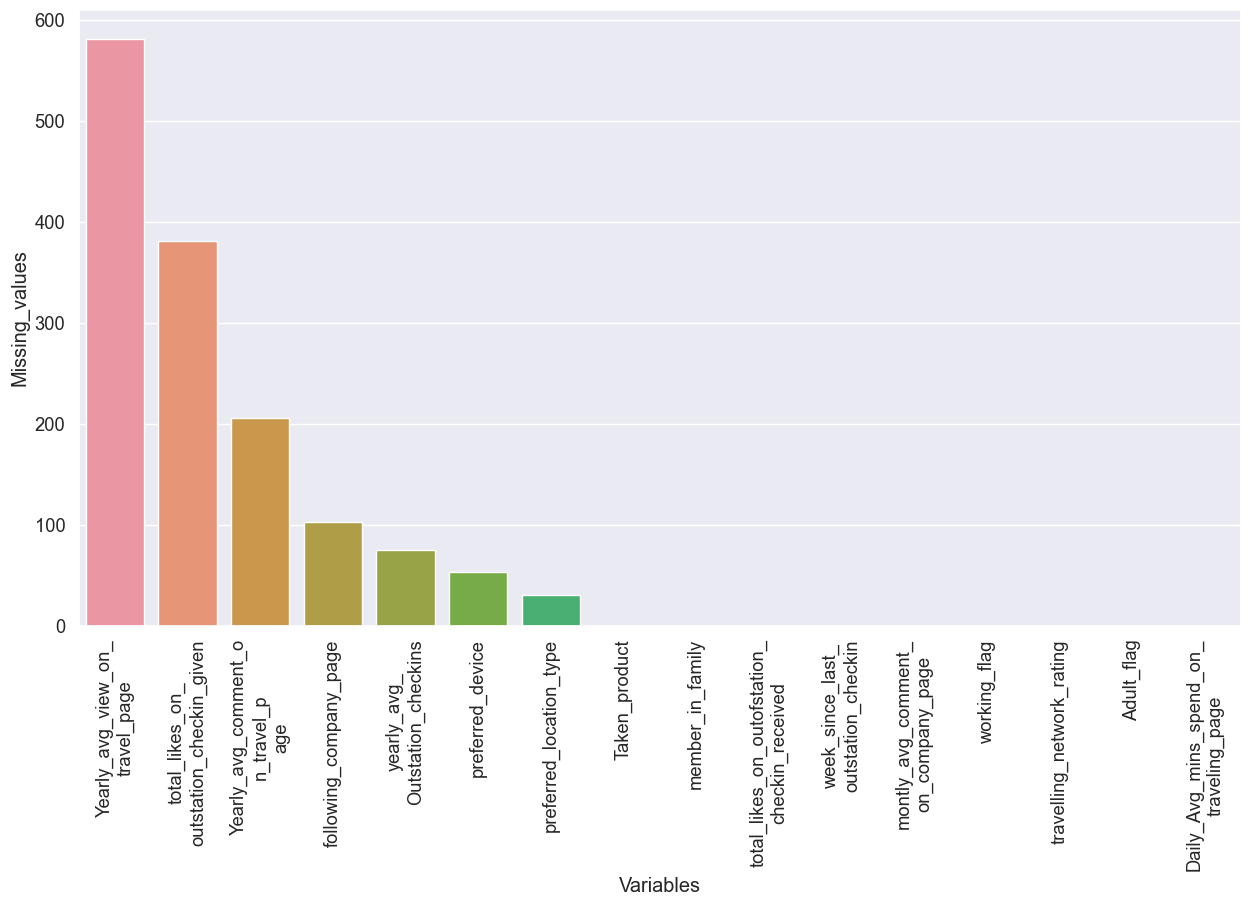

In [64]:
# Plotting the number of missing values per variable

fig,axes = plt.subplots(figsize=(15,8))
sns.barplot(x='Variables',y='Missing_values',data=missing.sort_values(by='Missing_values',ascending=False))
axes.set_xticklabels(labels =['Yearly_avg_view_on_\ntravel_page',
 'total_likes_on_\noutstation_checkin_given',
 'Yearly_avg_comment_o\nn_travel_p\nage',
 'following_company_page',
 'yearly_avg_\nOutstation_checkins',
 'preferred_device',
 'preferred_location_type',
 'Taken_product',
 'member_in_family',
 'total_likes_on_outofstation_\ncheckin_received',
 'week_since_last_\noutstation_checkin',
 'montly_avg_comment_\non_company_page',
 'working_flag',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_\ntraveling_page'] ,rotation=90)
plt.show()

In [65]:
#Total number of missing values in data
user_data.isnull().sum().sum()

1430

In [66]:
#pecentage of missing values in each variables.
round(user_data.isnull().sum() / len(user_data),4).sort_values(ascending=False)

Yearly_avg_view_on_travel_page                  0.0494
total_likes_on_outstation_checkin_given         0.0324
Yearly_avg_comment_on_travel_page               0.0175
following_company_page                          0.0088
yearly_avg_Outstation_checkins                  0.0064
preferred_device                                0.0045
preferred_location_type                         0.0026
Taken_product                                   0.0000
member_in_family                                0.0000
total_likes_on_outofstation_checkin_received    0.0000
week_since_last_outstation_checkin              0.0000
montly_avg_comment_on_company_page              0.0000
working_flag                                    0.0000
travelling_network_rating                       0.0000
Adult_flag                                      0.0000
Daily_Avg_mins_spend_on_traveling_page          0.0000
dtype: float64

In [67]:
#Total missing value proportion in the given data
print("Total Missing value proportion in the given data",round(user_data.isnull().sum().sum() / user_data.size,4))

Total Missing value proportion in the given data 0.0076


In [68]:
#Number of rows with minimum 1 missing values
user_data[user_data.isnull().sum(axis=1)>0].shape[0]

1304

In [69]:
#Percentage of data rows with minimum 1 missing value in it
p=format(round((user_data[user_data.isnull().sum(axis=1)>0].shape[0] / user_data.shape[0])*100,2))

print('Percentage of Rows with at minumum 1 missing values: {}%'.format(p))

Percentage of Rows with at minumum 1 missing values: 11.09%


#### Observation:
- 7 columns has missing values. However missing values are lies between 0.26% and 4.9% of the total missing values in these variables i.e., not more than 5% of toatl missing values in each column observations.
- The total number of missing value is 1430 which less than 1% in the dataset (0.76%).
- 1304 rows has atleast 1 missing value, which is ~11% of the total observations.
- Except 'following_company_page' variable all other variables are of continuous data type.


In [70]:
#Decription of data

#user_data.describe(include='all').T

#Numerical variables
round(user_data.describe().T,3)

count       mean        std  \
Yearly_avg_view_on_travel_page                11179.0    280.831     68.183   
total_likes_on_outstation_checkin_given       11379.0  28170.482  14385.032   
Yearly_avg_comment_on_travel_page             11554.0     74.790     24.027   
total_likes_on_outofstation_checkin_received  11760.0   6531.699   4706.614   
week_since_last_outstation_checkin            11760.0      3.204      2.616   
montly_avg_comment_on_company_page            11760.0     28.662     48.661   
travelling_network_rating                     11760.0      2.712      1.081   
Adult_flag                                    11760.0      0.794      0.852   
Daily_Avg_mins_spend_on_traveling_page        11760.0     13.817      9.071   

                                                 min       25%      50%  \
Yearly_avg_view_on_travel_page                  35.0    232.00    271.0   
total_likes_on_outstation_checkin_given       3570.0  16380.00  28076.0   
Yearly_avg_comment_on_travel_page                3.0     57.00     75.0   
total_likes_on_outofstation_checkin_received  1009.0   2940.75   4948.0   
week_since_last_outstation_checkin               0.0      1.00      3.0   
montly_avg_comment_on_company_page              11.0     17.00     22.0   
travelling_network_rating                        1.0      2.00      3.0   
Adult_flag                                       0.0      0.00      1.0   
Daily_Avg_mins_spend_on_traveling_page           0.0      8.00     12.0   

                                                   75%       max  
Yearly_avg_view_on_travel_page                  324.00     464.0  
total_likes_on_outstation_checkin_given       40525.00  252430.0  
Yearly_avg_comment_on_travel_page                92.00     815.0  
total_likes_on_outofstation_checkin_received   8393.25   20065.0  
week_since_last_outstation_checkin                5.00      11.0  
montly_avg_comment_on_company_page               27.00     500.0  
travelling_network_rating                         4.00       4.0  
Adult_flag                                        1.00       3.0  
Daily_Avg_mins_spend_on_traveling_page           18.00     270.0

In [71]:
user_data.describe(include=[object]).T

count unique    top  freq
Taken_product                   11760      2     No  9864
preferred_device                11707     10    Tab  4172
yearly_avg_Outstation_checkins  11685     30      1  4543
member_in_family                11760      7      3  4561
preferred_location_type         11729     15  Beach  2424
following_company_page          11657      4     No  8355
working_flag                    11760      2     No  9952

In [72]:
#Validating the travelling_network_rating and Adult_flag for catagorical values.

user_data['travelling_network_rating'].value_counts()

3    3672
4    3456
2    2424
1    2208
Name: travelling_network_rating, dtype: int64

- data type is integer, We are converting this to catagorical values as we are not performing any type of numerical operations.

In [73]:
user_data['Adult_flag'].value_counts()

0    5048
1    4768
2    1264
3     680
Name: Adult_flag, dtype: int64

- We can keep 'Adult_flag' as binary value(catagorical value) i.e., whether the user is an adult: Yes or No. However, it has 2 and 3 as their values.
- Values can be imputed as such **0** is not adult and anything other than that shall be adult.

#### Converting 'Adult_flag','week_since_last_outstation_checkin' and 'travelling_network_rating' into 'object' datatype as it is a categorical variable.

In [74]:
user_data['travelling_network_rating'] = user_data['travelling_network_rating'].astype('object')
user_data['week_since_last_outstation_checkin'] = user_data['week_since_last_outstation_checkin'].astype('object')
user_data['Adult_flag'] = user_data['Adult_flag'].astype('object')

In [75]:
#Validating the numerical data aftr conversion
round(user_data.describe().T,3)

count       mean        std  \
Yearly_avg_view_on_travel_page                11179.0    280.831     68.183   
total_likes_on_outstation_checkin_given       11379.0  28170.482  14385.032   
Yearly_avg_comment_on_travel_page             11554.0     74.790     24.027   
total_likes_on_outofstation_checkin_received  11760.0   6531.699   4706.614   
montly_avg_comment_on_company_page            11760.0     28.662     48.661   
Daily_Avg_mins_spend_on_traveling_page        11760.0     13.817      9.071   

                                                 min       25%      50%  \
Yearly_avg_view_on_travel_page                  35.0    232.00    271.0   
total_likes_on_outstation_checkin_given       3570.0  16380.00  28076.0   
Yearly_avg_comment_on_travel_page                3.0     57.00     75.0   
total_likes_on_outofstation_checkin_received  1009.0   2940.75   4948.0   
montly_avg_comment_on_company_page              11.0     17.00     22.0   
Daily_Avg_mins_spend_on_traveling_page           0.0      8.00     12.0   

                                                   75%       max  
Yearly_avg_view_on_travel_page                  324.00     464.0  
total_likes_on_outstation_checkin_given       40525.00  252430.0  
Yearly_avg_comment_on_travel_page                92.00     815.0  
total_likes_on_outofstation_checkin_received   8393.25   20065.0  
montly_avg_comment_on_company_page               27.00     500.0  
Daily_Avg_mins_spend_on_traveling_page           18.00     270.0

In [76]:
#Validating gatagorical data after conversion
user_data.describe(include=[object]).T

count unique    top  freq
Taken_product                       11760      2     No  9864
preferred_device                    11707     10    Tab  4172
yearly_avg_Outstation_checkins      11685     30      1  4543
member_in_family                    11760      7      3  4561
preferred_location_type             11729     15  Beach  2424
week_since_last_outstation_checkin  11760     12      1  3070
following_company_page              11657      4     No  8355
working_flag                        11760      2     No  9952
travelling_network_rating           11760      4      3  3672
Adult_flag                          11760      4      0  5048

##### Continious varibles:
- Few of the variable has larger difference in mean and median(50%) thus only few variables are containing the outliers.

##### Catagorical Variables:
- There are more number of customer who are not taken the products that customer who took the product as per target variable 'Taken_product'
- Majority of people's preferred device is 'Tab'.
- Majority of the family having 3 members as per given dataset.
- Most preferred location shall be 'Beach'.
- Most of the users are with the outstation checkins within 1 week
- With the given data we can see it consist of more non-working people.


In [77]:
#creaing separate dataset for numerical and catagorical variables
num = user_data.select_dtypes(exclude=['object']).columns
cat = user_data.select_dtypes(exclude=['int64','float64']).columns

In [78]:
#count of 'taken_product' for numerical values
user_data.groupby(user_data['Taken_product'])[num].count()

Yearly_avg_view_on_travel_page  \
Taken_product                                   
No                                       9370   
Yes                                      1809   

               total_likes_on_outstation_checkin_given  \
Taken_product                                            
No                                                9544   
Yes                                               1835   

               Yearly_avg_comment_on_travel_page  \
Taken_product                                      
No                                          9691   
Yes                                         1863   

               total_likes_on_outofstation_checkin_received  \
Taken_product                                                 
No                                                     9864   
Yes                                                    1896   

               montly_avg_comment_on_company_page  \
Taken_product                                       
No                                           9864   
Yes                                          1896   

               Daily_Avg_mins_spend_on_traveling_page  
Taken_product                                          
No                                               9864  
Yes                                              1896

In [79]:
#count of 'taken_product' for catagorical values
user_data.groupby(user_data['Taken_product'])[cat.drop('Taken_product')].count()

preferred_device  yearly_avg_Outstation_checkins  \
Taken_product                                                     
No                         9821                            9799   
Yes                        1886                            1886   

               member_in_family  preferred_location_type  \
Taken_product                                              
No                         9864                     9836   
Yes                        1896                     1893   

               week_since_last_outstation_checkin  following_company_page  \
Taken_product                                                               
No                                           9864                    9778   
Yes                                          1896                    1879   

               working_flag  travelling_network_rating  Adult_flag  
Taken_product                                                       
No                     9864                       9864        9864  
Yes                    1896                       1896        1896

###  c. Understanding of attributes (variable info, renaming if required)

In [80]:
# Value count for catagorical variables

for c in cat:
    print(f'Value count of "{c}"')
    print(user_data[c].value_counts())
    print()

Value count of "Taken_product"
No     9864
Yes    1896
Name: Taken_product, dtype: int64

Value count of "preferred_device"
Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

Value count of "yearly_avg_Outstation_checkins"
1     4543
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_Outstation_checkins, dtype: int64

Value count of "member_in_family"
3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

In [81]:
#Targe variable class proportion
user_data['Taken_product'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Taken_product, dtype: float64

##### There are few redenduncies and improper data present in the few columns.
- **preferred_device** : Has three different 'Androids', two different 'others' present. We are going to change all the values other than 'Laptop' to 'Mobile'
- **yearly_avg_Outstation_checkins**: There is a special character (*) along with the numerical values.
- **member_in_family**: We should maintain the unformity but we can find some string values along with numeric values..
- **following_company_page**: Has both 'yes / no' and 0/1 so we should clean up the data.
- **Adult_Flag**: We are going to keep binary values for this attribute.
- **preferred_location_type**: we found 'Tour  Travel'and 'Tour and Travel' as different values. We will maintain the uniformity by replacing 'Tour  Travel' with 'Tour and Travel'.

In [82]:
#preferred_device
#Cleaning redundant values

user_data['preferred_device'] = user_data['preferred_device'].replace(dict.fromkeys(['Android OS','ANDROID','Tab','iOS and Android','iOS','Android','Others','Other'],'Mobile'))
user_data['preferred_device'].value_counts()

Mobile    10599
Laptop     1108
Name: preferred_device, dtype: int64

- We have replaced all the values other than 'Laptop' to  'Mobiles'. Data type is int64. We will update it to object if it it neccessary.

In [83]:
user_data['preferred_device'] = user_data['preferred_device'].astype('object')

In [84]:
#yearly_avg_Outstation_checkins
#Replace the '*' with the most frequent value (mode)

user_data['yearly_avg_Outstation_checkins'] = np.where(user_data['yearly_avg_Outstation_checkins']=='*' 
                                                       ,user_data['yearly_avg_Outstation_checkins'].mode() 
                                                       ,user_data['yearly_avg_Outstation_checkins'])


user_data['yearly_avg_Outstation_checkins'].value_counts()

1     4544
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
23     215
29     215
18     208
15     206
20     199
26     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
Name: yearly_avg_Outstation_checkins, dtype: int64

In [85]:
user_data['yearly_avg_Outstation_checkins'] = user_data['yearly_avg_Outstation_checkins'].astype('float64')

In [86]:
#member_in_family:
#Replace 'Three' with the numerical value '3'

user_data['member_in_family'] = np.where(user_data['member_in_family']=='Three','3',user_data['member_in_family'])
user_data['member_in_family'].value_counts()

3     4576
4     3184
2     2256
1     1349
5      384
10      11
Name: member_in_family, dtype: int64

In [87]:
#following_company_page
#Replace '1' to 'Yes' and '0' to 'No' based on its proportion

user_data['following_company_page'] = user_data['following_company_page'].replace({'1':'Yes','0':'No'})
user_data['following_company_page'].value_counts()

No     8360
Yes    3297
Name: following_company_page, dtype: int64

In [88]:
#following_company_page
#Replace '1' to 'Yes' and '0' to 'No' based on its proportion

#user_data['following_company_page'] = user_data['following_company_page'].replace({'1':'Yes','0':'No'})
#user_data['following_company_page'].value_counts()

In [89]:
#Adult_flaf
#We keep binry values 0 and 1 for this attribute. We are replacing 2 and 3 with 1.

user_data['Adult_flag'] = user_data['Adult_flag'].replace(dict.fromkeys([2,3],1)).astype('object')
user_data['Adult_flag'].value_counts()

1    6712
0    5048
Name: Adult_flag, dtype: int64

In [90]:
#preferred_location_type
#Combine two different Tour and Travel

user_data['preferred_location_type'] = user_data['preferred_location_type'].replace({'Tour  Travel':'Tour and Travel'})
user_data['preferred_location_type'].value_counts()

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour and Travel     107
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

## 3. Exploratory Data Analysis

In [91]:
#user_data.dtypes

In [92]:
#user_data.isnull().sum().any()

#### a. Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

In [93]:
print(num.nunique())
print(cat.nunique())

6
10


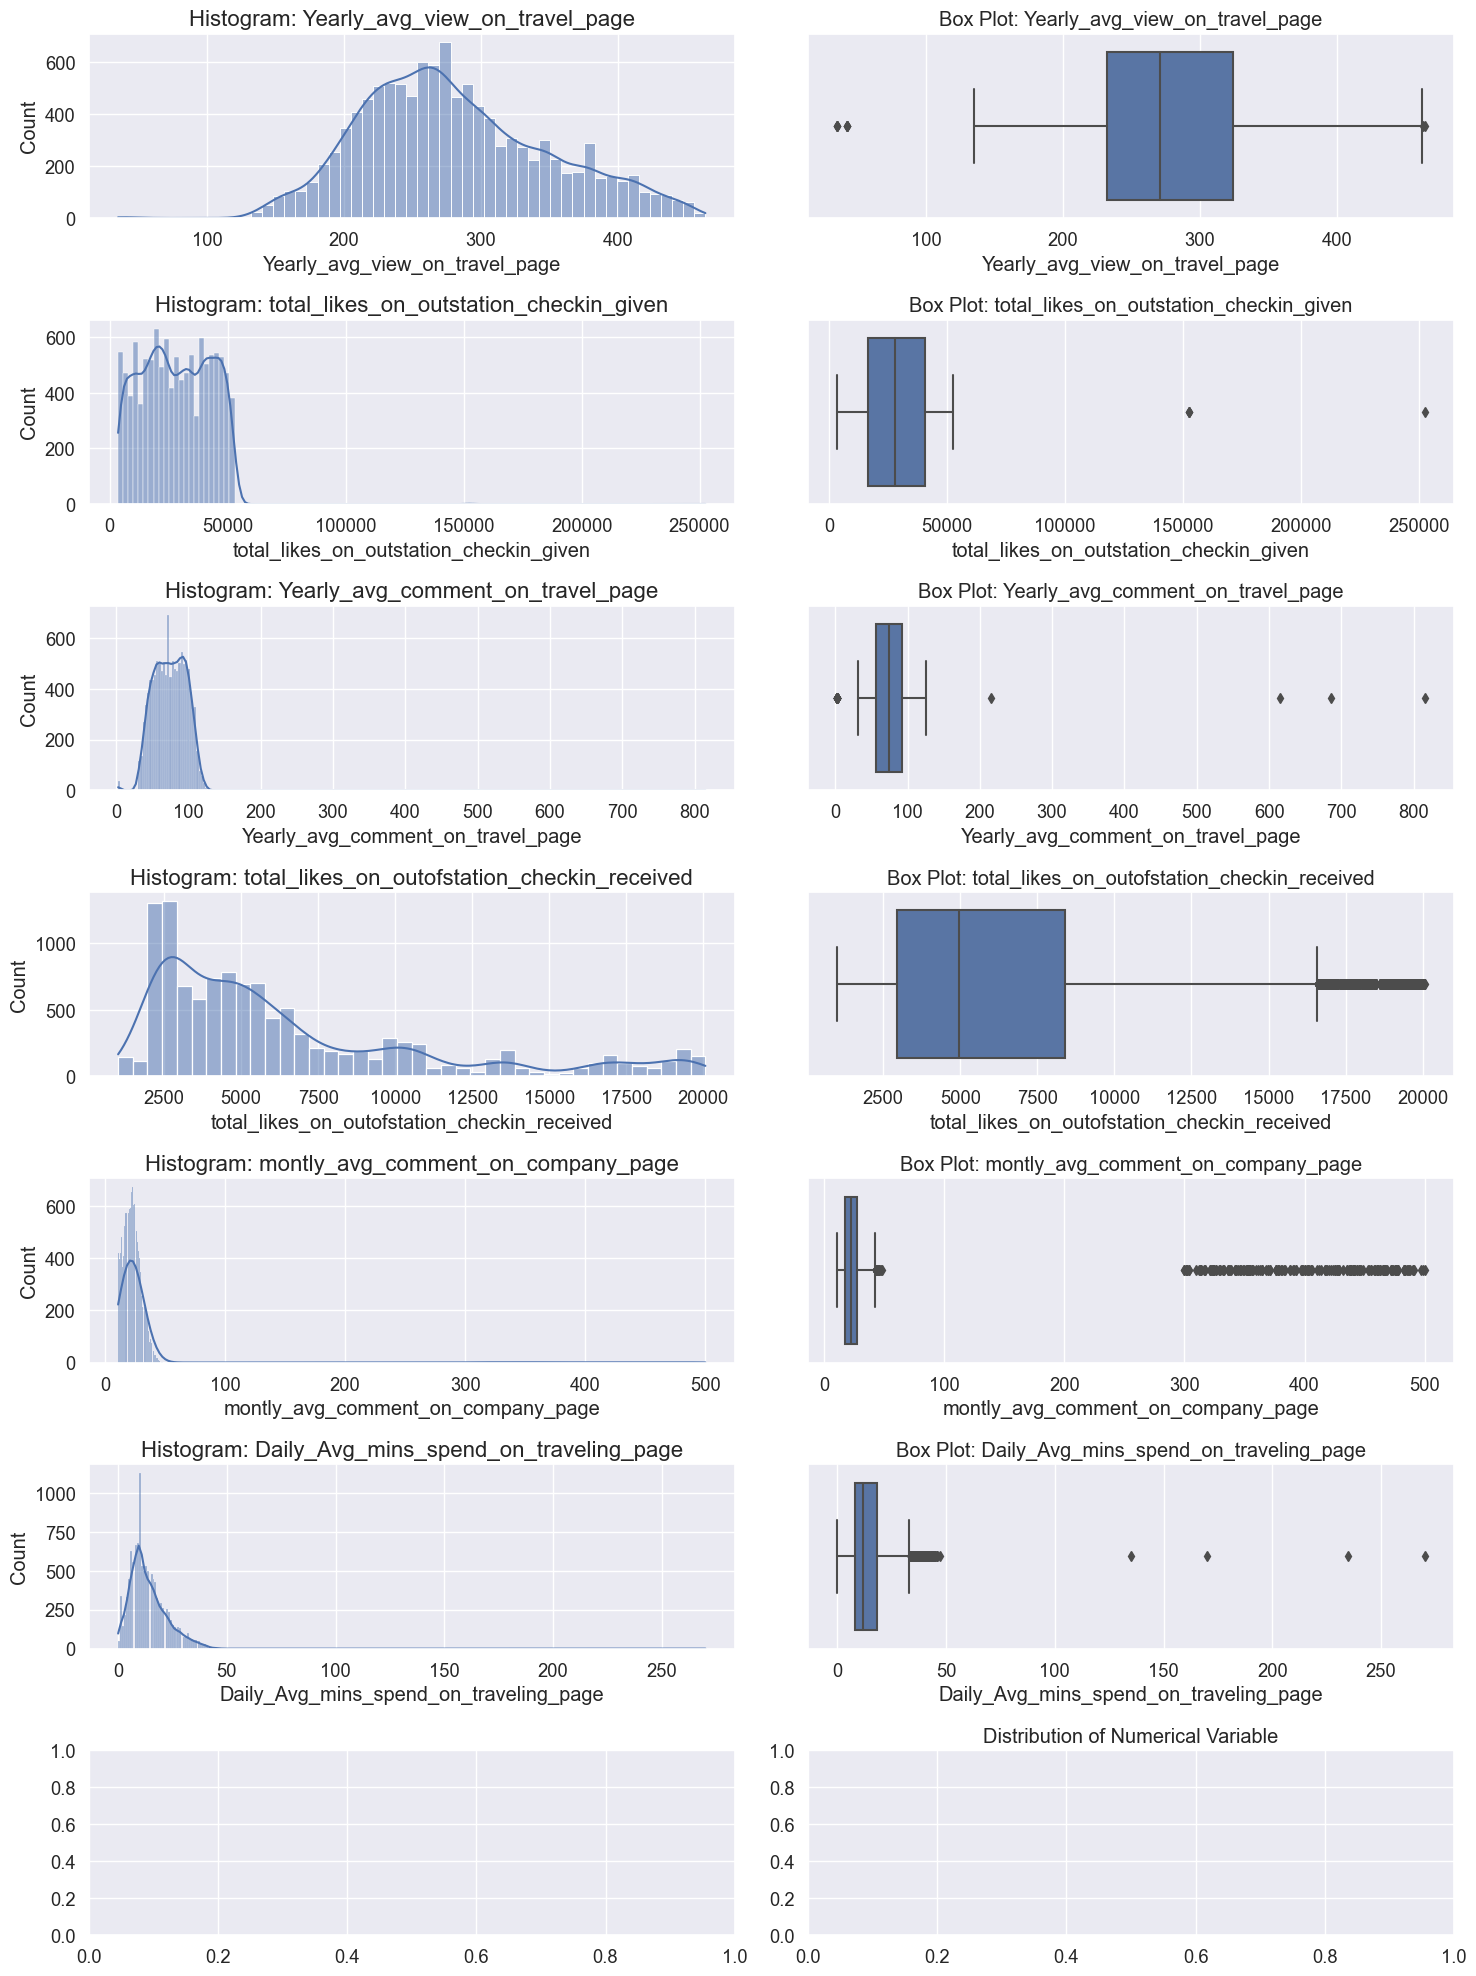

In [94]:
#Plotting histogram and boxplot for all numerical value columns.

fig,axes = plt.subplots(7,2,figsize=(15,20))
 
plt.subplots_adjust(hspace=1,wspace=0.15)
for c,a in zip(num,axes):
        sns.histplot(x=user_data[c],kde=True,ax=a[0])
        a[0].set_title("Histogram: "+c,fontsize=16)
        
        sns.boxplot(x=user_data[c],ax=a[1])
        a[1].set_title("Box Plot: "+c)
plt.title("Distribution of Numerical Variable")
plt.tight_layout()

###### Histogram:
- Yearly average views on Travel pages is normally distributed with most number of views are aroung 250 to 300 views. Remaining all other variables are right skewed with outliers.
- total_likes_on_outstation_checkins_given, yearly_avg_comment_on_travel_page, montly_avg_comment_on_company_page and Daily_avg_mins_spend_on_traveling_page has very few extreme values at the upper band thus all are right skewed.
- Majority user has the yearly average outstation checkins below 5.
- Likewise, monthly average comments on company pages is also less than 50 for most of the users.
- Likes given on outstation check in has even distribution of users across different bucket of likes.

###### Boxplot:
- yearly_avg_view_on_travel_page has very few outliers and normally distributed.
- total_likes_on_outstation_checkin_given also evenly distrbuted with only very few outliers at the upper limit which are significantly higher than the other values.
- yearly_avg_comment_on_travel_page is also has only few outliers which can be treated.
- monthly_avg_comment_on_company_page and Daily_Avg_mins_spend_on_travelling_page has whole group of outliers at the upper range.

In [95]:
user_data.skew()

Yearly_avg_view_on_travel_page                  0.414409
total_likes_on_outstation_checkin_given         0.489638
yearly_avg_Outstation_checkins                  0.968297
member_in_family                                0.001205
Yearly_avg_comment_on_travel_page               4.868225
total_likes_on_outofstation_checkin_received    1.368578
week_since_last_outstation_checkin              0.915334
montly_avg_comment_on_company_page              7.684150
travelling_network_rating                      -0.302557
Adult_flag                                     -0.285906
Daily_Avg_mins_spend_on_traveling_page          4.480682
dtype: float64

#### In case of categorical variable we are interested to know the frequencies of levels . We can observe the frequencies in terms of barplot for categorical variables

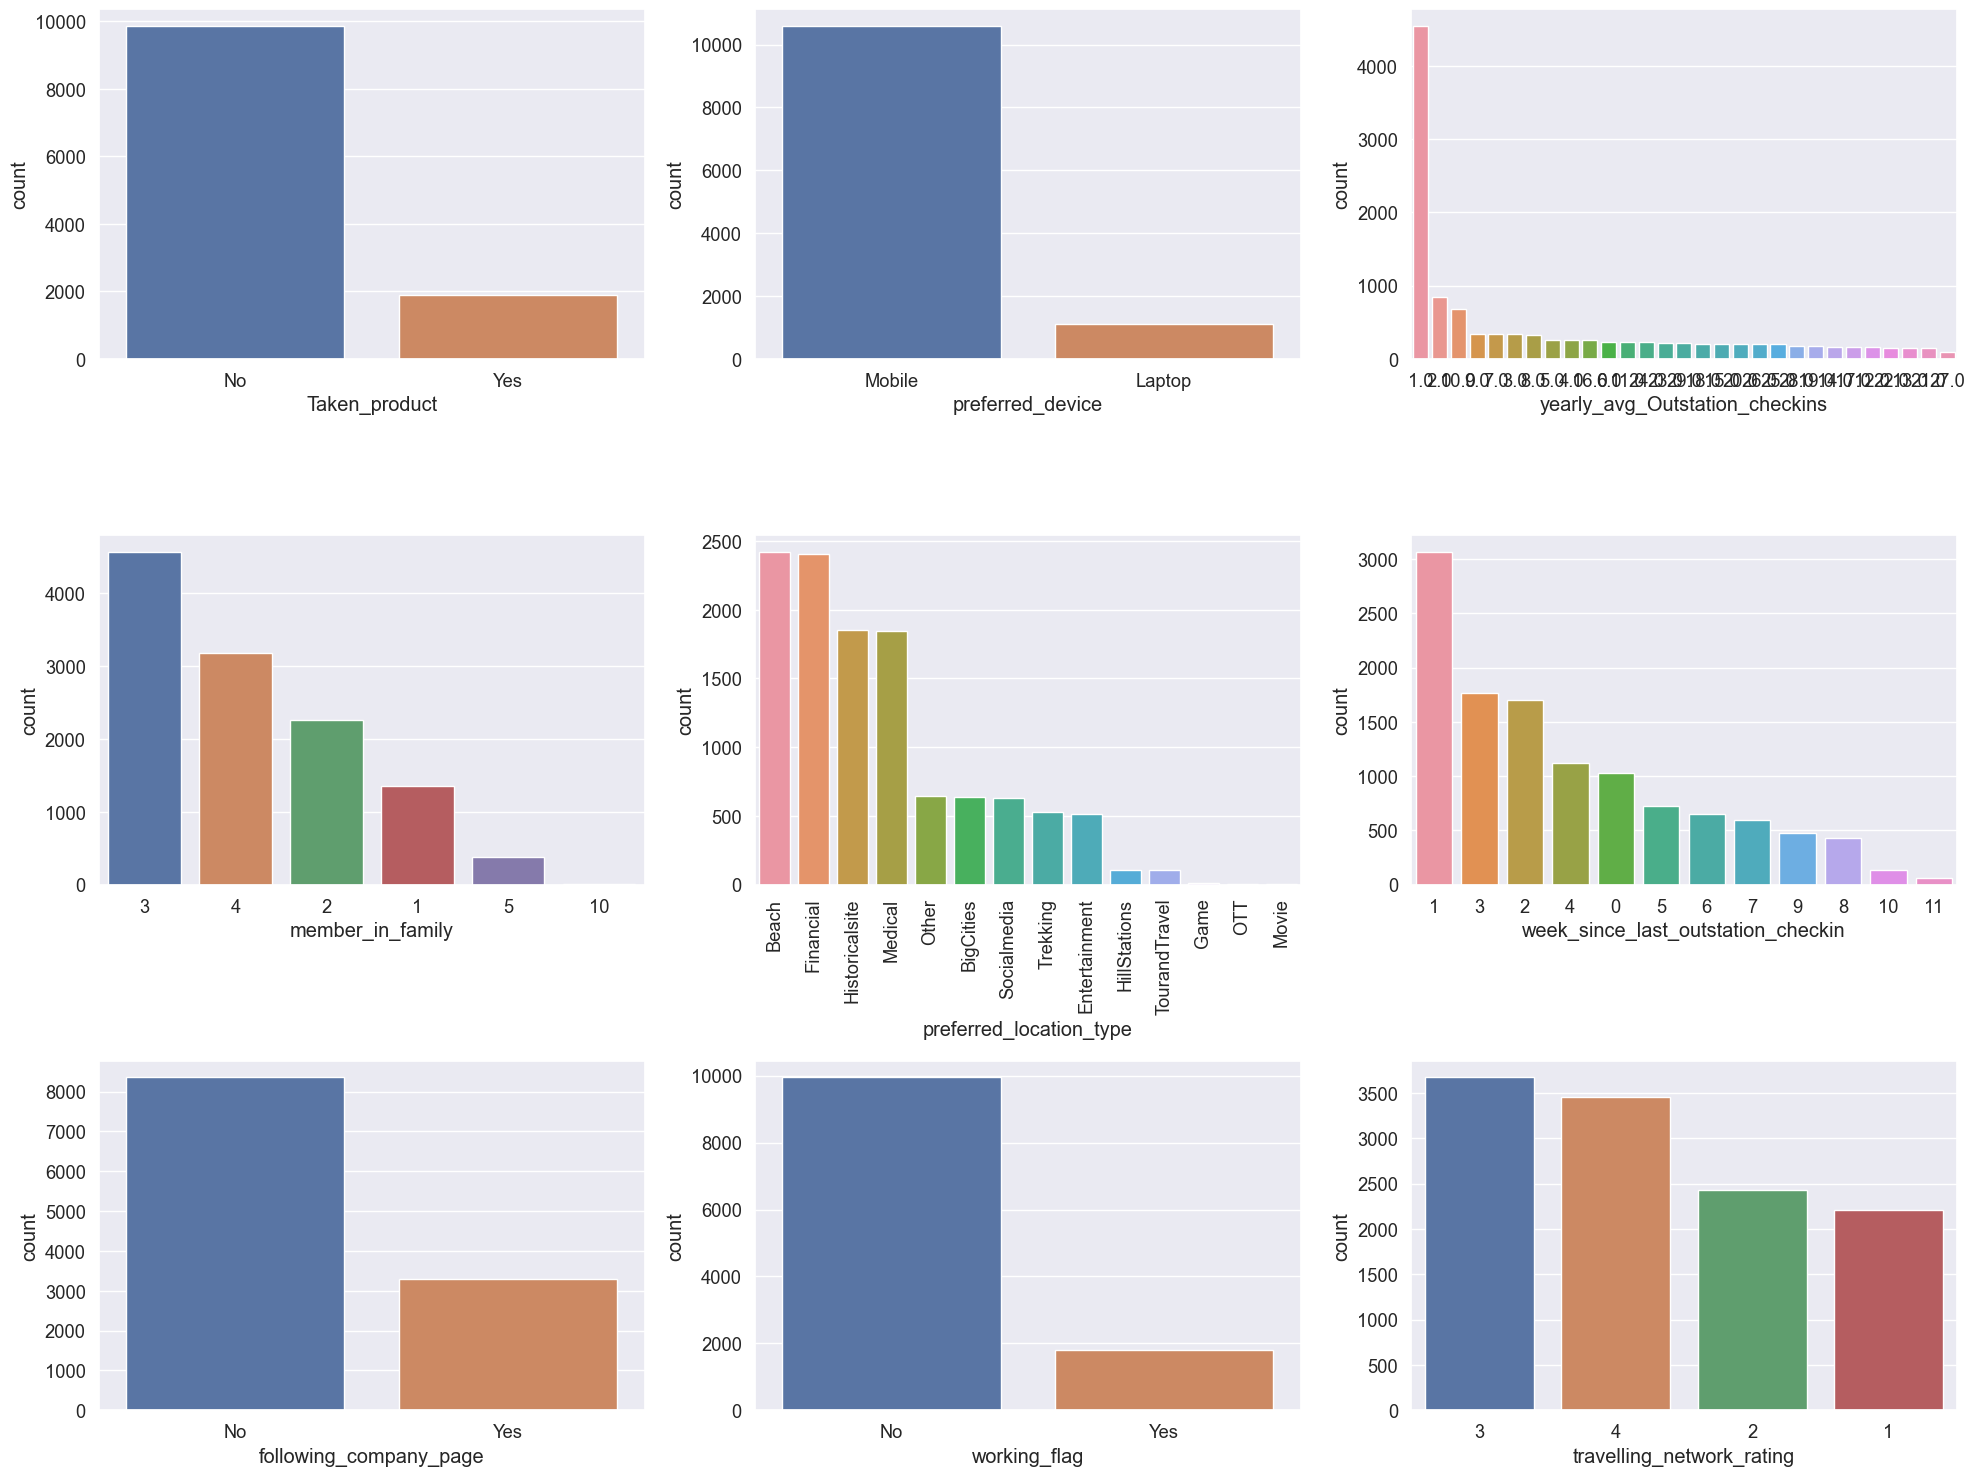

In [96]:
#Pltting bar chart for all the catagorical variables.

fig,axes = plt.subplots(3,3,figsize=(20,15))
for c,a in zip(cat,axes.flatten()):
    sns.countplot(x=user_data[c],ax=a,order=user_data[c].value_counts().index)
    if c == 'preferred_location_type':
        a.set_xticklabels(labels=['Beach', 'Financial', 'Historicalsite', 'Medical', 'Other', 'BigCities', 'Socialmedia', 'Trekking', 'Entertainment', 'HillStations', 'TourandTravel', 'Game', 'OTT', 'Movie'],rotation=90)
plt.tight_layout()

- User's most preferred device is mobile devices (Tab, iOS, Android)
- Most of the users have a medium size family with 3 members.
- User's most preferred location type is Beach and Financial, which means that many may went for vecation or business trip, which then followed by Historical site and Medical. The least preferred location type would be Movie, OTT and game.
- Many of the users have very recent outstation checkin, within in 1 week or less. Indicates that many of the given users had a recent travel.
- Given data has more number of users who are not following the company's social medial page.
- Surpisingly we have larger number of users with no-work flag, which needs to be furthur analysed with preferred location type, adult flag and Product taken to understand better who are out targeted customers.
- Majority of the users with travelling network rating as 3 and 4 which indicates that many of the users doesn't have network of travellers.

####  b. Bivariate analysis (relationship between different variables , correlations)	

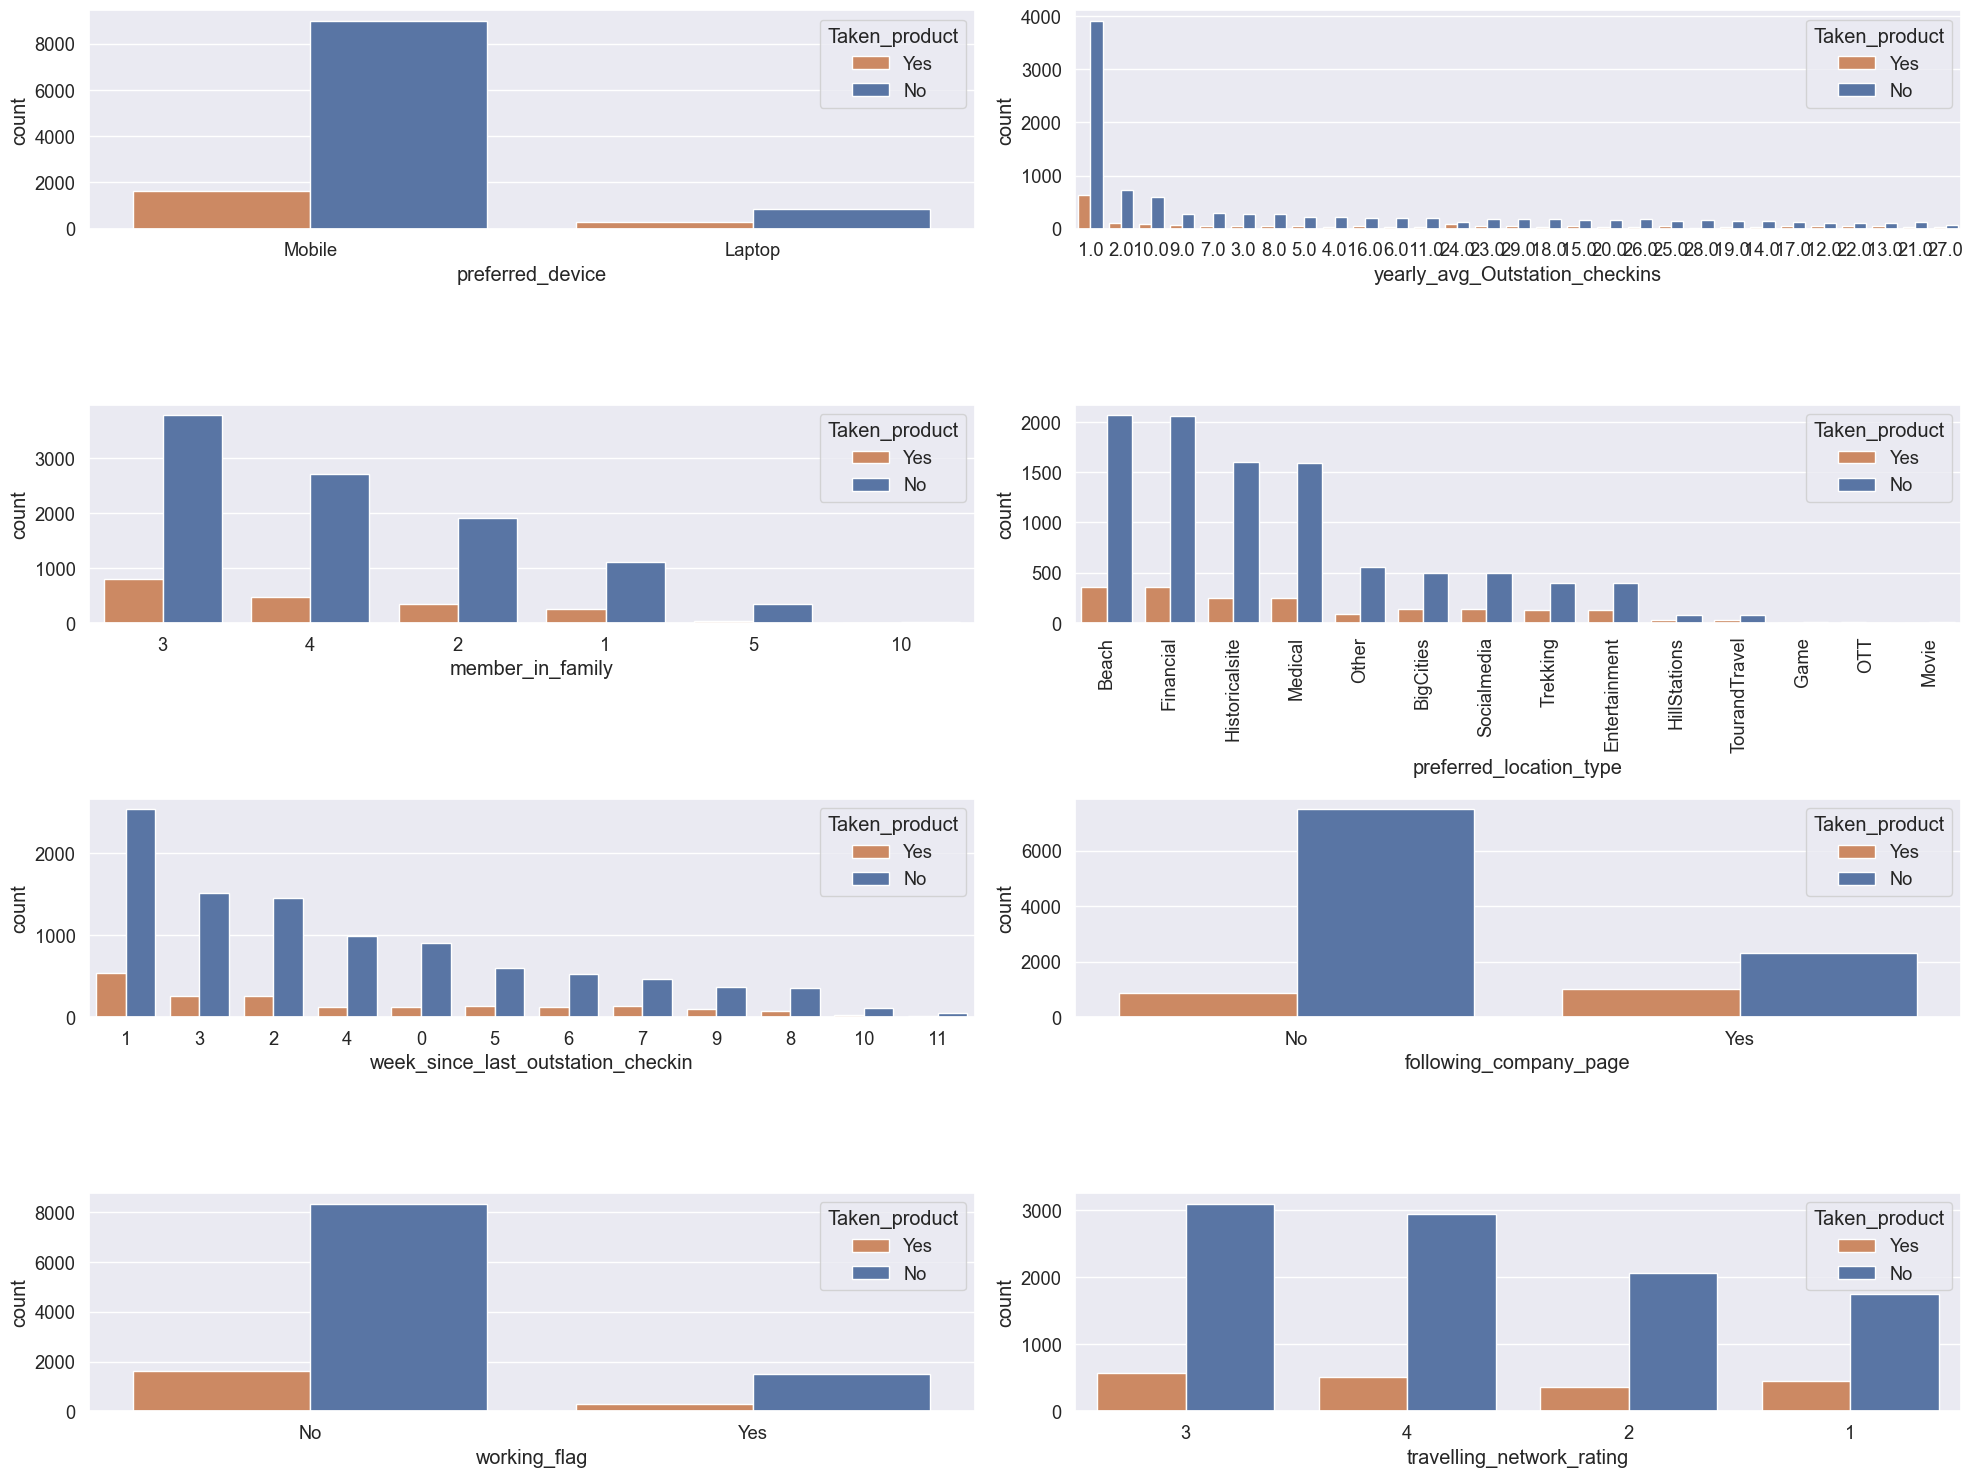

In [97]:
#plotting 'Taken_Product' against all the catagorical variables.

fig,axes = plt.subplots(4,2,figsize=(20,15))
for c,a in zip(cat.drop('Taken_product'),axes.flatten()):
    sns.countplot(x=c,data=user_data,hue='Taken_product',ax=a,order=user_data[c].value_counts().index,palette={'Yes':'C1','No':'C0'})
    if c == 'preferred_location_type':
        a.set_xticklabels(labels=['Beach', 'Financial', 'Historicalsite', 'Medical', 'Other', 'BigCities', 'Socialmedia', 'Trekking', 'Entertainment', 'HillStations', 'TourandTravel', 'Game', 'OTT', 'Movie'],rotation=90)
plt.tight_layout()

In [98]:
#plt.figure(figsize=(18,8))
#sns.countplot(x = 'preferred_location_type', hue = 'Taken_product', data = user_data);

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (14).

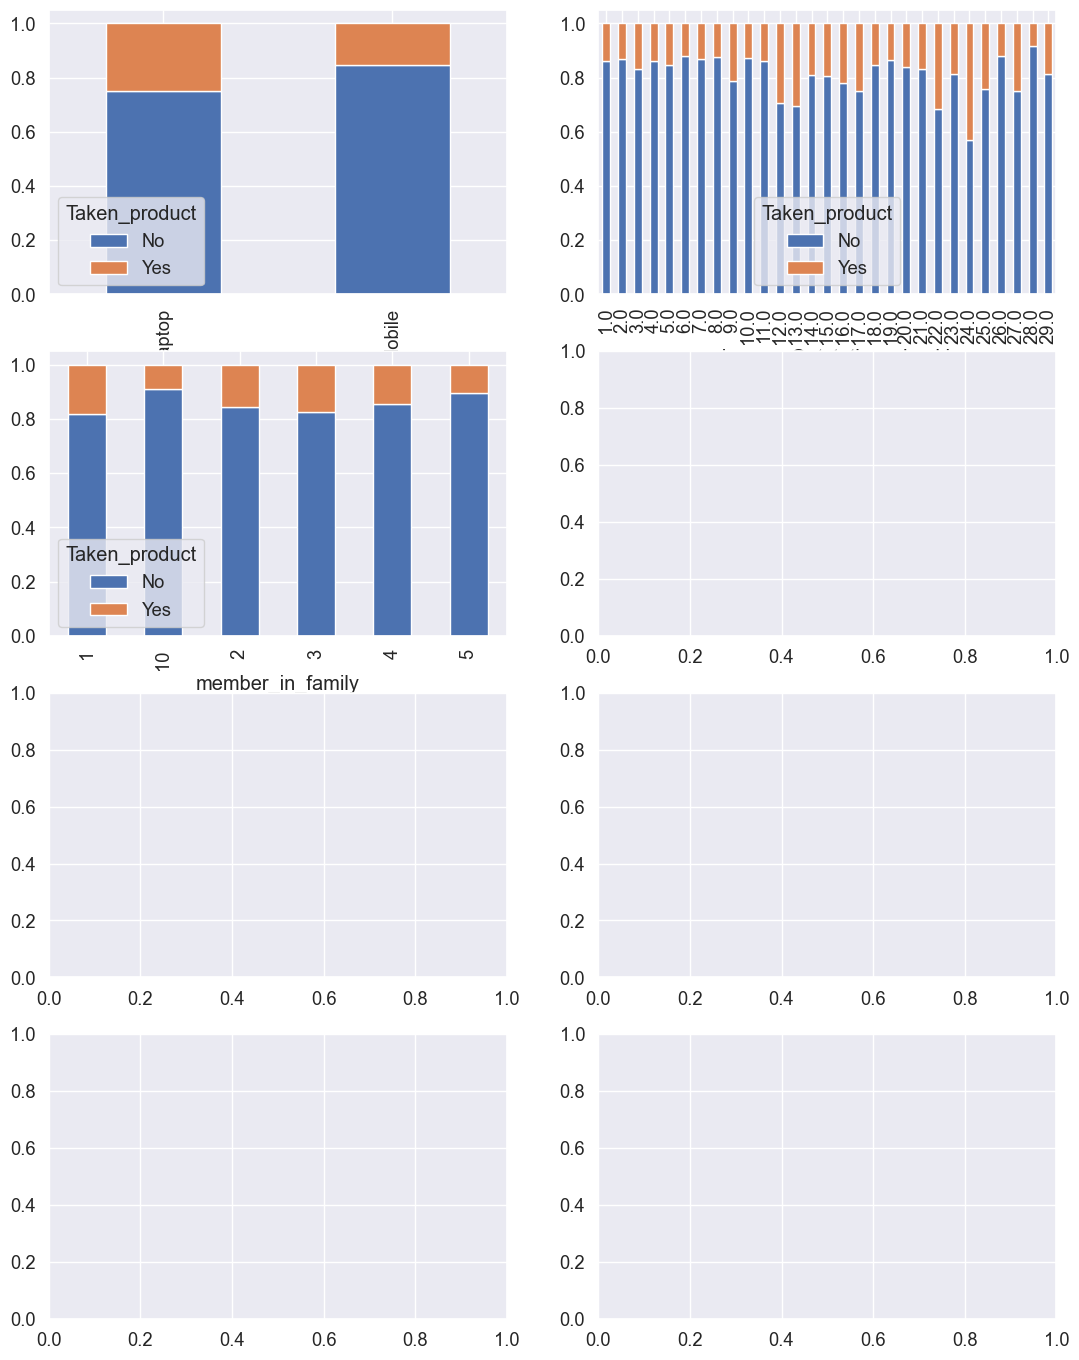

In [99]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(13,17)) 
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for c,a in zip(cat.drop('Taken_product'),axes):
    user_data.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    ax3.set_xticklabels(labels=['Beach', 'Financial', 'Historicalsite', 'Medical', 'Other', 'BigCities', 'Socialmedia', 'Trekking', 'Entertainment', 'HillStations', 'TourandTravel', 'Game', 'OTT', 'Movie'],rotation=90)
plt.tight_layout()

In [100]:
#Percentage of taken product in each catagorical value level.

for c,a in zip(cat,axes):
    if c!='Taken_product':
        x=round(pd.crosstab(user_data[c],user_data['Taken_product'],margins=True,normalize=True)*100,2)
        print(x)
        print()

Taken_product        No    Yes     All
preferred_device                      
Laptop             7.11   2.36    9.46
Mobile            76.78  13.75   90.54
All               83.89  16.11  100.00

Taken_product                      No    Yes     All
yearly_avg_Outstation_checkins                      
1.0                             33.50   5.39   38.89
2.0                              6.26   0.96    7.22
3.0                              2.40   0.48    2.88
4.0                              1.88   0.31    2.19
5.0                              1.89   0.34    2.23
6.0                              1.78   0.24    2.02
7.0                              2.50   0.38    2.88
8.0                              2.40   0.34    2.74
9.0                              2.29   0.62    2.91
10.0                             5.08   0.75    5.84
11.0                             1.69   0.27    1.96
12.0                             0.96   0.40    1.36
13.0                             0.89   0.39    1.28
14.0     

#### Observation:

- 90% of the customers prefers mobile and 14% of customers have taken the product.
- Number of family member doesn't give any pattern on predicting the target variable but we can see that 39% of the customers are with 3 members in the family and ~7% of the customers chosen the products are belong to this group.
- in preferred_location_type, beach and Financial got highest hits of purchase (apprx 3%).
- As the recency of the last outstation checkins increases chance of taking the product decreases.
- People who follow company's page doesn't give any significant difference in to predict the customer's who preferred the prodcut. The percentage of choosing the product in both the segments is around 7.5-8.5%.
- However, people who are not working has better difference in target class prediction. the value is almost 14%.

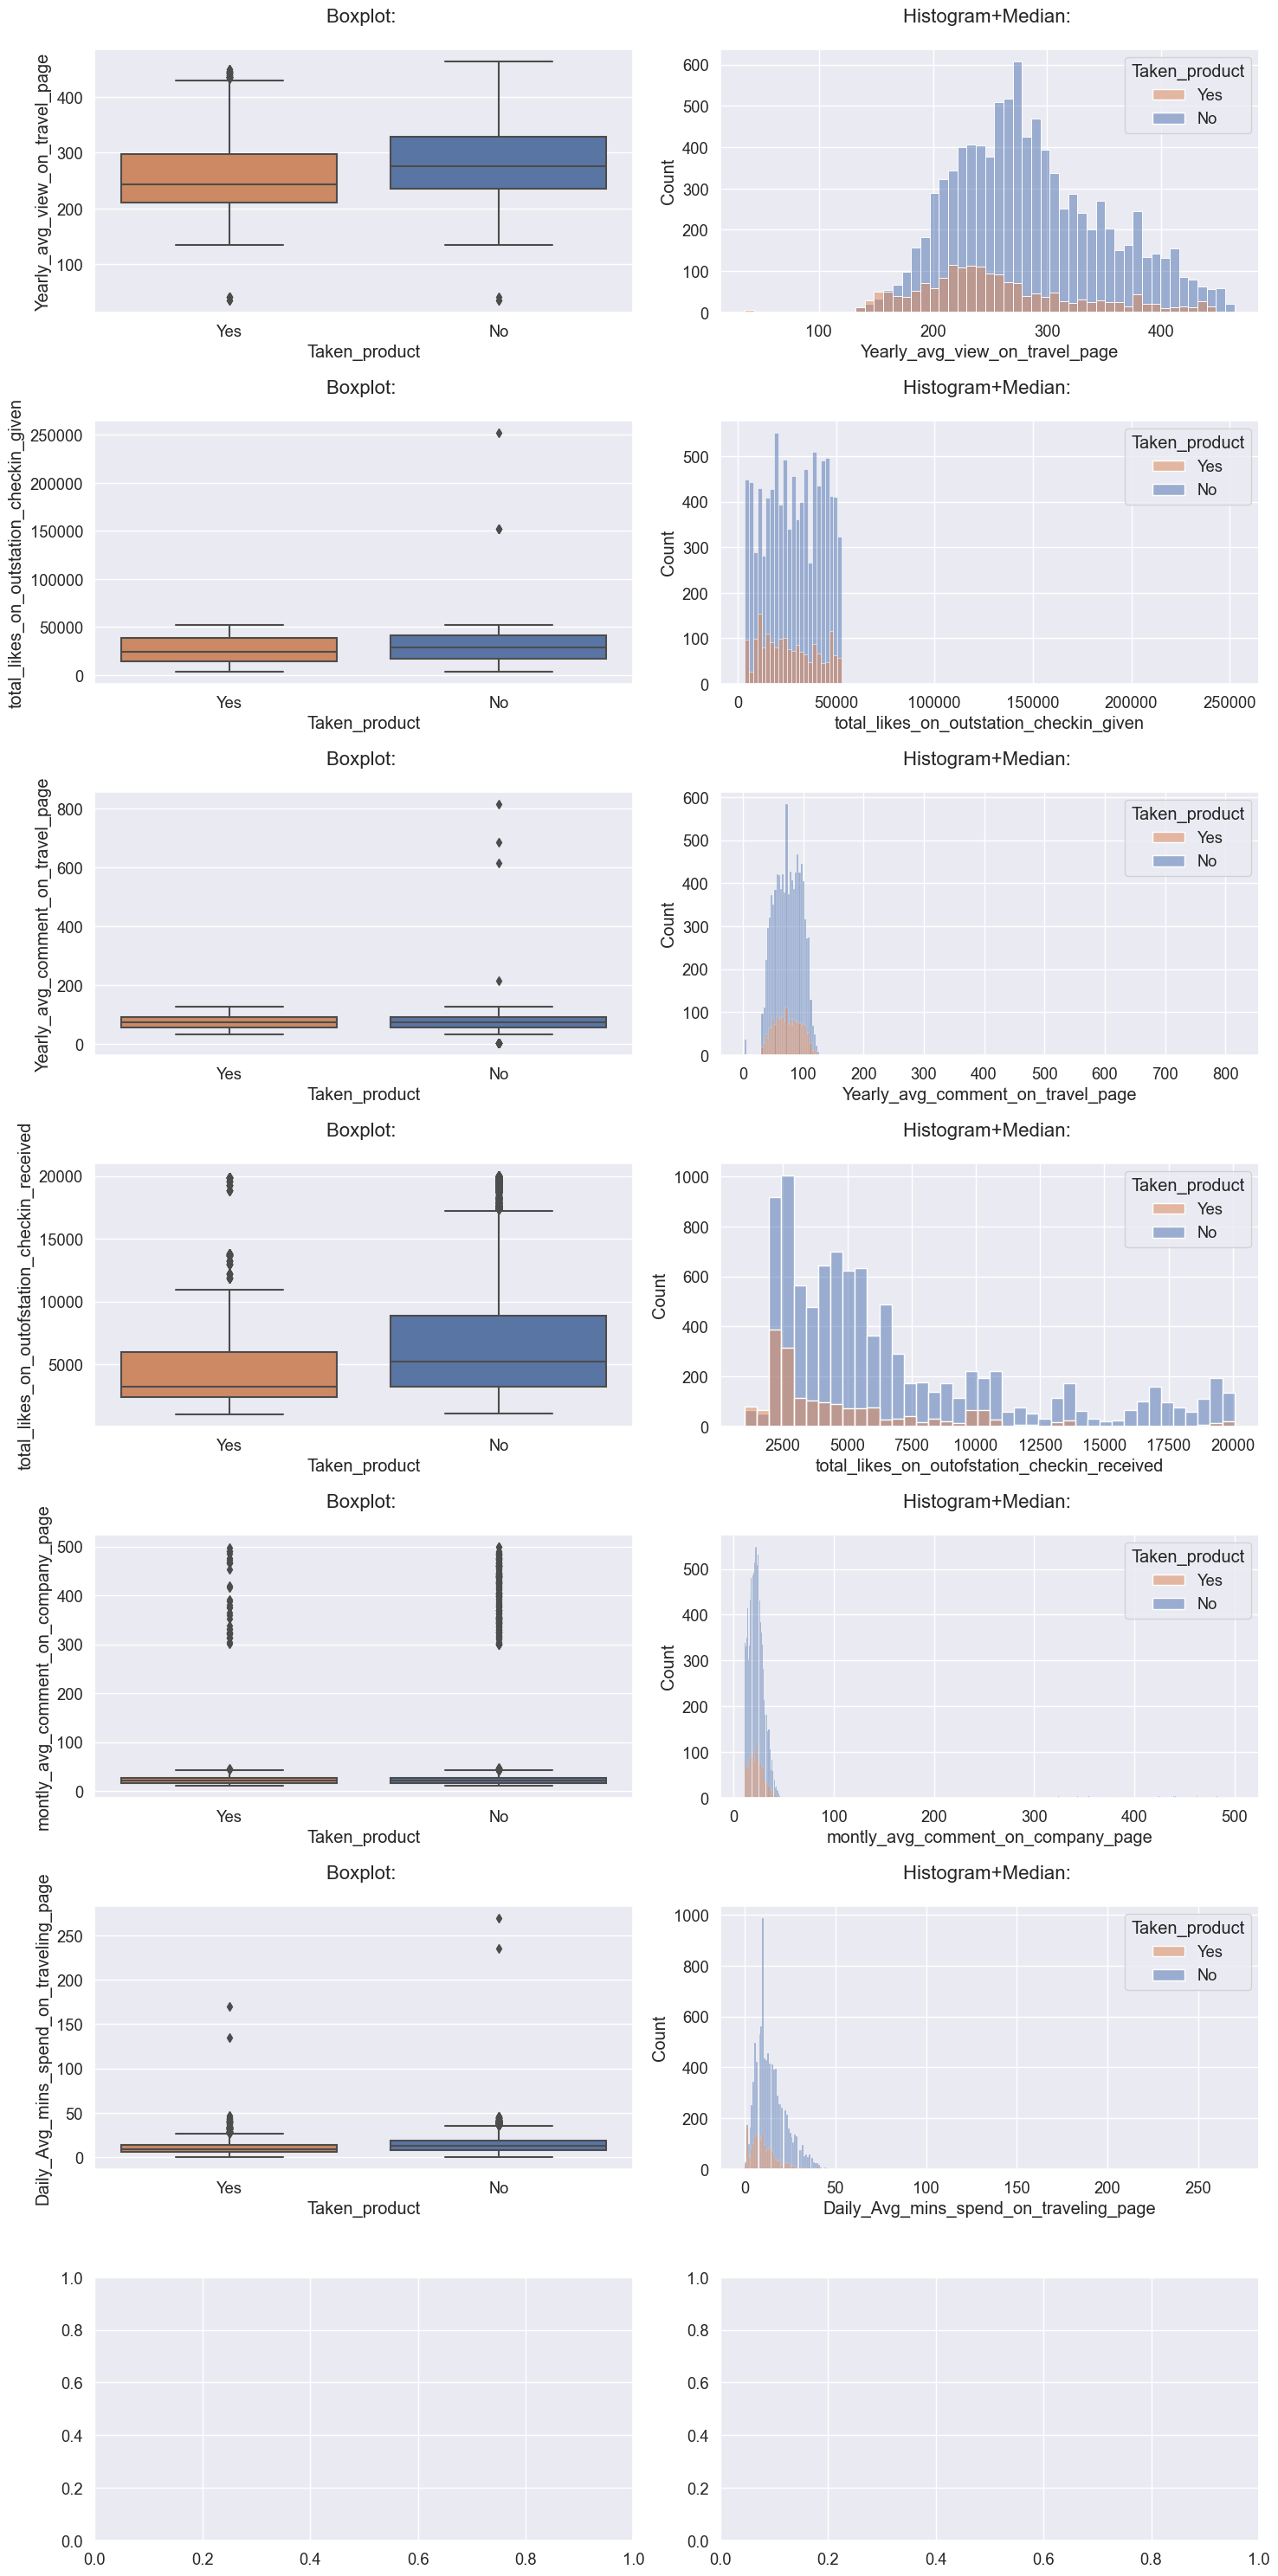

In [101]:
#Histogram and Boxplot representation
fig,axes = plt.subplots(7,2,figsize=(15,30))
for c,a in zip(num,axes):
    sns.boxplot(x=user_data['Taken_product'],y=user_data[c],ax=a[0],palette={'Yes':'C1','No':'C0'})
    a[0].set_title("Boxplot: \n",fontsize=16)
    sns.histplot(x=user_data[c],hue=user_data['Taken_product'],ax=a[1],palette={'Yes':'C1','No':'C0'})
    a[1].set_title("Histogram+Median: \n",fontsize=16)
    
    plt.tight_layout()
    
    

- Yearly_avg_view_on_travel_page, yearly_avg_outstation_checkins, total_likes_on_outstation_checkin_received makes a significant difference between the two classes of target variable.
- However, same is not the case with other continuous variables. They are very good at seperating the classes.

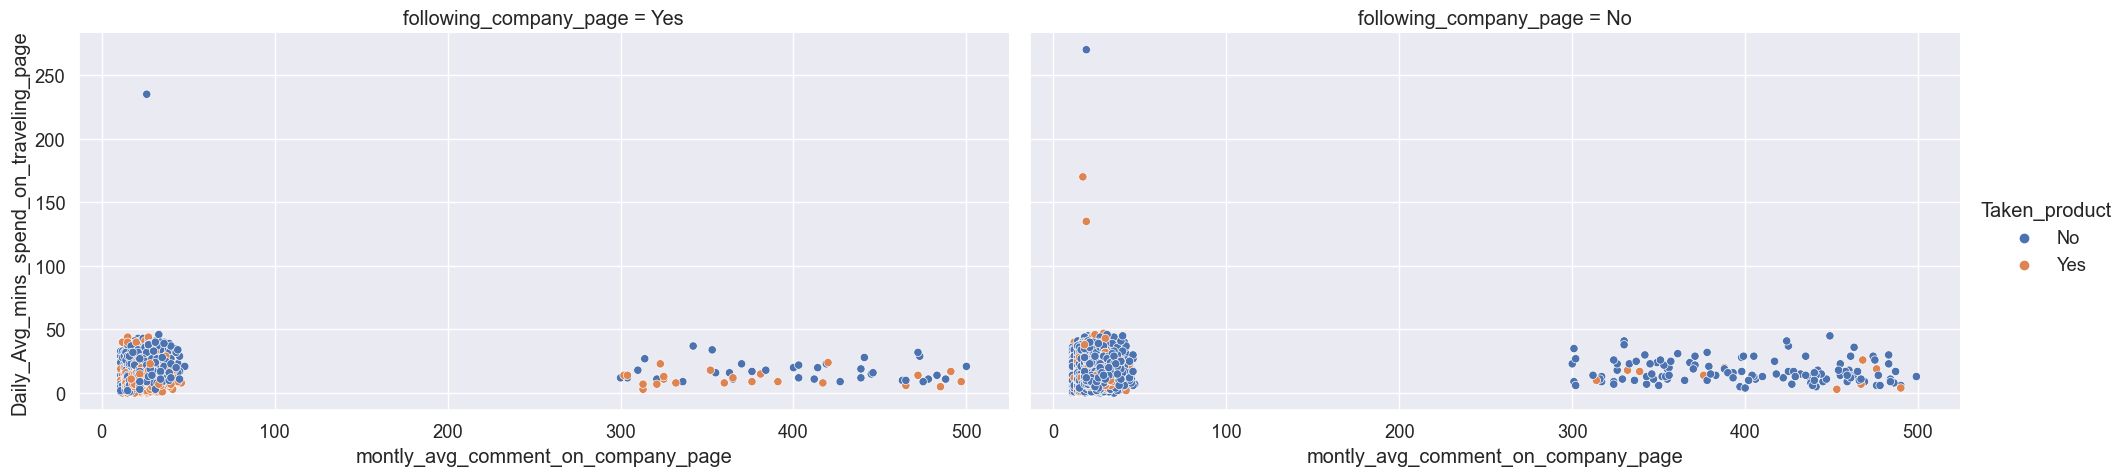

In [102]:
#Numerical values: montly_avg_comment_on_company_page vs Daily_Avg_mins_spend_on_traveling_page:

sns.relplot(x='montly_avg_comment_on_company_page',y='Daily_Avg_mins_spend_on_traveling_page',
            data=user_data,col='following_company_page',hue='Taken_product',
            hue_order=['No','Yes'],
            height=5,aspect=2)

Text(0.5, 1.0, 'Correlation Heatmap\n')

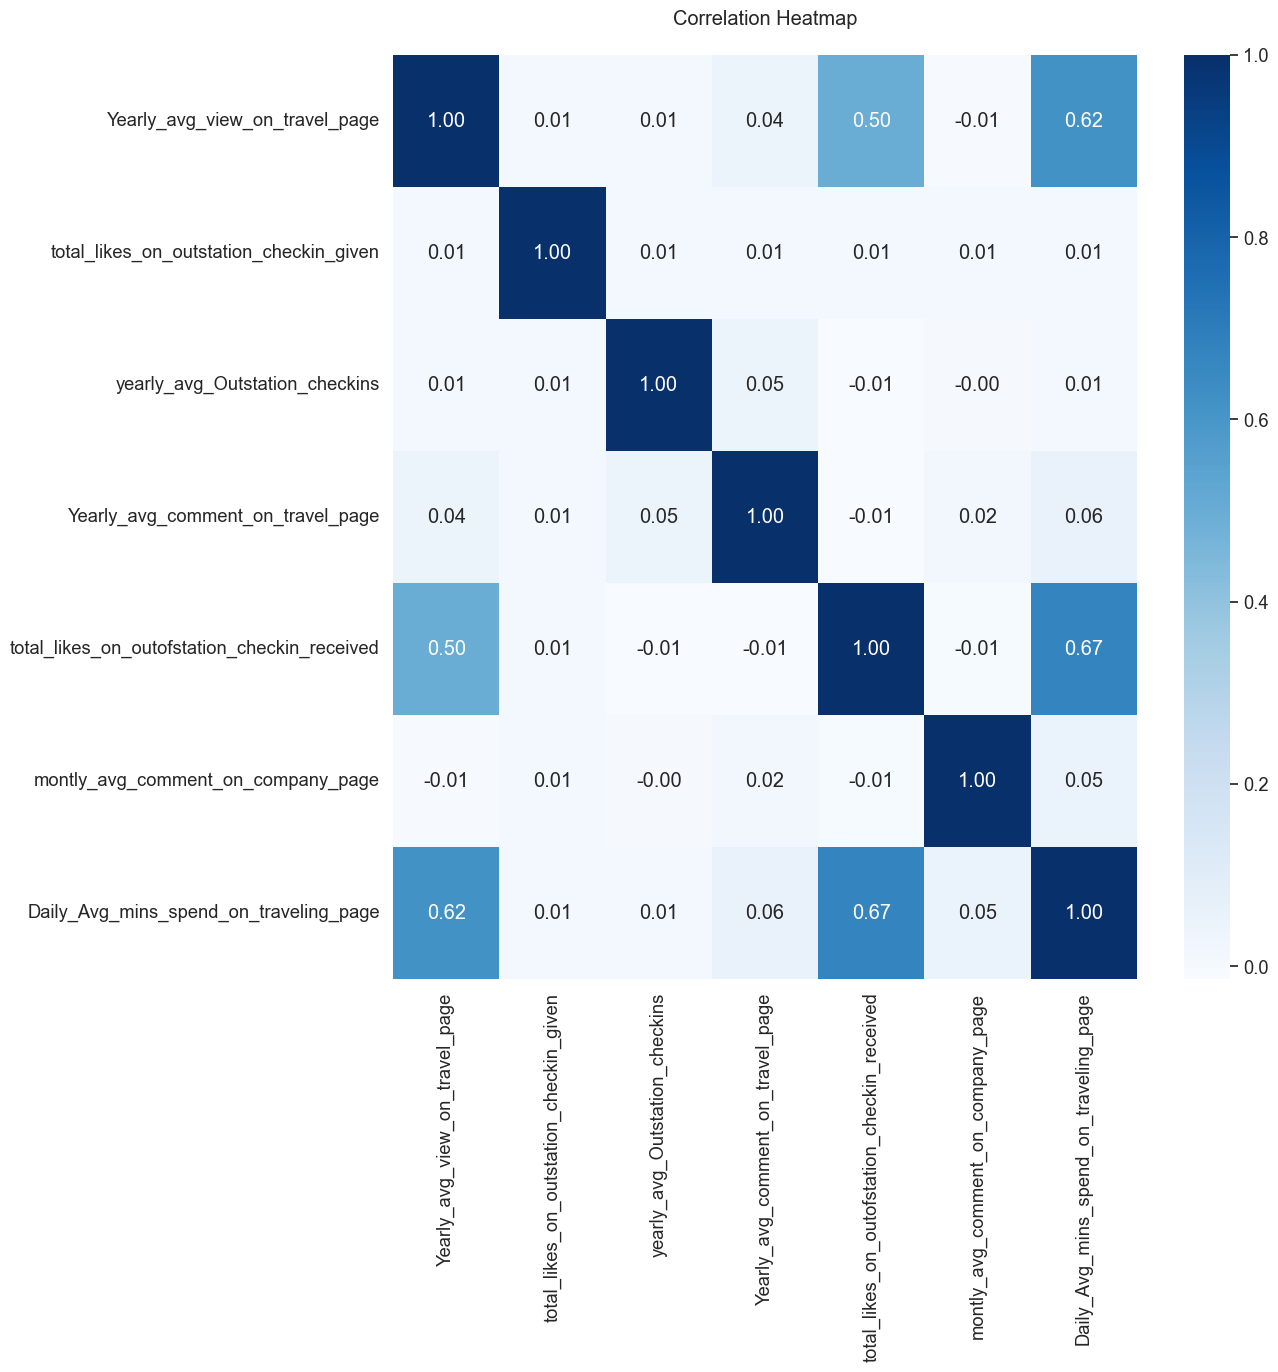

In [103]:
#Heatmap of the numeric variables

plt.figure(figsize=(12,12))
a=sns.heatmap(user_data.corr(), annot=True, fmt='.2f', cmap='Blues');
a.set_title("Correlation Heatmap\n")

#### Observation:

- We cannot see any strong correlation between the variables. 
- Daily_avg_mins_spend_on_traveling_page and total_likes_on_outofstation_checkin_received has moderate postive correlation suggest that person who spends more time on traeling page has higer likes for their checkins.
- Monthly_avg_comment_on_company_page and yearly_average_view_on_travel_page is negatively correlated
- Suprisingly, yearly_avg_outstation_checkins and total_likes_on_outofstation_checkin_received is negatively correlated. Thus, the number of checkins are high tendency to recevie likes is low.
- However, the negative correlation are very weak correlation and doesn't show any strong relationship.

#### a. Removal of unwanted variables (if applicable)

We have dropped the UserID columns as it doesn't provide any information about the class of target variable. We are not dropping any other variables.

#### b. Missing Value treatment (if applicable)	

In [104]:
missing.sort_values('Missing_values',ascending=False)

Variables  Missing_values
1                 Yearly_avg_view_on_travel_page             581
3        total_likes_on_outstation_checkin_given             381
7              Yearly_avg_comment_on_travel_page             206
10                        following_company_page             103
4                 yearly_avg_Outstation_checkins              75
2                               preferred_device              53
6                        preferred_location_type              31
0                                  Taken_product               0
5                               member_in_family               0
8   total_likes_on_outofstation_checkin_received               0
9             week_since_last_outstation_checkin               0
11            montly_avg_comment_on_company_page               0
12                                  working_flag               0
13                     travelling_network_rating               0
14                                    Adult_flag               0
15        Daily_Avg_mins_spend_on_traveling_page               0

In [105]:
user_data.dtypes

Taken_product                                    object
Yearly_avg_view_on_travel_page                  float64
preferred_device                                 object
total_likes_on_outstation_checkin_given         float64
yearly_avg_Outstation_checkins                  float64
member_in_family                                 object
preferred_location_type                          object
Yearly_avg_comment_on_travel_page               float64
total_likes_on_outofstation_checkin_received      int64
week_since_last_outstation_checkin               object
following_company_page                           object
montly_avg_comment_on_company_page                int64
working_flag                                     object
travelling_network_rating                        object
Adult_flag                                       object
Daily_Avg_mins_spend_on_traveling_page            int64
dtype: object

- We shall use Median for continuous variables and mode for categorical variable to impute the missing values.

In [106]:
#Catagorical variable missing value treatment:

user_data['following_company_page'] = np.where(user_data['following_company_page'].isna(),user_data['following_company_page'].mode(),user_data['following_company_page'])
user_data['preferred_device'] = np.where(user_data['preferred_device'].isna(),user_data['preferred_device'].mode(),user_data['preferred_device'])
user_data['preferred_location_type'] = np.where(user_data['preferred_location_type'].isna(),user_data['preferred_location_type'].mode(),user_data['preferred_location_type'])

In [107]:
#Continious variables missing value treatment:

user_data['Yearly_avg_view_on_travel_page'] = np.where(user_data['Yearly_avg_view_on_travel_page'].isna(),user_data['Yearly_avg_view_on_travel_page'].median(),user_data['Yearly_avg_view_on_travel_page'])
user_data['total_likes_on_outstation_checkin_given'] = np.where(user_data['total_likes_on_outstation_checkin_given'].isna(),user_data['total_likes_on_outstation_checkin_given'].median(),user_data['total_likes_on_outstation_checkin_given'])
user_data['yearly_avg_Outstation_checkins'] = np.where(user_data['yearly_avg_Outstation_checkins'].isna(),user_data['yearly_avg_Outstation_checkins'].median(),user_data['yearly_avg_Outstation_checkins'])
user_data['Yearly_avg_comment_on_travel_page'] = np.where(user_data['Yearly_avg_comment_on_travel_page'].isna(),user_data['Yearly_avg_comment_on_travel_page'].median(),user_data['Yearly_avg_comment_on_travel_page'])


In [108]:
#Missing Values check after treatment:

user_data.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

#### d. Outlier treatment (if required)

In [109]:
#defining the method

def remove_outliers(column):
    Q1,Q3 = column.quantile([0.25,0.75])
    IQR = Q3-Q1
    Upper_limit = Q3 + (1.5 * IQR)
    Lower_limit = Q1 - (1.5 * IQR)
    return Upper_limit,Lower_limit

In [110]:
#Treating outliers in numerical variable data by setting up the upper level/lower level value as the new values:

for col in num:
    ur,lr = remove_outliers(user_data[col])
    user_data[col] = np.where(user_data[col]>ur, ur,user_data[col])
    user_data[col] = np.where(user_data[col]<lr, lr,user_data[col])

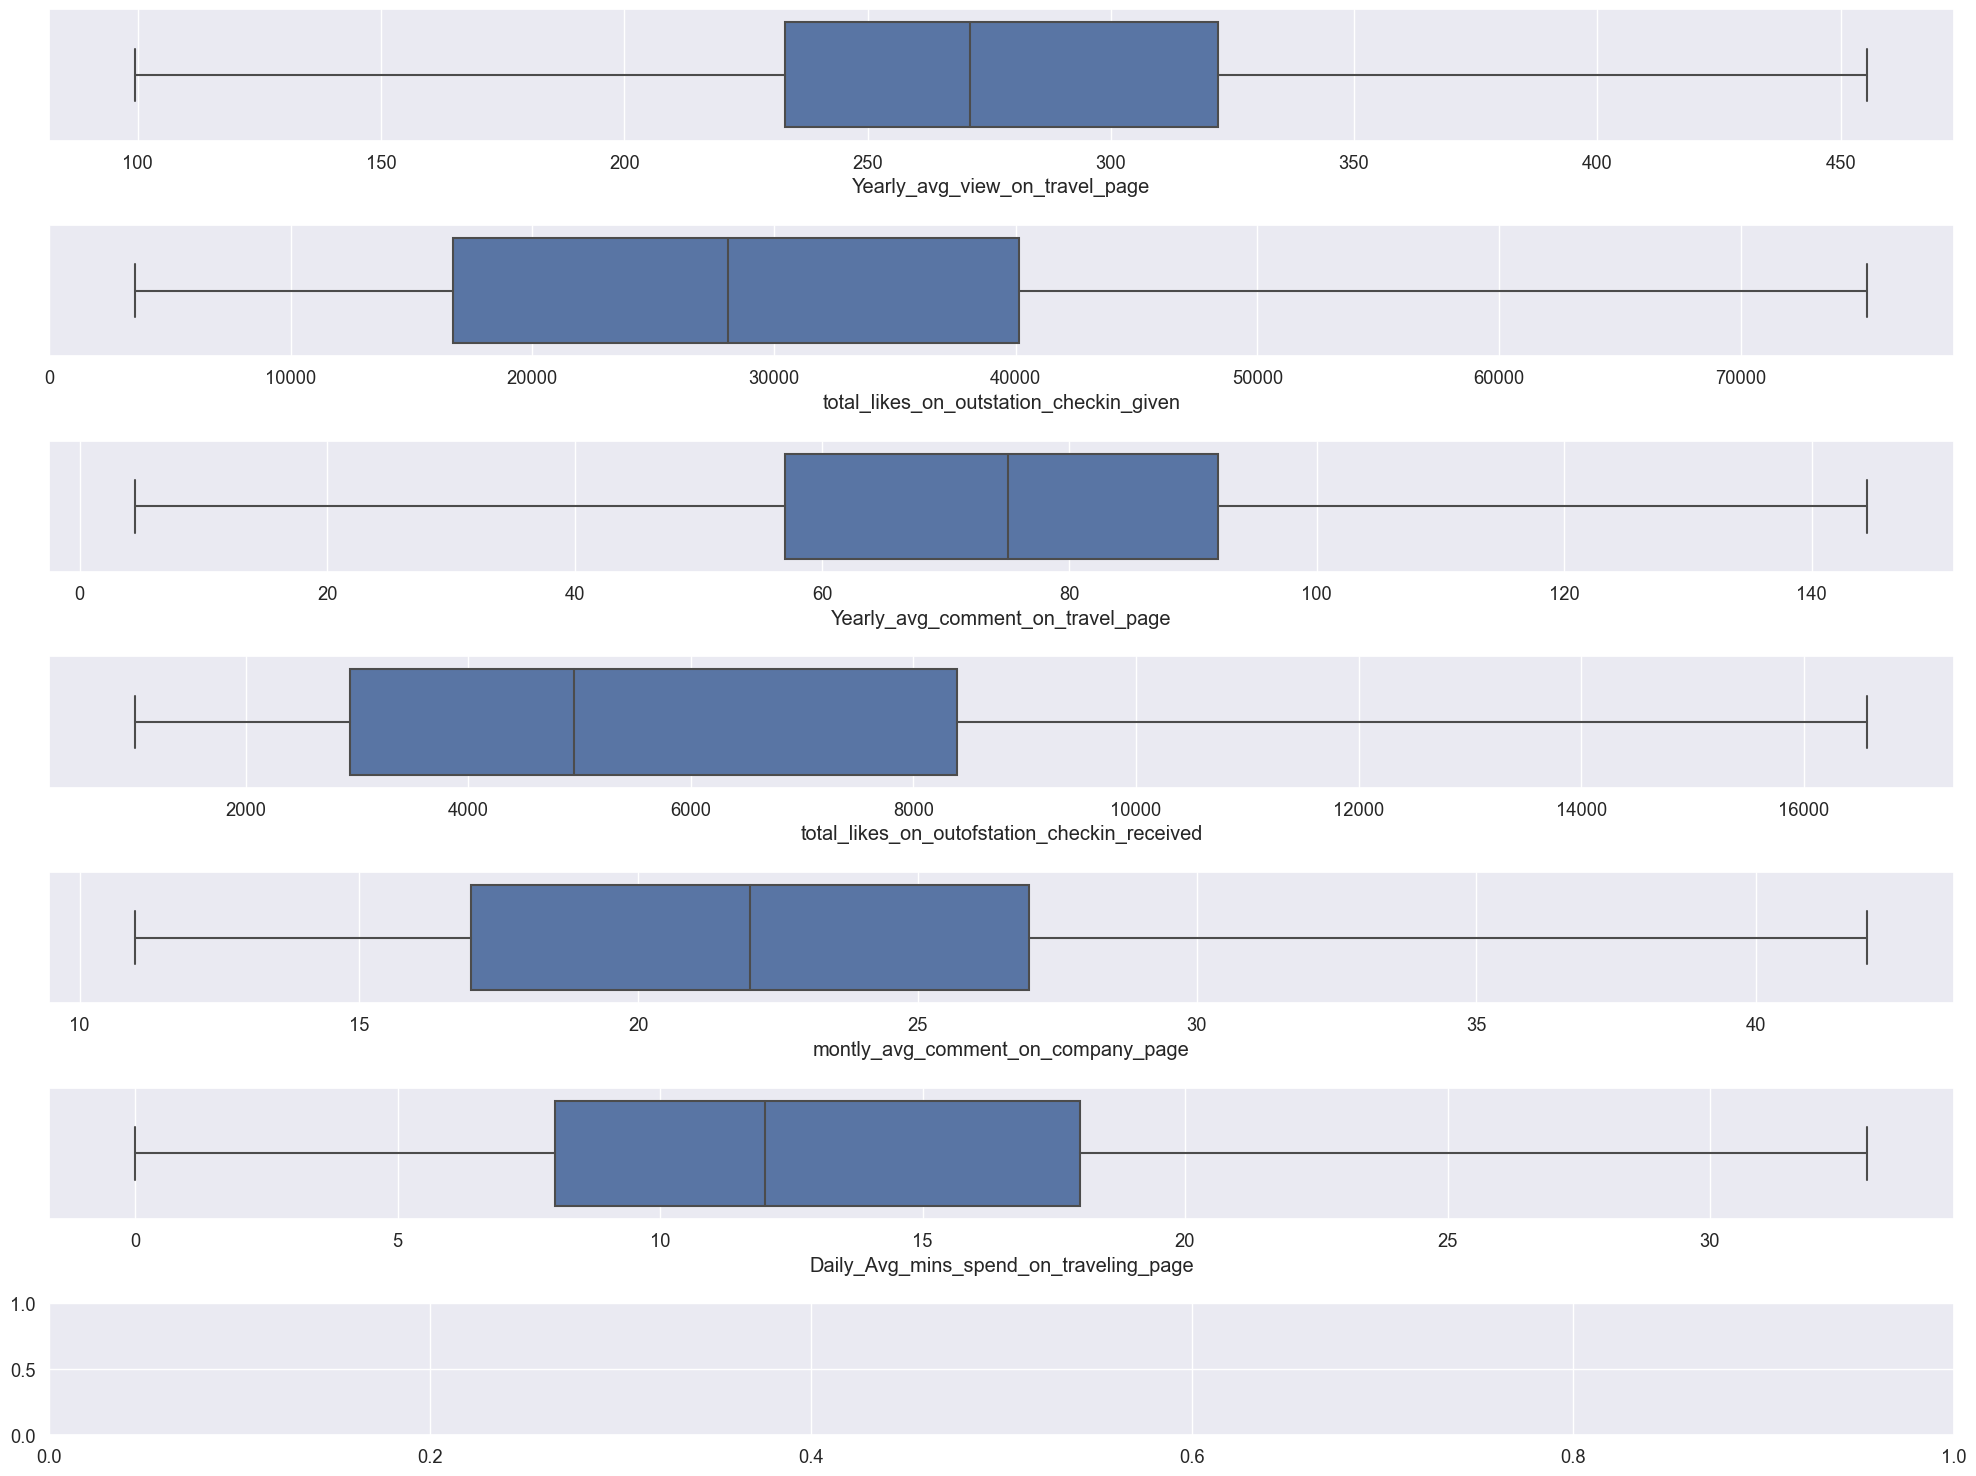

In [111]:
#validating the data after outlier treatment:

fig,axes = plt.subplots(7,1,figsize=(20,15))
for c,a in zip(num,axes.flatten()):
    sns.boxplot(x=user_data[c],ax=a)
    plt.tight_layout()

#### e. Variable transformation (if applicable)	

In [112]:
#creating dummy variables for different categories of preferred location type as it is a nominal variable
user_data_encoded = pd.get_dummies(user_data,columns=['preferred_location_type'],drop_first=True)
user_data_encoded.head()

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
0           Yes                           307.0           Mobile   
1            No                           367.0           Mobile   
2           Yes                           277.0           Mobile   
3            No                           247.0           Mobile   
4            No                           202.0           Mobile   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

  member_in_family  Yearly_avg_comment_on_travel_page  \
0                2                               94.0   
1                1                               61.0   
2                2                               92.0   
3                4                               56.0   
4                1                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

  week_since_last_outstation_checkin following_company_page  \
0                                  8                    Yes   
1                                  1                     No   
2                                  6                    Yes   
3                                  1                    Yes   
4                                  9                     No   

   montly_avg_comment_on_company_page working_flag travelling_network_rating  \
0                                11.0           No                         1   
1                                23.0          Yes                         4   
2                                15.0           No                         2   
3                                11.0           No                         3   
4                                12.0           No                         4   

  Adult_flag  Daily_Avg_mins_spend_on_traveling_page  \
0          0                                     8.0   
1          1                                    10.0   
2          0                                     7.0   
3          0                                     8.0   
4          1                                     6.0   

   preferred_location_type_Big Cities  preferred_location_type_Entertainment  \
0                                   0                                      0   
1                                   0                                      0   
2                                   0                                      0   
3                                   0                                      0   
4                                   0                                      0   

   preferred_location_type_Financial  preferred_location_type_Game  \
0                                  1                             0   
1                                  1                             0   
2                                  0                             0   
3                                  1                             0   
4                                  0                             0   

   preferred_location_type_Hill Stations  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   preferred_location_type_Historical site  preferred_location_type_Medical  \
0                              

- Also we noticed catagorical variables Taken_product, following_company_page and working_flag are having 'yes' or 'No' values, We are converting these values into binary 0 and 1 values.

In [113]:
#Converting taken_product, following_company_page and working_flag to binary values.

user_data_encoded['Taken_product'] = np.where(user_data_encoded['Taken_product']=='Yes',1,0)
user_data_encoded['following_company_page'] = np.where(user_data_encoded['following_company_page']=='Yes',1,0)
user_data_encoded['working_flag'] = np.where(user_data_encoded['working_flag']=='Yes',1,0)

print(user_data_encoded['Taken_product'].value_counts())
print()
print(user_data_encoded['following_company_page'].value_counts())
print()
print(user_data_encoded['working_flag'].value_counts())
print()

0    9864
1    1896
Name: Taken_product, dtype: int64

0    8463
1    3297
Name: following_company_page, dtype: int64

0    9952
1    1808
Name: working_flag, dtype: int64



In [114]:
#user_data_encoded.dtypes

In [115]:
#Changing the data type of Adult_flag,member_in_family,week_since_last_outstation_checkin and travelling_network_rating to int64 as it will help us in model building process.

user_data_encoded['Adult_flag'] = user_data_encoded['Adult_flag'].astype('int64')
user_data_encoded['member_in_family'] = user_data_encoded['member_in_family'].astype('int64')
user_data_encoded['week_since_last_outstation_checkin'] = user_data_encoded['week_since_last_outstation_checkin'].astype('int64')
user_data_encoded['travelling_network_rating'] = user_data_encoded['travelling_network_rating'].astype('int64')

#validating the dataset after the updates.
user_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  int32  
 1   Yearly_avg_view_on_travel_page                11760 non-null  float64
 2   preferred_device                              11760 non-null  object 
 3   total_likes_on_outstation_checkin_given       11760 non-null  float64
 4   yearly_avg_Outstation_checkins                11760 non-null  float64
 5   member_in_family                              11760 non-null  int64  
 6   Yearly_avg_comment_on_travel_page             11760 non-null  float64
 7   total_likes_on_outofstation_checkin_received  11760 non-null  float64
 8   week_since_last_outstation_checkin            11760 non-null  int64  
 9   following_company_page                        11760 non-null 

#### f. Addition of new variables (if required)

- We are not adding any new variables as of now. We will proceed with the existig variables. If in case it is required, We will add the new varables to the dataset.

## 4. Business insights from EDA 

####  a. Is the data unbalanced? If so, what can be done? Please explain in the context of the business

Before checking the balance of the data, let bifuricate the dataset into two based on the User preferred device - 'Laptop' and 'Mobile'.

In [116]:
#user_data_encoded.preferred_device.value_counts()

data_laptop = user_data_encoded[user_data_encoded['preferred_device']=='Laptop']
data_laptop.shape

(1108, 28)

In [117]:
data_mobile = user_data_encoded[user_data_encoded['preferred_device']=='Mobile']
data_mobile.shape

(10652, 28)

In [118]:
#We are removing the 'preffered_device' attribute rom both the datasets
data_laptop.drop(['preferred_device'],axis=1,inplace=True)
data_laptop.head()

Taken_product  Yearly_avg_view_on_travel_page  \
5881              0                           379.0   
5883              0                           255.0   
5885              0                           250.0   
5888              0                           295.0   
5906              1                           250.0   

      total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
5881                                   9776.0                             8.0   
5883                                  48725.0                             3.0   
5885                                  35184.0                             2.0   
5888                                   7572.0                            23.0   
5906                                  39379.0                            16.0   

      member_in_family  Yearly_avg_comment_on_travel_page  \
5881                 1                               64.0   
5883                 4                               59.0   
5885                 2                               84.0   
5888                 3                               48.0   
5906                 1                               80.0   

      total_likes_on_outofstation_checkin_received  \
5881                                        5142.0   
5883                                        2913.0   
5885                                        3074.0   
5888                                        9532.0   
5906                                        3926.0   

      week_since_last_outstation_checkin  following_company_page  \
5881                                   1                       0   
5883                                   1                       1   
5885                                   0                       0   
5888                                   0                       0   
5906                                   1                       1   

      montly_avg_comment_on_company_page  working_flag  \
5881                                33.0             1   
5883                                19.0             0   
5885                                23.0             0   
5888                                33.0             1   
5906                                33.0             1   

      travelling_network_rating  Adult_flag  \
5881                          4           1   
5883                          3           0   
5885                          3           0   
5888                          2           0   
5906                          2           0   

      Daily_Avg_mins_spend_on_traveling_page  \
5881                                    10.0   
5883                                     8.0   
5885                                     8.0   
5888                                    10.0   
5906                                    10.0   

      preferred_location_type_Big Cities  \
5881                                   0   
5883                                   0   
5885                                   0   
5888                                   0   
5906                                   0   

      preferred_location_type_Entertainment  \
5881                                      0   
5883                                      0   
5885                                      0   
5888                                      0   
5906                                      0   

      preferred_location_type_Financial  preferred_location_type_Game  \
5881                                  0                             0   
5883                                  0                             0   
5885                                  0                             0   
5888                                  0                             0   
5906                                  0                             0   

      preferred_location_type_Hill Stations  \
5881                                      0   
5883                                      0   
5885                                  

In [119]:
data_mobile.drop(['preferred_device'],axis=1,inplace=True)
data_mobile.head()

Taken_product  Yearly_avg_view_on_travel_page  \
0              1                           307.0   
1              0                           367.0   
2              1                           277.0   
3              0                           247.0   
4              0                           202.0   

   total_likes_on_outstation_checkin_given  yearly_avg_Outstation_checkins  \
0                                  38570.0                             1.0   
1                                   9765.0                             1.0   
2                                  48055.0                             1.0   
3                                  48720.0                             1.0   
4                                  20685.0                             1.0   

   member_in_family  Yearly_avg_comment_on_travel_page  \
0                 2                               94.0   
1                 1                               61.0   
2                 2                               92.0   
3                 4                               56.0   
4                 1                               40.0   

   total_likes_on_outofstation_checkin_received  \
0                                        5993.0   
1                                        5130.0   
2                                        2090.0   
3                                        2909.0   
4                                        3468.0   

   week_since_last_outstation_checkin  following_company_page  \
0                                   8                       1   
1                                   1                       0   
2                                   6                       1   
3                                   1                       1   
4                                   9                       0   

   montly_avg_comment_on_company_page  working_flag  \
0                                11.0             0   
1                                23.0             1   
2                                15.0             0   
3                                11.0             0   
4                                12.0             0   

   travelling_network_rating  Adult_flag  \
0                          1           0   
1                          4           1   
2                          2           0   
3                          3           0   
4                          4           1   

   Daily_Avg_mins_spend_on_traveling_page  preferred_location_type_Big Cities  \
0                                     8.0                                   0   
1                                    10.0                                   0   
2                                     7.0                                   0   
3                                     8.0                                   0   
4                                     6.0                                   0   

   preferred_location_type_Entertainment  preferred_location_type_Financial  \
0                                      0                                  1   
1                                      0                                  1   
2                                      0                                  0   
3                                      0                                  1   
4                                      0                                  0   

   preferred_location_type_Game  preferred_location_type_Hill Stations  \
0                             0                                      0   
1                             0                                      0   
2                             0                                      0   
3                             0                                      0   
4                             0                                      0   

   preferred_location_type_Historical site  preferred_location_type_Medical  \
0                                        0                                0   
1            

#### Checking for class imbalance

In [120]:
data_laptop['Taken_product'].value_counts(normalize=True)

0    0.750903
1    0.249097
Name: Taken_product, dtype: float64

In [121]:
data_mobile['Taken_product'].value_counts(normalize=True)

0    0.847916
1    0.152084
Name: Taken_product, dtype: float64

#### As the Target class:1 of the Dependent variable is more than 10% of the given data in both of the data sets there is no need for any data balancing.

#### -------------------------Note2-------------------------------------

### Addition of new variable 'Traveller':

New variable 'Traveller' based on yearly average number of outstation check-ins can be created in order to find the most frequent travellers buy dividing the values into 3 bukets 
- <=2 average check-ins per year  as 1 (Not a traveller), 
- 3-10 average check-ins per year as 2 (Moderate traveller), 
- 11-29 average check-ins per year as 3 (Frequent traveller)

Based on this user's travel frequency we can check whether their frequent travel and popularity status infulence in the converting them as a customer to taken the compnay's product.

<AxesSubplot:xlabel='yearly_avg_Outstation_checkins', ylabel='Count'>

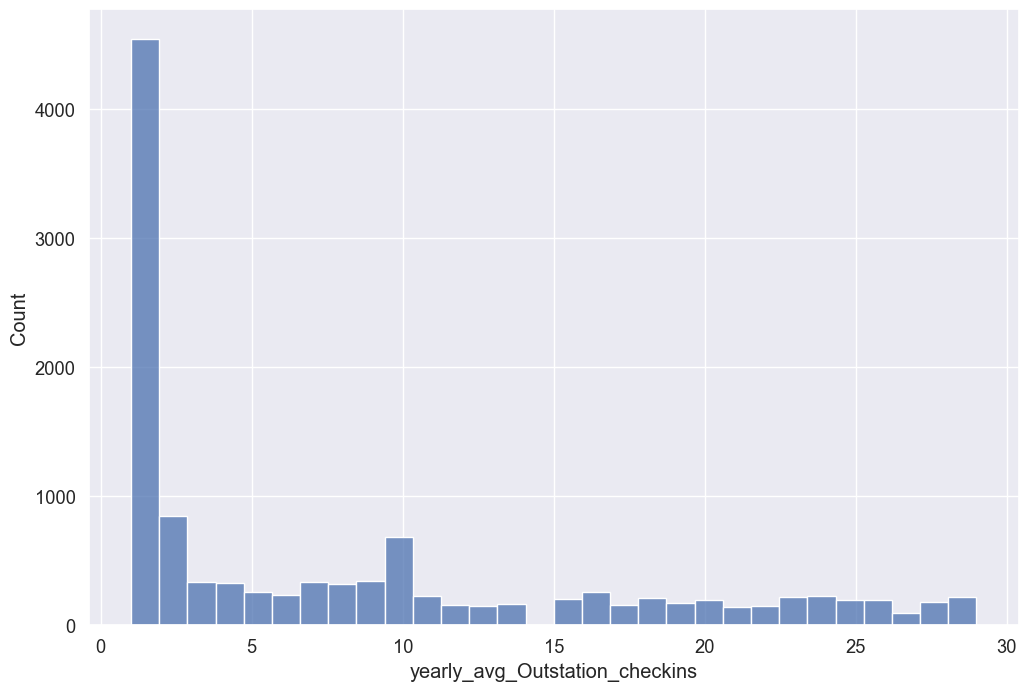

In [122]:
#Count plot for yearly_avg_Outstation_checkins all together

plt.figure(figsize=(12,8))
sns.histplot(user_data_encoded['yearly_avg_Outstation_checkins'],bins=30)

In [126]:
user_data_encoded['Traveller'] = pd.cut(user_data_encoded['yearly_avg_Outstation_checkins'],bins=[0,2,11,29],labels=[1,2,3])

In [123]:
#Let's give labels for the each bucket of users based on their frequency of travel in both the datesets



#laptop
data_laptop['Traveller'] = pd.cut(data_laptop['yearly_avg_Outstation_checkins'],bins=[0,2,11,29],labels=[1,2,3])

#mobile
data_mobile['Traveller'] = pd.cut(data_mobile['yearly_avg_Outstation_checkins'],bins=[0,2,11,29],labels=[1,2,3])


In [124]:
#Traveler value count in laptop dataset
data_laptop['Traveller'].value_counts()

2    448
1    344
3    316
Name: Traveller, dtype: int64

In [125]:
#Traveler value count in mobile dataset
data_mobile['Traveller'].value_counts()

1    5044
3    2985
2    2623
Name: Traveller, dtype: int64

Text(0, 0.5, '% of Taken_product')

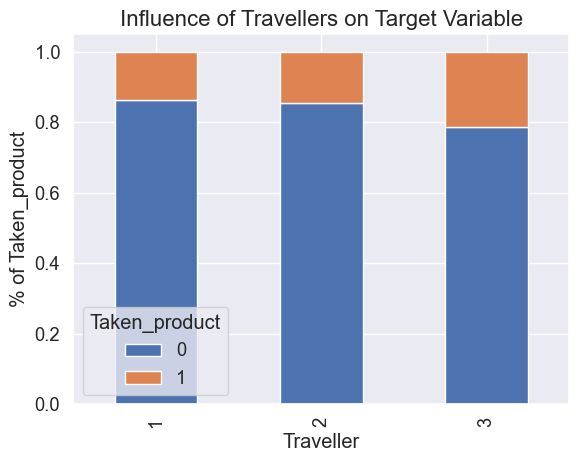

In [133]:
#user_data_encoded.groupby('Traveller')['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot.bar(stacked=True)

pd.crosstab(user_data_encoded['Traveller'],user_data_encoded['Taken_product'],normalize='index').plot.bar(stacked=True)
plt.title("Influence of Travellers on Target Variable",fontsize=16)
plt.ylabel('% of Taken_product')

#### Observation
- We noticed good number of frequent travellers and moderate travellers in both the datasets.
- Thus by grouping the users based on the Travel frequency based on the check-ins show significance in predicting the target of 'Taken_product'. 
- As the user with higher travel frequency has more proportion of opting for the company's product.

In [140]:
#data_laptop.dtypes

#changing the traveller data type from category to int64

user_data_encoded['Traveller'] = user_data_encoded['Traveller'].astype('int64')
data_laptop['Traveller'] = data_laptop['Traveller'].astype('int64')
data_mobile['Traveller'] = data_mobile['Traveller'].astype('int64')

In [139]:
#data_laptop.dtypes

In [154]:
#We are removing the 'yearly_avg_Outstation_checkins' attribute rom both the datasets
user_data_encoded.drop(['yearly_avg_Outstation_checkins'],axis=1,inplace=True)
data_laptop.drop(['yearly_avg_Outstation_checkins'],axis=1,inplace=True)
data_mobile.drop(['yearly_avg_Outstation_checkins'],axis=1,inplace=True)

#### Insight:
- 'Traveller' frequency of the user also has significance in predicition the class '0' or '1' of target variable. Also, user who is a frequent traveller tends to take the company products. Even then we still have many customer to convert into the class '1' by making them to prefer the company's product.


## **Project Notes -2 (Model Selection)**

### **1) Model Building and interpretation**

#### Splitting the data set into 'Predictor' and 'Target' variables

In [155]:
#Laptop

X_laptop = data_laptop.drop('Taken_product',axis=1)
Y_laptop = data_laptop['Taken_product']
print('Size of X_laptop: ',X_laptop.shape)
print('Size of Y_laptop: ',Y_laptop.shape)

Size of X_laptop:  (1108, 26)
Size of Y_laptop:  (1108,)


In [375]:
#Mobile

X_mobile = data_mobile.drop('Taken_product',axis=1)
Y_mobile = data_mobile['Taken_product']
print('Size of X_mobile: ',X_mobile.shape)
print('Size of Y_mobile: ',Y_mobile.shape)

Size of X_mobile:  (10652, 26)
Size of Y_mobile:  (10652,)


#### Divide the data into Test and Train dataset

In [157]:
#import train test splitter
from sklearn.model_selection import train_test_split

In [158]:
#for laptop data

X_laptop_train, X_laptop_test, y_laptop_train, y_laptop_test = train_test_split(X_laptop,Y_laptop,test_size=0.30,random_state=1)
print('Size of X_train for laptop: ', X_laptop_train.shape) 
print('Size of X_test for laptop: ',X_laptop_test.shape)
print('Size of y_train for laptop: ',y_laptop_train.shape)
print('Size of y_test for laptop: ',y_laptop_test.shape)

Size of X_train for laptop:  (775, 26)
Size of X_test for laptop:  (333, 26)
Size of y_train for laptop:  (775,)
Size of y_test for laptop:  (333,)


In [159]:
#for mobile data
X_mobile_train, X_mobile_test, y_mobile_train, y_mobile_test = train_test_split(X_mobile,Y_mobile,test_size=0.30,random_state=1)
print('Size of X_train for mobile: ', X_mobile_train.shape) 
print('Size of X_test for mobile: ',X_mobile_test.shape)
print('Size of y_train for mobile: ',y_mobile_train.shape)
print('Size of y_test for mobile: ',y_mobile_test.shape)

Size of X_train for mobile:  (7456, 26)
Size of X_test for mobile:  (3196, 26)
Size of y_train for mobile:  (7456,)
Size of y_test for mobile:  (3196,)


In [167]:
X_laptop_train.info()
#X_laptop_test.info()
#y_laptop_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 9404 to 11483
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                775 non-null    float64
 1   total_likes_on_outstation_checkin_given       775 non-null    float64
 2   member_in_family                              775 non-null    int64  
 3   Yearly_avg_comment_on_travel_page             775 non-null    float64
 4   total_likes_on_outofstation_checkin_received  775 non-null    float64
 5   week_since_last_outstation_checkin            775 non-null    int64  
 6   following_company_page                        775 non-null    int32  
 7   montly_avg_comment_on_company_page            775 non-null    float64
 8   working_flag                                  775 non-null    int32  
 9   travelling_network_rating                     775 non-null  

In [163]:
#count of number and catagorical columns.

num_columns = X_laptop_train.select_dtypes('float64').columns
cat_columns = X_laptop_train.select_dtypes(['int64','int32','uint8']).columns
print(len(cat_columns))
print(len(num_columns))

20
6


#### Scale the 'predictor' variables as few models are sensitive to scales of different variables

In [166]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [168]:
#Scaled train and test data of laptop

lap_num_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_laptop_train[num_columns]),columns=num_columns,index=X_laptop_train.index)
X_laptop_train_scaled = lap_num_scaled_train
X_laptop_train_scaled[cat_columns] = X_laptop_train[cat_columns]

lap_num_scaled_test = pd.DataFrame(std_scaler.transform(X_laptop_test[num_columns]),columns=num_columns,index=X_laptop_test.index)
X_laptop_test_scaled = lap_num_scaled_test
X_laptop_test_scaled[cat_columns] = X_laptop_test[cat_columns]

print(X_laptop_train_scaled.shape)
print(X_laptop_test_scaled.shape)

(775, 26)
(333, 26)


In [169]:
#Scaled train and test data of mobile

mob_num_scaled_train = pd.DataFrame(std_scaler.fit_transform(X_mobile_train[num_columns]),columns=num_columns,index=X_mobile_train.index)
X_mobile_train_scaled = mob_num_scaled_train
X_mobile_train_scaled[cat_columns] = X_mobile_train[cat_columns]

mob_num_scaled_test = pd.DataFrame(std_scaler.transform(X_mobile_test[num_columns]),columns=num_columns,index=X_mobile_test.index)
X_mobile_test_scaled = mob_num_scaled_test
X_mobile_test_scaled[cat_columns] = X_mobile_test[cat_columns]

print(X_mobile_train_scaled.shape)
print(X_mobile_test_scaled.shape)

(7456, 26)
(3196, 26)


### **Models for Laptop**

#### Choice of model Evaluation Metrics:
- For the first iteration, let us build the models with default parameters. Depending upon the performance of the model, whether it overfit or underfit, we shall do the hyperparameter tuning to achieve a better results on both train and test data set for the necessary parameters.
- Here, we shall consider Recall of the positive class as one of the important metric in evaluating the model performance. Higher Recall shows that the model is good at predicting all the customer who are likely to buy the product by reducing the False Positives.

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In [170]:
#Detecting Multicollinearity with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [172]:
# Checking multicollinearity of laptop
vif_laptop = calc_vif(X_laptop_train_scaled)
vif_laptop.sort_values('VIF',ascending=False)

variables       VIF
6                               member_in_family  7.907532
25                                     Traveller  6.324587
10                     travelling_network_rating  6.307655
5         Daily_Avg_mins_spend_on_traveling_page  3.025064
7             week_since_last_outstation_checkin  2.887609
11                                    Adult_flag  2.255310
3   total_likes_on_outofstation_checkin_received  2.090047
0                 Yearly_avg_view_on_travel_page  1.786551
17       preferred_location_type_Historical site  1.691398
9                                   working_flag  1.569327
8                         following_company_page  1.508582
4             montly_avg_comment_on_company_page  1.447612
12            preferred_location_type_Big Cities  1.287143
24              preferred_location_type_Trekking  1.205035
21                 preferred_location_type_Other  1.190352
16         preferred_location_type_Hill Stations  1.088956
2              Yearly_avg_comment_on_travel_page  1.051710
1        total_likes_on_outstation_checkin_given  1.044346
13         preferred_location_type_Entertainment       NaN
14             preferred_location_type_Financial       NaN
15                  preferred_location_type_Game       NaN
18               preferred_location_type_Medical       NaN
19                 preferred_location_type_Movie       NaN
20                   preferred_location_type_OTT       NaN
22          preferred_location_type_Social media       NaN
23       preferred_location_type_Tour and Travel       NaN

### Logistic Regression

In [173]:
#importing logistic regression library
from sklearn.linear_model import LogisticRegression


In [175]:
#Logistic regression model of laptop using scaled trained data

model_logistic_lap = LogisticRegression(random_state=123)
model_logistic_lap.fit(X_laptop_train_scaled,y_laptop_train)

LogisticRegression(random_state=123)

In [176]:
#Defining confusion matrix

def make_confusion_matrix(model_name,model,y_actual,X,labels=[1, 0]):
    fig,axes = plt.subplots(1,2,figsize = (12,5))
    for i,j,a,m in zip(y_actual,X,axes,model_name):
        y_predict = model.predict(j)
        cm=metrics.confusion_matrix( i, y_predict, labels=[0, 1])
        df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                      columns = ['Predicted - No','Predicted - Yes'])
        g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        g.set_title(m)

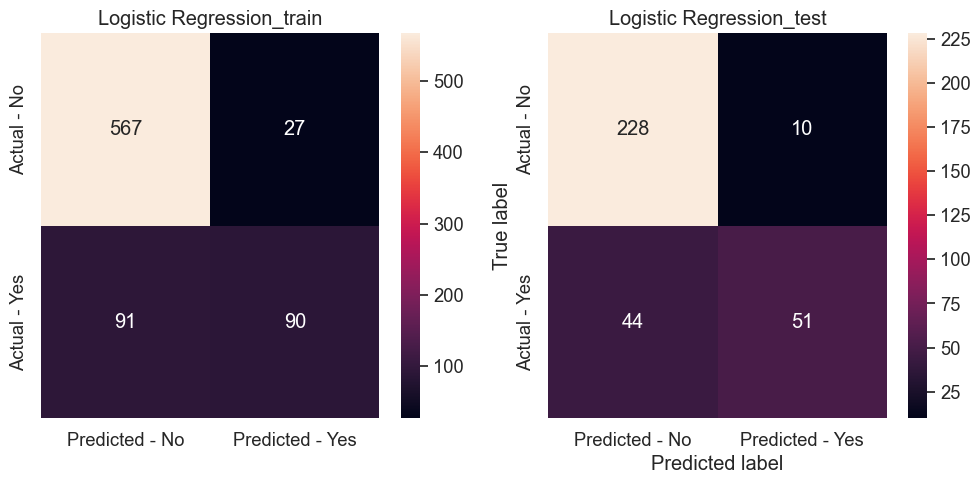

In [177]:
#confusion matrix of logistic regression of laptop train data.

make_confusion_matrix(['Logistic Regression_train','Logistic Regression_test'],model_logistic_lap
                      ,[y_laptop_train,y_laptop_test],[X_laptop_train_scaled,X_laptop_test_scaled])


In [178]:
pred_laptop_train_model_logistic = model_logistic_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_logistic = model_logistic_lap.predict(X_laptop_test_scaled)
pred_prob_laptop_train_model_logistic = model_logistic_lap.predict_proba(X_laptop_train_scaled)
pred_prob_laptop_test_model_logistic = model_logistic_lap.predict_proba(X_laptop_test_scaled)


print('Train Accuracy of the Logistic Regression model: ',model_logistic_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Logistic Regression model: ',model_logistic_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_logistic))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_logistic))
print()

print('Train AUC Score of the Logistic Regression Model:', metrics.roc_auc_score(y_laptop_train,pred_prob_laptop_train_model_logistic[:,1]))
print('Test AUC Score of the Logistic Regression Model:', metrics.roc_auc_score(y_laptop_test,pred_prob_laptop_test_model_logistic[:,1]))


Train Accuracy of the Logistic Regression model:  0.847741935483871
Test Accuracy of the Logistic Regression model:  0.8378378378378378

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       594
           1       0.77      0.50      0.60       181

    accuracy                           0.85       775
   macro avg       0.82      0.73      0.75       775
weighted avg       0.84      0.85      0.84       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.84      0.96      0.89       238
           1       0.84      0.54      0.65        95

    accuracy                           0.84       333
   macro avg       0.84      0.75      0.77       333
weighted avg       0.84      0.84      0.83       333


Train AUC Score of the Logistic Regression Model: 0.834142530275127
Test AUC Score of the Logistic Regression Model: 0.8732419283502876


### Decision Tree

In [180]:
#importing the decision tree  library
from sklearn.tree import DecisionTreeClassifier

In [182]:
#building the decision tree model using the scaled laptop train data
model_DT_lap = DecisionTreeClassifier(random_state=123)
model_DT_lap.fit(X_laptop_train_scaled,y_laptop_train)

DecisionTreeClassifier(random_state=123)

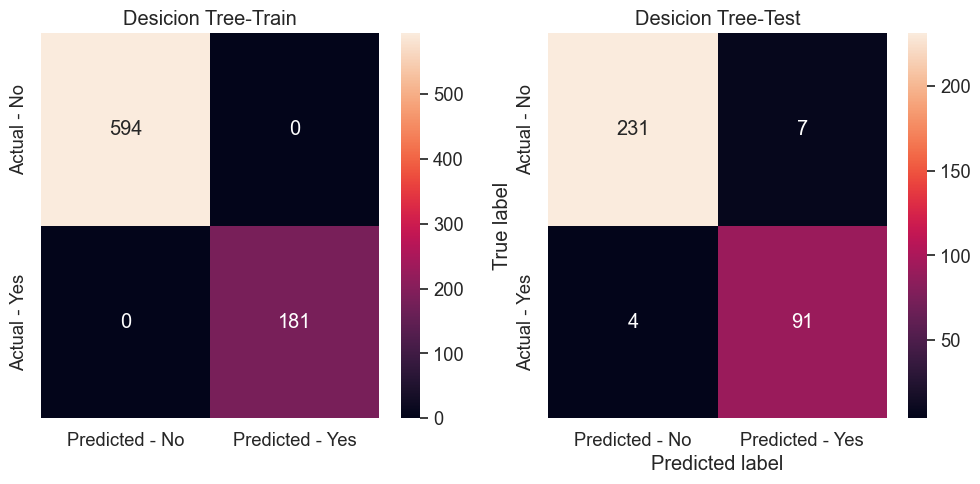

In [183]:
#Confusion matrix of the DT model
make_confusion_matrix(['Desicion Tree-Train','Desicion Tree-Test']
                      ,model_DT_lap,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [184]:
#Acuracy and classification report

pred_laptop_train_model_DT = model_DT_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_DT = model_DT_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the Decision Tree model: ',model_DT_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Decision model: ',model_DT_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_DT))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_DT))

Train Accuracy of the Decision Tree model:  1.0
Test Accuracy of the Decision model:  0.9669669669669669

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       238
           1       0.93      0.96      0.94        95

    accuracy                           0.97       333
   macro avg       0.96      0.96      0.96       333
weighted avg       0.97      0.97      0.97       333



### Random Forest

In [185]:
#importing random forest library
from sklearn.ensemble import RandomForestClassifier


In [186]:
model_RF_lap = RandomForestClassifier(random_state=123)
model_RF_lap.fit(X_laptop_train_scaled,y_laptop_train)

RandomForestClassifier(random_state=123)

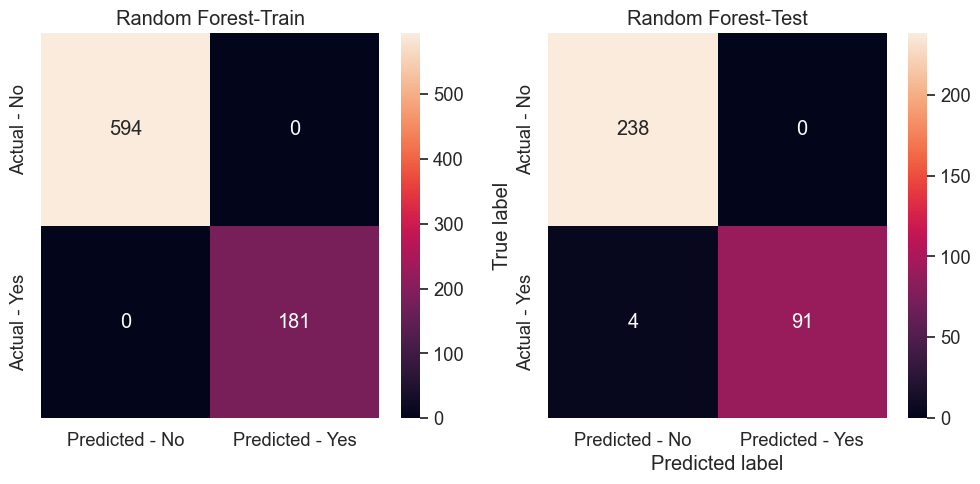

In [187]:
make_confusion_matrix(['Random Forest-Train','Random Forest-Test']
                      ,model_RF_lap
                      ,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [188]:
pred_laptop_train_model_RF = model_RF_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_RF = model_RF_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the Random Forest model: ',model_RF_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Random Forest model: ',model_RF_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_RF))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_RF))

Train Accuracy of the Random Forest model:  1.0
Test Accuracy of the Random Forest model:  0.987987987987988

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.96      0.98        95

    accuracy                           0.99       333
   macro avg       0.99      0.98      0.99       333
weighted avg       0.99      0.99      0.99       333



In [192]:
#pip install xgboost

In [191]:
from xgboost import XGBClassifier
model_XGB_lap = XGBClassifier(random_state=123)
model_XGB_lap.fit(X_laptop_train_scaled,y_laptop_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

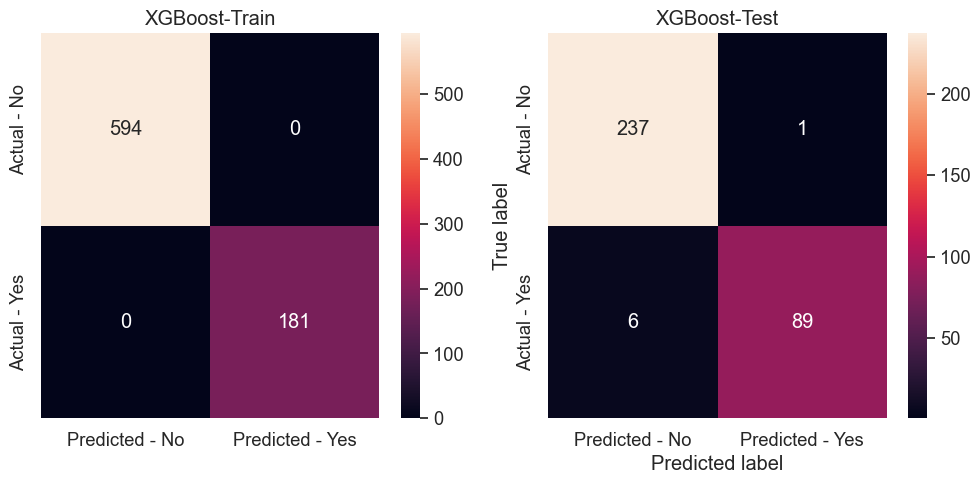

In [193]:
make_confusion_matrix(['XGBoost-Train','XGBoost-Test']
                      ,model_XGB_lap
                      ,[y_laptop_train,y_laptop_test]
                      ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [194]:
pred_laptop_train_model_XGB = model_XGB_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_XGB = model_XGB_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the XGBoost model: ',model_XGB_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the XGBoost model: ',model_XGB_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_XGB))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_XGB))

Train Accuracy of the XGBoost model:  1.0
Test Accuracy of the XGBoost model:  0.978978978978979

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       0.99      0.94      0.96        95

    accuracy                           0.98       333
   macro avg       0.98      0.97      0.97       333
weighted avg       0.98      0.98      0.98       333



### Artifical Neural Network (ANN)

In [195]:
#Importingt neural network library

from sklearn.neural_network import MLPClassifier

In [196]:
model_ANN_lap = MLPClassifier(activation='logistic',solver='adam',max_iter=400,random_state=123)
model_ANN_lap.fit(X_laptop_train_scaled,y_laptop_train)

MLPClassifier(activation='logistic', max_iter=400, random_state=123)

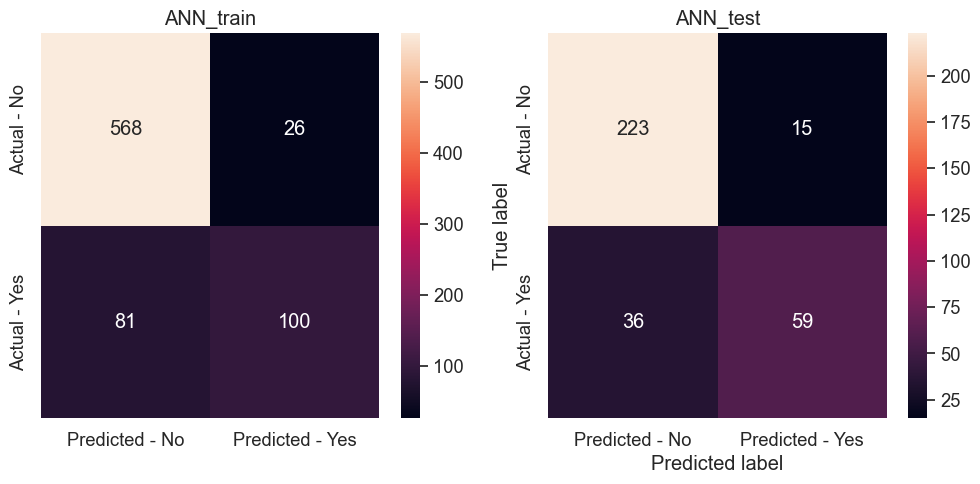

In [197]:
make_confusion_matrix(['ANN_train','ANN_test']
                        ,model_ANN_lap
                        ,[y_laptop_train,y_laptop_test]
                        ,[X_laptop_train_scaled,X_laptop_test_scaled])

In [198]:
pred_laptop_train_model_ANN = model_ANN_lap.predict(X_laptop_train_scaled)
pred_laptop_test_model_ANN = model_ANN_lap.predict(X_laptop_test_scaled)

print('Train Accuracy of the ANN model: ',model_ANN_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the ANN model: ',model_ANN_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,pred_laptop_train_model_ANN))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,pred_laptop_test_model_ANN))

Train Accuracy of the ANN model:  0.8619354838709677
Test Accuracy of the ANN model:  0.8468468468468469

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.96      0.91       594
           1       0.79      0.55      0.65       181

    accuracy                           0.86       775
   macro avg       0.83      0.75      0.78       775
weighted avg       0.86      0.86      0.85       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       238
           1       0.80      0.62      0.70        95

    accuracy                           0.85       333
   macro avg       0.83      0.78      0.80       333
weighted avg       0.84      0.85      0.84       333



### Model Metrics - Laptop Data

In [199]:
#lets combine all the results in a matrix form

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]

train_pred = [pred_laptop_train_model_logistic, pred_laptop_train_model_DT, pred_laptop_train_model_RF, pred_laptop_train_model_XGB, pred_laptop_train_model_ANN]
test_pred = [pred_laptop_test_model_logistic, pred_laptop_test_model_DT, pred_laptop_test_model_RF, pred_laptop_test_model_XGB, pred_laptop_test_model_ANN]
for i,j in zip(train_pred,test_pred):
    acc_train.append(accuracy_score(y_laptop_train,i))
    pre_train.append(precision_score(y_laptop_train,i,zero_division=0))
    rec_train.append(recall_score(y_laptop_train,i))
    f1_train.append(f1_score(y_laptop_train,i))
    
    acc_test.append(accuracy_score(y_laptop_test,j))
    pre_test.append(precision_score(y_laptop_test,j,zero_division=0))
    rec_test.append(recall_score(y_laptop_test,j))
    f1_test.append(f1_score(y_laptop_test,j))
metric_laptop = pd.DataFrame({'Model':mod,'Accuracy_train':acc_train,'Accuracy_test':acc_test 
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test}) 

In [200]:
lap_train_auc_score = []
for i in [model_logistic_lap,model_DT_lap,model_RF_lap,model_XGB_lap,model_ANN_lap]:
    lap_train_auc_score.append(metrics.roc_auc_score(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1]))

lap_test_auc_score = []
for i in [model_logistic_lap,model_DT_lap,model_RF_lap,model_XGB_lap,model_ANN_lap]:
    lap_test_auc_score.append(metrics.roc_auc_score(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1]))

metric_laptop['AUC_Score_train'] = lap_train_auc_score
metric_laptop['AUC_Score_test'] = lap_test_auc_score

metric_laptop

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Logistic        0.847742       0.837838         0.769231   
1  DecisionTree        1.000000       0.966967         1.000000   
2  RandomForest        1.000000       0.987988         1.000000   
3       XGBoost        1.000000       0.978979         1.000000   
4           ANN        0.861935       0.846847         0.793651   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.836066      0.497238     0.536842        0.604027       0.653846   
1        0.928571      1.000000     0.957895        1.000000       0.943005   
2        1.000000      1.000000     0.957895        1.000000       0.978495   
3        0.988889      1.000000     0.936842        1.000000       0.962162   
4        0.797297      0.552486     0.621053        0.651466       0.698225   

   AUC_Score_train  AUC_Score_test  
0         0.834143        0.873242  
1         1.000000        0.964241  
2         1.000000        0.999801  
3         1.000000        0.998629  
4         0.874742        0.887395

#### Insights for the default Model:
- Random Forest and XGBoost has the least number of False Negative (Type II error) in the Positive Class (1)
- Logistic regression is the least performing model followed by ANN.
- However, out of 5 model 3 are overfitting which achieve perfect accuracy of 100% in Train data thus the model is not generalised enough. Hence, we shall tune the hyperparameters for each model to achieve an optimal performance on both Train and Test data.

### **Models for Mobile**

In [201]:
#Detecting Multicollinearity using VIF

vif_mobile = calc_vif(X_mobile_train_scaled)
vif_mobile.sort_values('VIF',ascending=False)

variables       VIF
6                               member_in_family  6.667257
10                     travelling_network_rating  5.776853
25                                     Traveller  4.789532
5         Daily_Avg_mins_spend_on_traveling_page  2.964863
7             week_since_last_outstation_checkin  2.727697
14             preferred_location_type_Financial  2.304867
11                                    Adult_flag  2.266178
3   total_likes_on_outofstation_checkin_received  2.247741
18               preferred_location_type_Medical  2.042216
4             montly_avg_comment_on_company_page  1.864958
0                 Yearly_avg_view_on_travel_page  1.756391
17       preferred_location_type_Historical site  1.654804
9                                   working_flag  1.565909
22          preferred_location_type_Social media  1.385883
8                         following_company_page  1.383910
21                 preferred_location_type_Other  1.278301
13         preferred_location_type_Entertainment  1.277200
12            preferred_location_type_Big Cities  1.253730
24              preferred_location_type_Trekking  1.178806
23       preferred_location_type_Tour and Travel  1.076392
2              Yearly_avg_comment_on_travel_page  1.073568
16         preferred_location_type_Hill Stations  1.046718
1        total_likes_on_outstation_checkin_given  1.012446
15                  preferred_location_type_Game  1.008974
20                   preferred_location_type_OTT  1.007420
19                 preferred_location_type_Movie  1.004588

### Logistic Regression

In [202]:
model_logistic_mobile = LogisticRegression(solver='liblinear',random_state=123)
model_logistic_mobile.fit(X_mobile_train_scaled,y_mobile_train)

LogisticRegression(random_state=123, solver='liblinear')

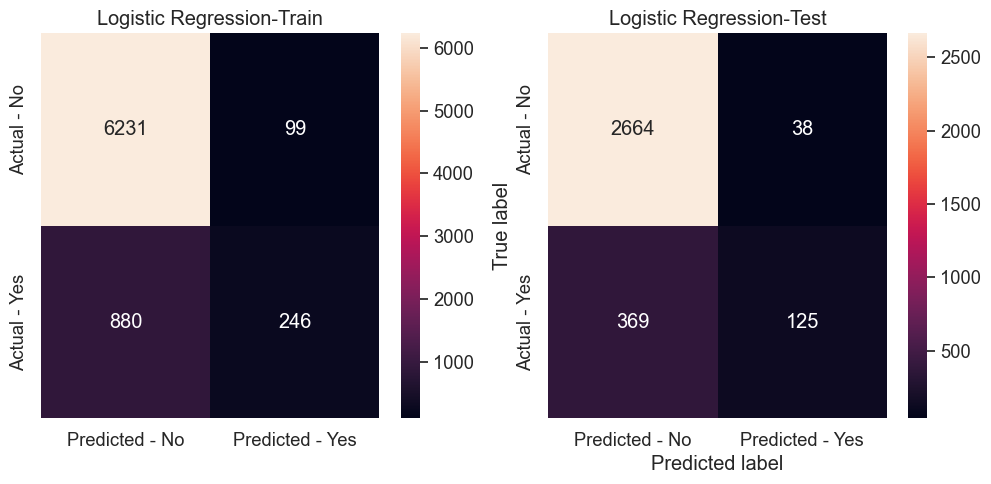

In [203]:
make_confusion_matrix(['Logistic Regression-Train','Logistic Regression-Test']
                      ,model_logistic_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [204]:
pred_mobile_train_model_logistic = model_logistic_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_logistic = model_logistic_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the Logistic Regression model: ',model_logistic_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Logistic Regression model: ',model_logistic_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_logistic))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_logistic))

Train Accuracy of the Logistic Regression model:  0.8686963519313304
Test Accuracy of the Logistic Regression model:  0.8726533166458073

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6330
           1       0.71      0.22      0.33      1126

    accuracy                           0.87      7456
   macro avg       0.79      0.60      0.63      7456
weighted avg       0.85      0.87      0.84      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2702
           1       0.77      0.25      0.38       494

    accuracy                           0.87      3196
   macro avg       0.82      0.62      0.65      3196
weighted avg       0.86      0.87      0.84      3196



### Decision Tree

In [205]:
model_DT_mobile = DecisionTreeClassifier(random_state=123)
model_DT_mobile.fit(X_mobile_train_scaled,y_mobile_train)

DecisionTreeClassifier(random_state=123)

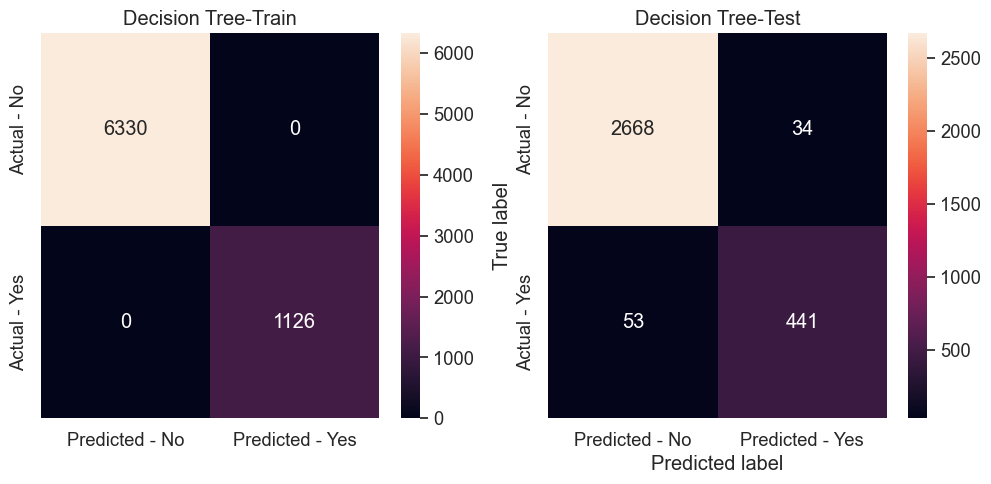

In [206]:
make_confusion_matrix(['Decision Tree-Train','Decision Tree-Test']
                      ,model_DT_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [207]:
pred_mobile_train_model_DT = model_DT_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_DT = model_DT_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the Decision Tree model: ',model_DT_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Decision model: ',model_DT_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_DT))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_DT))

Train Accuracy of the Decision Tree model:  1.0
Test Accuracy of the Decision model:  0.9727784730913642

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2702
           1       0.93      0.89      0.91       494

    accuracy                           0.97      3196
   macro avg       0.95      0.94      0.95      3196
weighted avg       0.97      0.97      0.97      3196



### Random Forest

In [208]:
model_RF_mobile = RandomForestClassifier(random_state=123)
model_RF_mobile.fit(X_mobile_train_scaled,y_mobile_train)

RandomForestClassifier(random_state=123)

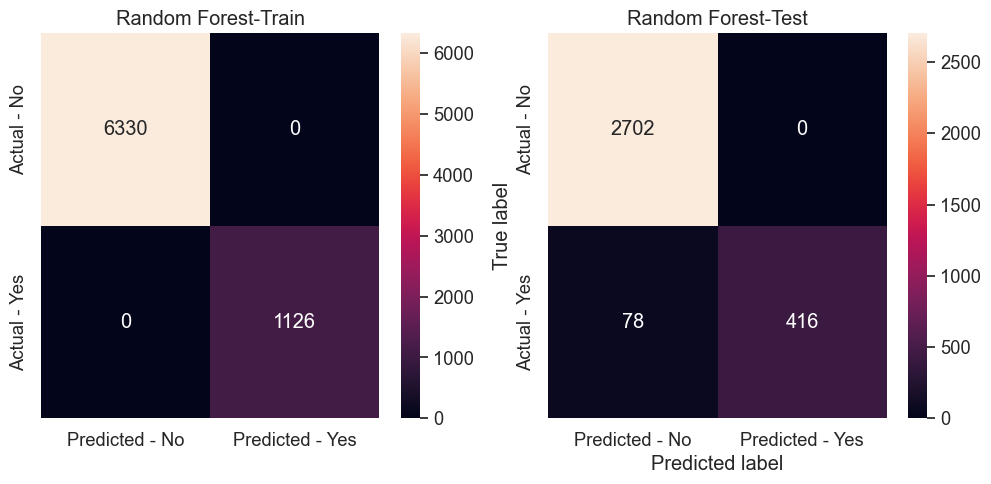

In [209]:
make_confusion_matrix(['Random Forest-Train','Random Forest-Test']
                      ,model_RF_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])


In [210]:
pred_mobile_train_model_RF = model_RF_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_RF = model_RF_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the Random Forest model: ',model_RF_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Random Forest model: ',model_RF_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_RF))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_RF))

Train Accuracy of the Random Forest model:  1.0
Test Accuracy of the Random Forest model:  0.9755944931163955

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2702
           1       1.00      0.84      0.91       494

    accuracy                           0.98      3196
   macro avg       0.99      0.92      0.95      3196
weighted avg       0.98      0.98      0.97      3196



In [211]:
model_XGB_mobile = XGBClassifier(random_state=123)
model_XGB_mobile.fit(X_mobile_train_scaled,y_mobile_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

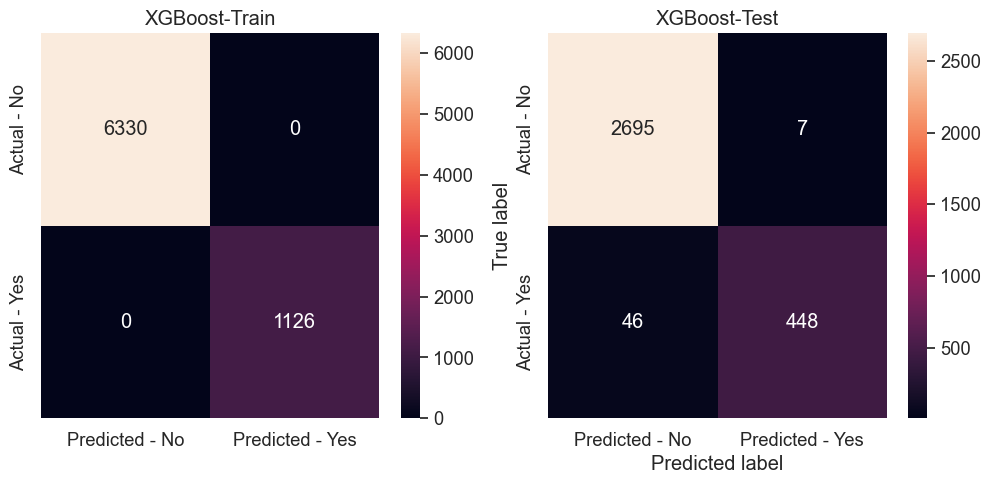

In [212]:
make_confusion_matrix(['XGBoost-Train','XGBoost-Test']
                      ,model_XGB_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [213]:
pred_mobile_train_model_XGB = model_XGB_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_XGB = model_XGB_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the XGBoost model: ',model_XGB_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',model_XGB_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_XGB))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_XGB))

Train Accuracy of the XGBoost model:  1.0
Test Accuracy of the XGBoost model:  0.9834167709637046

Classification Report TRAIN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       0.98      0.91      0.94       494

    accuracy                           0.98      3196
   macro avg       0.98      0.95      0.97      3196
weighted avg       0.98      0.98      0.98      3196



### Artifical Neural Network (ANN)

In [214]:
model_ANN_mobile = MLPClassifier(activation='logistic',solver='adam',max_iter=400,learning_rate_init=0.0001,random_state=123)
model_ANN_mobile.fit(X_mobile_train,y_mobile_train)

MLPClassifier(activation='logistic', learning_rate_init=0.0001, max_iter=400,
              random_state=123)

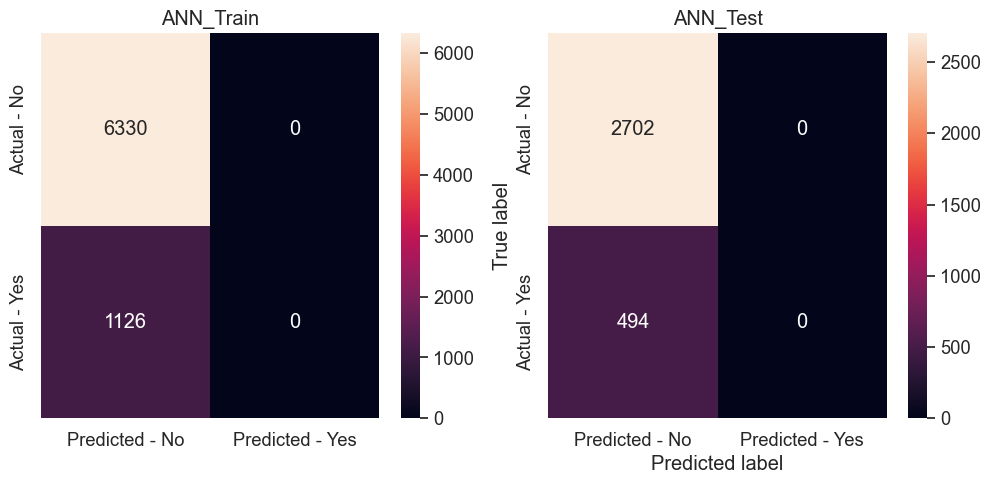

In [215]:
make_confusion_matrix(['ANN_Train','ANN_Test']
                      ,model_ANN_mobile
                      ,[y_mobile_train,y_mobile_test]
                      ,[X_mobile_train_scaled,X_mobile_test_scaled])

In [216]:
pred_mobile_train_model_ANN = model_ANN_mobile.predict(X_mobile_train_scaled)
pred_mobile_test_model_ANN = model_ANN_mobile.predict(X_mobile_test_scaled)

print('Train Accuracy of the XGBoost model: ',model_ANN_mobile.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',model_ANN_mobile.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,pred_mobile_train_model_ANN))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,pred_mobile_test_model_ANN))

Train Accuracy of the XGBoost model:  0.8489806866952789
Test Accuracy of the XGBoost model:  0.8454317897371715

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.00      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.42      0.50      0.46      7456
weighted avg       0.72      0.85      0.78      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.85      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.85      0.77      3196



### Model Metrics - Mobile Data

In [217]:
# Comparing the models as per performance on testing set
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
mod = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]

train_pred = [pred_mobile_train_model_logistic, pred_mobile_train_model_DT, pred_mobile_train_model_RF, pred_mobile_train_model_XGB, pred_mobile_train_model_ANN]
test_pred = [pred_mobile_test_model_logistic, pred_mobile_test_model_DT, pred_mobile_test_model_RF, pred_mobile_test_model_XGB, pred_mobile_test_model_ANN]
for i,j in zip(train_pred,test_pred):
    acc_train.append(accuracy_score(y_mobile_train,i))
    pre_train.append(precision_score(y_mobile_train,i,zero_division=0))
    rec_train.append(recall_score(y_mobile_train,i))
    f1_train.append(f1_score(y_mobile_train,i))
    
    acc_test.append(accuracy_score(y_mobile_test,j))
    pre_test.append(precision_score(y_mobile_test,j,zero_division=0))
    rec_test.append(recall_score(y_mobile_test,j))
    f1_test.append(f1_score(y_mobile_test,j))
metric_mobile = pd.DataFrame({'Model':mod,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test})    

In [219]:
mob_train_auc_score = []
mob_test_auc_score = []

for i in [model_logistic_mobile,model_DT_mobile,model_RF_mobile,model_XGB_mobile,model_ANN_mobile]:
    mob_train_auc_score.append(metrics.roc_auc_score(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1]))

for i in [model_logistic_mobile,model_DT_mobile,model_RF_mobile,model_XGB_mobile,model_ANN_mobile]:
    mob_test_auc_score.append(metrics.roc_auc_score(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1]))

metric_mobile['AUC_Score_train'] = mob_train_auc_score
metric_mobile['AUC_Score_test'] = mob_train_auc_score

metric_mobile.to_clipboard()
metric_mobile

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Logistic        0.868696       0.872653         0.713043   
1  DecisionTree        1.000000       0.972778         1.000000   
2  RandomForest        1.000000       0.975594         1.000000   
3       XGBoost        1.000000       0.983417         1.000000   
4           ANN        0.848981       0.845432         0.000000   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.766871      0.218472     0.253036        0.334466       0.380518   
1        0.928421      1.000000     0.892713        1.000000       0.910217   
2        1.000000      1.000000     0.842105        1.000000       0.914286   
3        0.984615      1.000000     0.906883        1.000000       0.944152   
4        0.000000      0.000000     0.000000        0.000000       0.000000   

   AUC_Score_train  AUC_Score_test  
0         0.792913        0.792913  
1         1.000000        1.000000  
2         1.000000        1.000000  
3         1.000000        1.000000  
4         0.503615        0.503615

#### Insights for the default Model:
- Random Forest and XGBoost has the least number of False positives (Type II error) in the Positive Class (1)
- Logistic regression is the least performing model followed by ANN.
- However, out of 5 model 3 are overfitting which achieve perfect accuracy of 100% in Train data thus the model is not generalised enough. Hence, we shall tune the hyperparameters for each model to achieve an optimal performance on both Train and Test data.

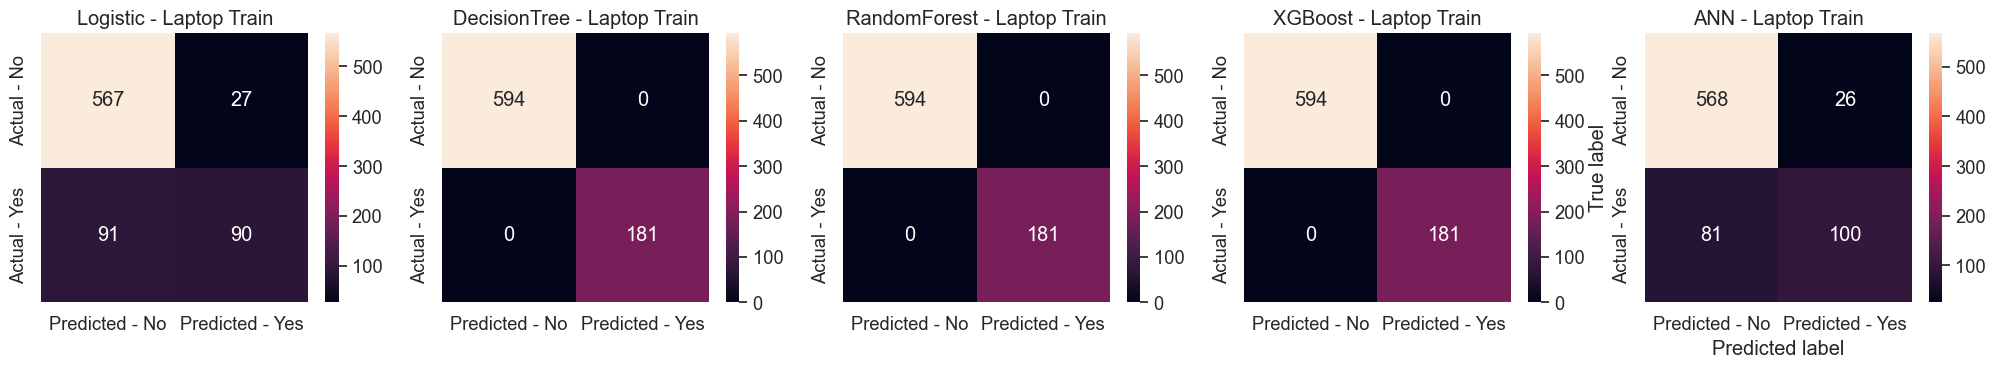

In [220]:
#Laptop train data prediction

fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_lap, model_DT_lap, model_RF_lap, model_XGB_lap, model_ANN_lap]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_laptop_train_scaled)
    cm=metrics.confusion_matrix( y_laptop_train, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m+" - Laptop Train")

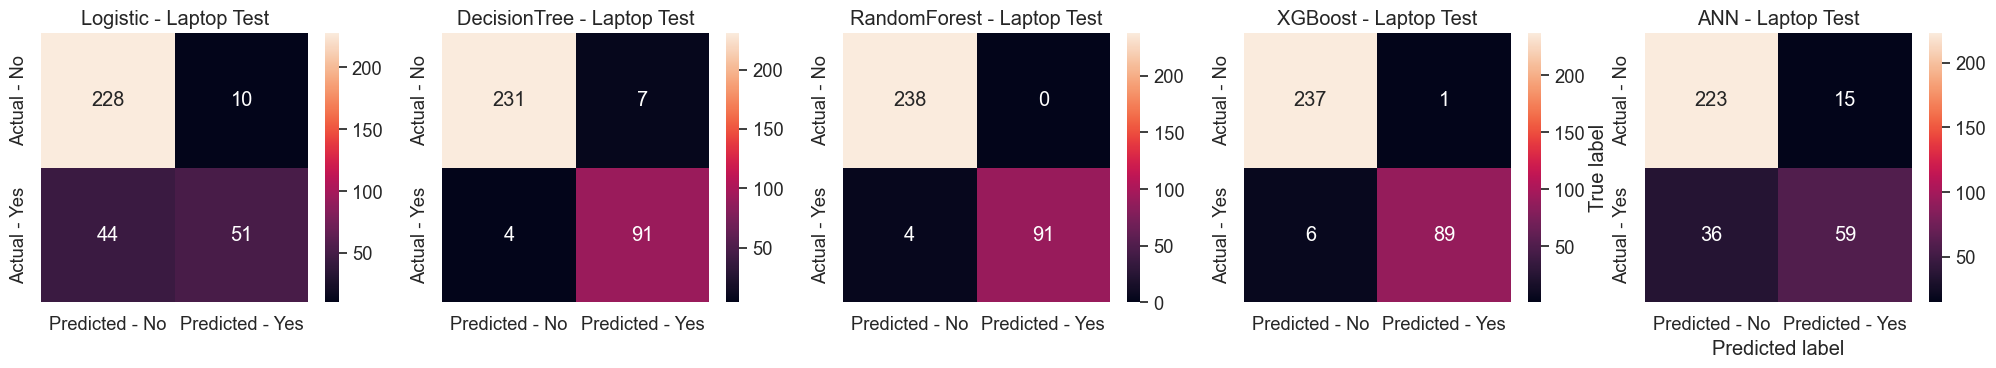

In [221]:
#Laptop test data prediction

fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_lap, model_DT_lap, model_RF_lap, model_XGB_lap, model_ANN_lap]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_laptop_test_scaled)
    cm=metrics.confusion_matrix( y_laptop_test, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Laptop Test")

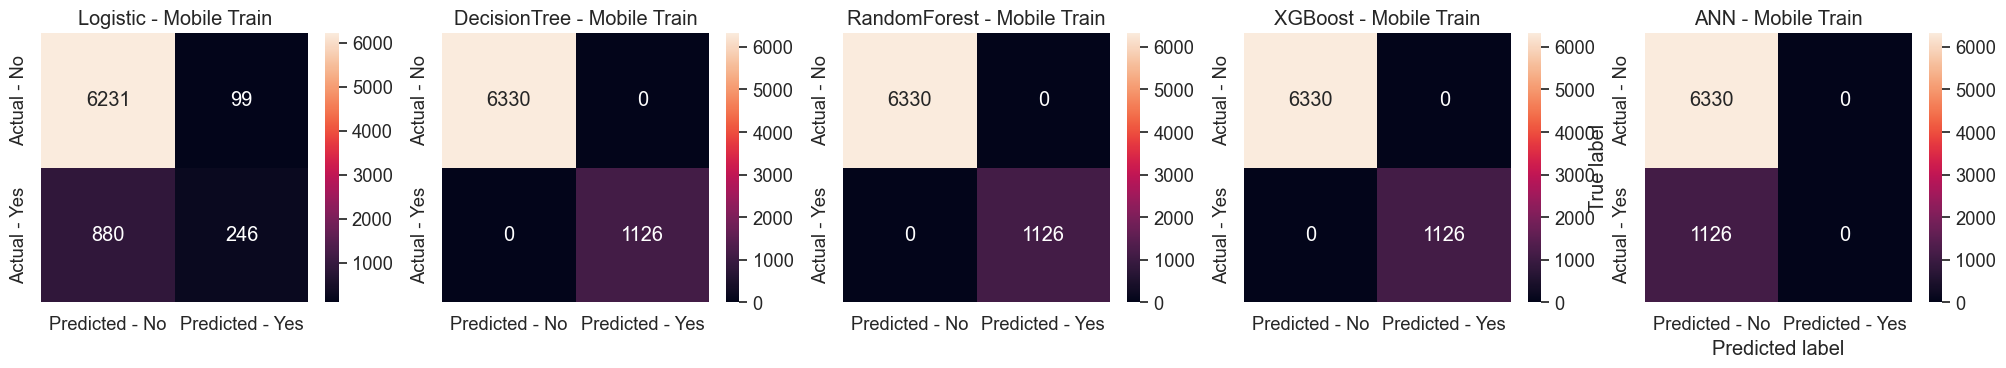

In [222]:
#mobile train data prediction

fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_mobile, model_DT_mobile, model_RF_mobile, model_XGB_mobile, model_ANN_mobile]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_mobile_train_scaled)
    cm=metrics.confusion_matrix( y_mobile_train, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Mobile Train")

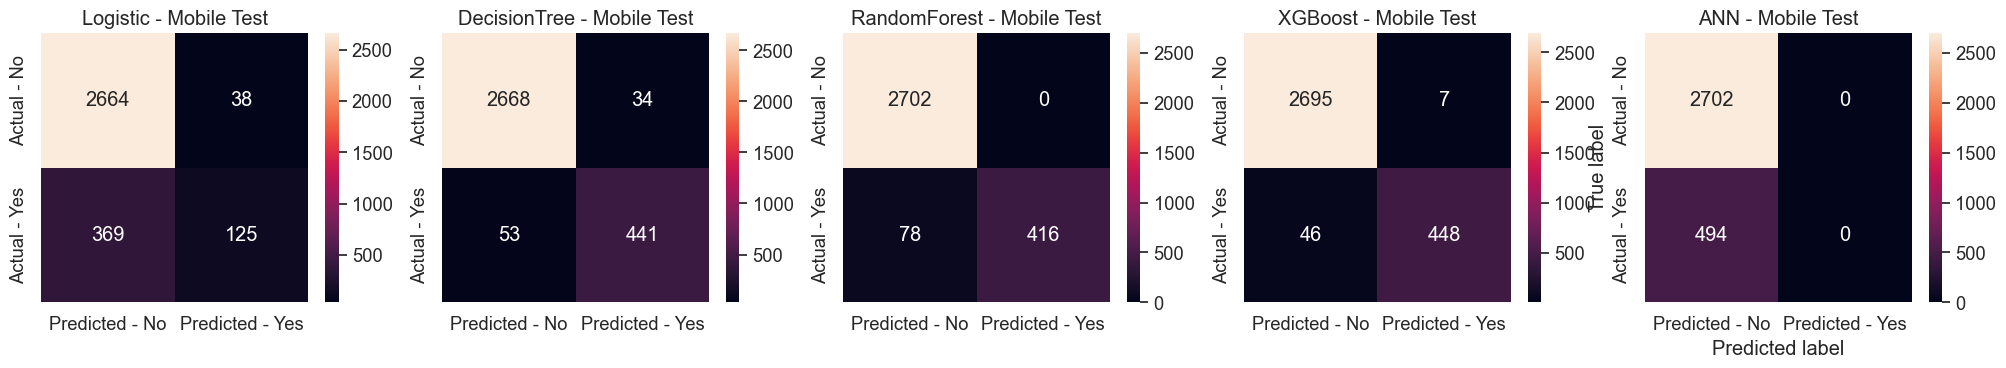

In [223]:
#mobile test data prediction

fig,axes = plt.subplots(1,5,figsize = (25,3.5))
models = [model_logistic_mobile, model_DT_mobile, model_RF_mobile, model_XGB_mobile, model_ANN_mobile]
model_name = ['Logistic','DecisionTree','RandomForest','XGBoost','ANN']
for i,a,m in zip(models,axes,model_name):
    y_predict = i.predict(X_mobile_test_scaled)
    cm=metrics.confusion_matrix( y_mobile_test, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = ["Actual - No","Actual - Yes"],
                  columns = ['Predicted - No','Predicted - Yes'])
    g = sns.heatmap(df_cm, annot=True,fmt='',ax=a)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    g.set_title(m + " - Mobile Test")

<AxesSubplot:title={'center':'Performance Metrics - Laptop Data'}, xlabel='Model'>

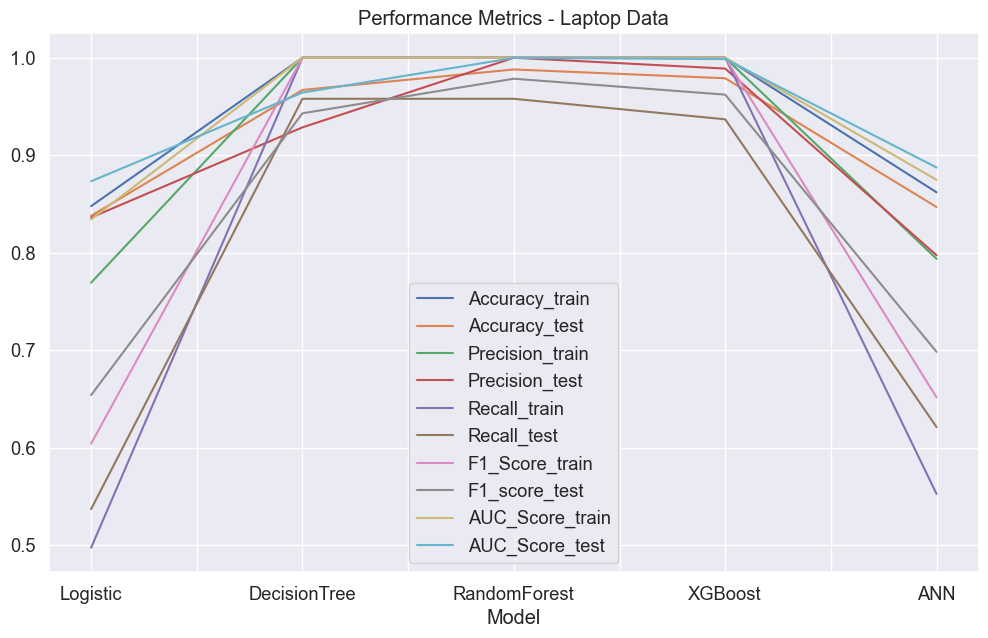

In [225]:
metric_laptop.plot(x='Model',kind='line',stacked=False,figsize=(12,7),title="Performance Metrics - Laptop Data")

<AxesSubplot:title={'center':'Performance Metrics - Mobile Data'}, xlabel='Model'>

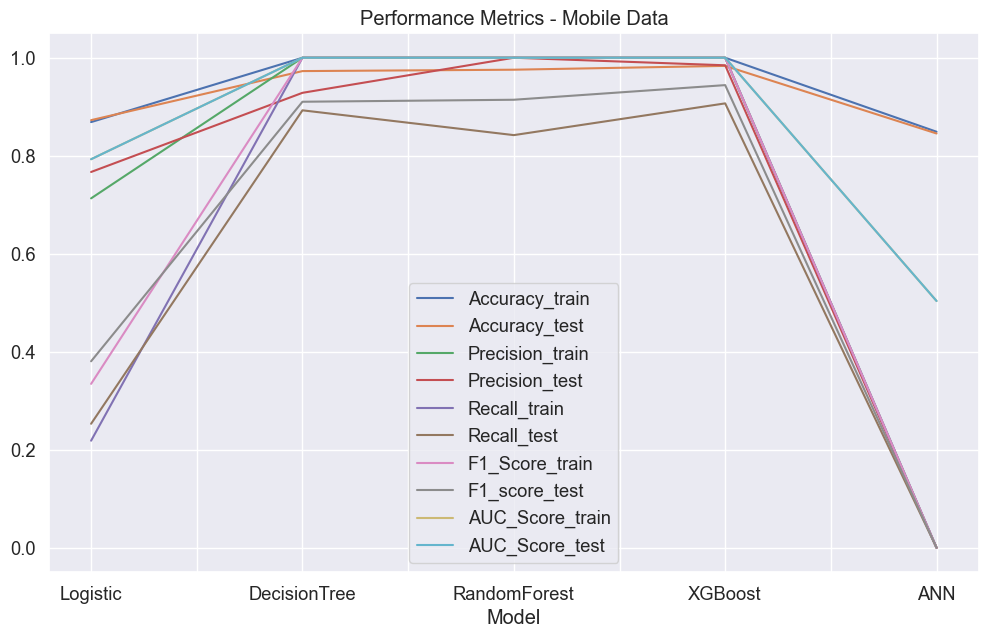

In [224]:
metric_mobile.plot(x='Model',kind='line',stacked=False,figsize=(12,7),title="Performance Metrics - Mobile Data")

### Hyperparameter Tuning - Laptop

Tune the hyperparameter which can prune the trees and avoid overfitting and reduce the complexity of the cost function in non-tree based models.

In [226]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [227]:
#XGBoost Classifier
param_xgb = {
    'n_estimators':[65,70,75],
    'max_depth':[1,2,3],
    'min_child_weight':[2,3,5],
    'learning_rate':[0.01,0.1,0.2],
    'subsample':[0.5],
    'gamma':[0.3]
    
}
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(),param_grid=param_xgb,cv=3)

In [228]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [229]:
gsearch_xgb.fit(X_laptop_train_scaled,y_laptop_train)
gsearch_xgb.best_params_

{'gamma': 0.3,
 'learning_rate': 0.2,
 'max_depth': 3,
 'min_child_weight': 2,
 'n_estimators': 75,
 'subsample': 0.5}

In [230]:
tuned_Xgb_lap = gsearch_xgb.best_estimator_
tuned_Xgb_lap.fit(X_laptop_train_scaled,y_laptop_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=75, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [231]:
print('Train Accuracy of the XGBoost model: ',tuned_Xgb_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the XGBoost model: ',tuned_Xgb_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_Xgb_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_Xgb_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the XGBoost model:  0.9793548387096774
Test Accuracy of the XGBoost model:  0.924924924924925

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       594
           1       0.99      0.92      0.95       181

    accuracy                           0.98       775
   macro avg       0.98      0.96      0.97       775
weighted avg       0.98      0.98      0.98       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       238
           1       0.93      0.80      0.86        95

    accuracy                           0.92       333
   macro avg       0.93      0.89      0.90       333
weighted avg       0.93      0.92      0.92       333



In [233]:
#Logistic Regression
param_logistic = {
    'solver':['newton-cg','lbfgs','liblinear'],
    'penalty':['l2'],
    'C':[100,10,1,0.1,0.001]
}
gsearch_logistic = GridSearchCV(estimator=LogisticRegression(),param_grid=param_logistic,cv=5)

In [234]:
gsearch_logistic.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_logistic.best_params_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [235]:
tuned_logi_lap = gsearch_logistic.best_estimator_
tuned_logi_lap.fit(X_laptop_train_scaled,y_laptop_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [236]:
print('Train Accuracy of the Tuned Logistics Regression model: ',tuned_logi_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Logistics Regression model: ',tuned_logi_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_logi_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_logi_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Logistics Regression model:  0.8503225806451613
Test Accuracy of the Tuned Logistics Regression model:  0.8288288288288288

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       594
           1       0.82      0.46      0.59       181

    accuracy                           0.85       775
   macro avg       0.84      0.71      0.75       775
weighted avg       0.85      0.85      0.83       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       238
           1       0.85      0.48      0.62        95

    accuracy                           0.83       333
   macro avg       0.84      0.73      0.75       333
weighted avg       0.83      0.83      0.81       333



In [246]:
#Decision Tree
param_dt = {
            "max_depth": [5],
            "max_features": [15,17,19],
            "min_samples_leaf": [15,20,25],
            "min_samples_split": [45,60,75],
            "criterion": ["gini", "entropy"]
}
gsearch_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_dt,cv=3)

In [247]:
gsearch_dt.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_dt.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 17, 'min_samples_leaf': 15, 'min_samples_split': 45}


In [248]:
tuned_dt_lap = gsearch_dt.best_estimator_
tuned_dt_lap.fit(X_laptop_train_scaled,y_laptop_train)

DecisionTreeClassifier(max_depth=5, max_features=17, min_samples_leaf=15,
                       min_samples_split=45)

In [249]:
print('Train Accuracy of the Tuned Decision Tree model: ',tuned_dt_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Decision Tree model: ',tuned_dt_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_dt_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_dt_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Decision Tree model:  0.8748387096774194
Test Accuracy of the Tuned Decision Tree model:  0.8558558558558559

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       594
           1       0.78      0.65      0.71       181

    accuracy                           0.87       775
   macro avg       0.84      0.80      0.81       775
weighted avg       0.87      0.87      0.87       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       238
           1       0.80      0.66      0.72        95

    accuracy                           0.86       333
   macro avg       0.84      0.80      0.81       333
weighted avg       0.85      0.86      0.85       333



In [250]:
#Random Forest
param_rf = {
            "n_estimators":[100],
            "max_depth": [6,7,8],
            "max_features": [15,17,19],
            "min_samples_leaf": [5,10,15],
            "min_samples_split": [10,20,45],
            "criterion": ["gini", "entropy"]
}
gsearch_RF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_rf,cv=3)


In [251]:
gsearch_RF.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [252]:
tuned_RF_lap = gsearch_RF.best_estimator_
tuned_RF_lap.fit(X_laptop_train_scaled,y_laptop_train)

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=15,
                       min_samples_leaf=5, min_samples_split=10)

In [253]:
print('Train Accuracy of the Tuned Random Forest model: ',tuned_RF_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned Random Forest model: ',tuned_RF_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_RF_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_RF_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned Random Forest model:  0.9767741935483871
Test Accuracy of the Tuned Random Forest model:  0.93993993993994

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       594
           1       1.00      0.90      0.95       181

    accuracy                           0.98       775
   macro avg       0.99      0.95      0.97       775
weighted avg       0.98      0.98      0.98       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       238
           1       0.96      0.82      0.89        95

    accuracy                           0.94       333
   macro avg       0.95      0.90      0.92       333
weighted avg       0.94      0.94      0.94       333



In [262]:
#ANN
param_ann = {
    "hidden_layer_sizes":[100,200],
    "activation":['logistic','relu'],
    "solver":['sgd','adam'],
    "tol":[0.1,0.01],
    "max_iter":[1000]
}
gsearch_ann = GridSearchCV(estimator=MLPClassifier(),param_grid=param_ann,cv=3)

In [263]:
gsearch_ann.fit(X_laptop_train_scaled,y_laptop_train)
print(gsearch_ann.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 200, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


In [264]:
tuned_ANN_lap = gsearch_ann.best_estimator_
tuned_ANN_lap.fit(X_laptop_train_scaled,y_laptop_train)

MLPClassifier(hidden_layer_sizes=200, max_iter=1000, tol=0.01)

In [265]:
print('Train Accuracy of the Tuned ANN model: ',tuned_ANN_lap.score(X_laptop_train_scaled,y_laptop_train))
print('Test Accuracy of the Tuned ANN model: ',tuned_ANN_lap.score(X_laptop_test_scaled,y_laptop_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_laptop_train,tuned_ANN_lap.predict(X_laptop_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_laptop_test,tuned_ANN_lap.predict(X_laptop_test_scaled)))

Train Accuracy of the Tuned ANN model:  0.8451612903225807
Test Accuracy of the Tuned ANN model:  0.8408408408408409

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       594
           1       0.84      0.41      0.56       181

    accuracy                           0.85       775
   macro avg       0.84      0.70      0.73       775
weighted avg       0.84      0.85      0.82       775


Classification Report TEST
              precision    recall  f1-score   support

           0       0.83      0.98      0.90       238
           1       0.90      0.49      0.64        95

    accuracy                           0.84       333
   macro avg       0.87      0.74      0.77       333
weighted avg       0.85      0.84      0.82       333



### Performance Metric after Hyperparameter Tuning - Laptop

In [266]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
models = [tuned_logi_lap,tuned_dt_lap,tuned_RF_lap,tuned_Xgb_lap,tuned_ANN_lap]
mod = ['Tuned_Logistic','Tuned_DecisionTree','Tune_RandomForest','Tuned_XGBoost','Tuned_ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
auc_train =[]
auc_test =[]

for i in models:
    acc_train.append(accuracy_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    pre_train.append(precision_score(y_laptop_train,i.predict(X_laptop_train_scaled),zero_division=0))
    rec_train.append(recall_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    f1_train.append(f1_score(y_laptop_train,i.predict(X_laptop_train_scaled)))
    auc_train.append(roc_auc_score(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1]))
    
    acc_test.append(accuracy_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    pre_test.append(precision_score(y_laptop_test,i.predict(X_laptop_test_scaled),zero_division=0))
    rec_test.append(recall_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    f1_test.append(f1_score(y_laptop_test,i.predict(X_laptop_test_scaled)))
    auc_test.append(roc_auc_score(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1]))
       
best_metric_lap = pd.DataFrame({'Model':mod
                                    ,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test
                                    ,'auc_train':auc_train, 'auc_test':auc_test}) 
best_metric_lap

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Tuned_Logistic        0.850323       0.828829         0.821782   
1  Tuned_DecisionTree        0.874839       0.855856         0.776316   
2   Tune_RandomForest        0.976774       0.939940         1.000000   
3       Tuned_XGBoost        0.979355       0.924925         0.994012   
4           Tuned_ANN        0.845161       0.840841         0.842697   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.851852      0.458564     0.484211        0.588652       0.617450   
1        0.797468      0.651934     0.663158        0.708709       0.724138   
2        0.962963      0.900552     0.821053        0.947674       0.886364   
3        0.926829      0.917127     0.800000        0.954023       0.858757   
4        0.903846      0.414365     0.494737        0.555556       0.639456   

   auc_train  auc_test  
0   0.830031  0.876426  
1   0.900232  0.917382  
2   0.999572  0.990668  
3   0.998493  0.978328  
4   0.845927  0.873198

### Hyperparameter Tuning - Mobile

In [267]:
#XGBoost Classifier
param_xgb = {
    'n_estimators':[70,75,80],
    'max_depth':[3,4,5],
    'min_child_weight':[1,2,3],
    'learning_rate':[0.1,0.2,0.3],
    'subsample':[0.5],
    'gamma':[0.2,0.3]
    
}
gsearch_xgb = GridSearchCV(estimator = XGBClassifier(),param_grid=param_xgb,cv=3)

In [268]:
gsearch_xgb.fit(X_mobile_train_scaled,y_mobile_train)
gsearch_xgb.best_params_

{'gamma': 0.2,
 'learning_rate': 0.3,
 'max_depth': 5,
 'min_child_weight': 1,
 'n_estimators': 80,
 'subsample': 0.5}

In [269]:
tuned_Xgb_mob = gsearch_xgb.best_estimator_
tuned_Xgb_mob.fit(X_mobile_train_scaled,y_mobile_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [270]:
print('Train Accuracy of the XGBoost model: ',tuned_Xgb_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the XGBoost model: ',tuned_Xgb_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_Xgb_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_Xgb_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the XGBoost model:  0.994098712446352
Test Accuracy of the XGBoost model:  0.9621401752190237

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6330
           1       1.00      0.96      0.98      1126

    accuracy                           0.99      7456
   macro avg       1.00      0.98      0.99      7456
weighted avg       0.99      0.99      0.99      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2702
           1       0.97      0.78      0.86       494

    accuracy                           0.96      3196
   macro avg       0.96      0.89      0.92      3196
weighted avg       0.96      0.96      0.96      3196



In [271]:
#Logistic Regression
param_logistic = {
    'solver':['newton-cg','lbfgs','liblinear'],
    'penalty':['l2'],
    'C':[100,10,1,0.1,0.001]
}
gsearch_logistic = GridSearchCV(estimator=LogisticRegression(),param_grid=param_logistic,cv=5)

In [272]:
gsearch_logistic.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_logistic.best_params_)

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [273]:
tuned_logi_mob = gsearch_logistic.best_estimator_
tuned_logi_mob.fit(X_mobile_train_scaled,y_mobile_train)

LogisticRegression(C=10, solver='liblinear')

In [274]:
print('Train Accuracy of the Tuned Logistics Regression model: ',tuned_logi_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Logistics Regression model: ',tuned_logi_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_logi_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_logi_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Logistics Regression model:  0.8693669527896996
Test Accuracy of the Tuned Logistics Regression model:  0.8723404255319149

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6330
           1       0.71      0.22      0.34      1126

    accuracy                           0.87      7456
   macro avg       0.80      0.60      0.63      7456
weighted avg       0.85      0.87      0.84      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2702
           1       0.75      0.26      0.39       494

    accuracy                           0.87      3196
   macro avg       0.81      0.62      0.66      3196
weighted avg       0.86      0.87      0.85      3196



In [275]:
#Decision Tree
param_dt = {
            "max_depth": [5],
            "max_features": [15,17,19],
            "min_samples_leaf": [15,20,25],
            "min_samples_split": [45,60,75],
            "criterion": ["gini", "entropy"]
}
gsearch_dt = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_dt,cv=3)

In [276]:
gsearch_dt.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_dt.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 15, 'min_samples_leaf': 25, 'min_samples_split': 45}


In [277]:
tuned_dt_mob = gsearch_dt.best_estimator_
tuned_dt_mob.fit(X_mobile_train_scaled,y_mobile_train)

DecisionTreeClassifier(max_depth=5, max_features=15, min_samples_leaf=25,
                       min_samples_split=45)

In [278]:
print('Train Accuracy of the Tuned Decision Tree model: ',tuned_dt_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Decision Tree model: ',tuned_dt_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_dt_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_dt_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Decision Tree model:  0.875
Test Accuracy of the Tuned Decision Tree model:  0.8798498122653317

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6330
           1       0.68      0.33      0.44      1126

    accuracy                           0.88      7456
   macro avg       0.78      0.65      0.69      7456
weighted avg       0.86      0.88      0.86      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2702
           1       0.74      0.34      0.47       494

    accuracy                           0.88      3196
   macro avg       0.82      0.66      0.70      3196
weighted avg       0.87      0.88      0.86      3196



In [284]:
#Random Forest
param_rf = {
            "n_estimators":[50],
            "max_depth": [7,9],
            "max_features": [17,21],
            "min_samples_leaf": [2,5,10],
            "min_samples_split": [4,10,20],
            "criterion": ["gini", "entropy"]
}
gsearch_RF = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_rf,cv=3)

In [285]:
gsearch_RF.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_RF.best_params_)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 21, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 50}


In [286]:
tuned_RF_mob = gsearch_RF.best_estimator_
tuned_RF_mob.fit(X_mobile_train_scaled,y_mobile_train)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=21,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=50)

In [287]:
print('Train Accuracy of the Tuned Random Forest model: ',tuned_RF_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned Random Forest model: ',tuned_RF_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_RF_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_RF_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned Random Forest model:  0.960568669527897
Test Accuracy of the Tuned Random Forest model:  0.9386733416770964

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6330
           1       1.00      0.74      0.85      1126

    accuracy                           0.96      7456
   macro avg       0.98      0.87      0.91      7456
weighted avg       0.96      0.96      0.96      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2702
           1       0.99      0.61      0.76       494

    accuracy                           0.94      3196
   macro avg       0.96      0.80      0.86      3196
weighted avg       0.94      0.94      0.93      3196



In [288]:
#ANN
param_ann = {
    "hidden_layer_sizes":[100,200],
    "activation":['logistic','relu'],
    "solver":['sgd','adam'],
    "tol":[0.1,0.01],
    "max_iter":[1000]
}
gsearch_ann = GridSearchCV(estimator=MLPClassifier(),param_grid=param_ann,cv=3)

In [289]:
gsearch_ann.fit(X_mobile_train_scaled,y_mobile_train)
print(gsearch_ann.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 100, 'max_iter': 1000, 'solver': 'adam', 'tol': 0.01}


In [290]:
tuned_ANN_mob = gsearch_ann.best_estimator_
tuned_ANN_mob.fit(X_mobile_train_scaled,y_mobile_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, tol=0.01)

In [291]:
print('Train Accuracy of the Tuned ANN model: ',tuned_ANN_mob.score(X_mobile_train_scaled,y_mobile_train))
print('Test Accuracy of the Tuned ANN model: ',tuned_ANN_mob.score(X_mobile_test_scaled,y_mobile_test))
print()

print('Classification Report TRAIN')
print()
print(metrics.classification_report(y_mobile_train,tuned_ANN_mob.predict(X_mobile_train_scaled)))
print()
print('Classification Report TEST')
print(metrics.classification_report(y_mobile_test,tuned_ANN_mob.predict(X_mobile_test_scaled)))

Train Accuracy of the Tuned ANN model:  0.8775482832618026
Test Accuracy of the Tuned ANN model:  0.8735919899874843

Classification Report TRAIN

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      6330
           1       0.73      0.30      0.42      1126

    accuracy                           0.88      7456
   macro avg       0.81      0.64      0.68      7456
weighted avg       0.86      0.88      0.85      7456


Classification Report TEST
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2702
           1       0.71      0.31      0.43       494

    accuracy                           0.87      3196
   macro avg       0.80      0.64      0.68      3196
weighted avg       0.86      0.87      0.85      3196



### Performance Metric after Hyperparameter Tuning - Mobile

In [292]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
models = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Tuned_Logistic','Tuned_DecisionTree','Tune_RandomForest','Tuned_XGBoost','Tuned_ANN']
acc_train=[]
pre_train=[]
rec_train=[]
f1_train=[]
acc_test=[]
pre_test=[]
rec_test=[]
f1_test=[]
auc_train =[]
auc_test =[]

for i in models:
    acc_train.append(accuracy_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    pre_train.append(precision_score(y_mobile_train,i.predict(X_mobile_train_scaled),zero_division=0))
    rec_train.append(recall_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    f1_train.append(f1_score(y_mobile_train,i.predict(X_mobile_train_scaled)))
    auc_train.append(roc_auc_score(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1]))
    
    acc_test.append(accuracy_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    pre_test.append(precision_score(y_mobile_test,i.predict(X_mobile_test_scaled),zero_division=0))
    rec_test.append(recall_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    f1_test.append(f1_score(y_mobile_test,i.predict(X_mobile_test_scaled)))
    auc_test.append(roc_auc_score(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1]))
       
best_metric_mob = pd.DataFrame({'Model':mod
                                    ,'Accuracy_train':acc_train,'Accuracy_test':acc_test
                                   ,'Precision_train':pre_train, 'Precision_test':pre_test
                                   ,'Recall_train':rec_train, 'Recall_test': rec_test
                                   ,'F1_Score_train':f1_train,'F1_score_test':f1_test
                                    ,'auc_train':auc_train, 'auc_test':auc_test}) 
best_metric_mob

Model  Accuracy_train  Accuracy_test  Precision_train  \
0      Tuned_Logistic        0.869367       0.872340         0.714689   
1  Tuned_DecisionTree        0.875000       0.879850         0.677007   
2   Tune_RandomForest        0.960569       0.938673         0.998801   
3       Tuned_XGBoost        0.994099       0.962140         0.998158   
4           Tuned_ANN        0.877548       0.873592         0.734066   

   Precision_test  Recall_train  Recall_test  F1_Score_train  F1_score_test  \
0        0.750000      0.224689     0.261134        0.341892       0.387387   
1        0.741228      0.329485     0.342105        0.443250       0.468144   
2        0.986928      0.739787     0.611336        0.850000       0.755000   
3        0.967419      0.962700     0.781377        0.980108       0.864502   
4        0.706422      0.296625     0.311741        0.422517       0.432584   

   auc_train  auc_test  
0   0.793334  0.800955  
1   0.810145  0.804845  
2   0.997979  0.985175  
3   0.999734  0.988815  
4   0.828542  0.822636

In [293]:
#inverted best metric

l = best_metric_lap.T
l.columns = best_metric_lap['Model']
l = l.drop('Model')
l

Model           Tuned_Logistic Tuned_DecisionTree Tune_RandomForest  \
Accuracy_train        0.850323           0.874839          0.976774   
Accuracy_test         0.828829           0.855856           0.93994   
Precision_train       0.821782           0.776316               1.0   
Precision_test        0.851852           0.797468          0.962963   
Recall_train          0.458564           0.651934          0.900552   
Recall_test           0.484211           0.663158          0.821053   
F1_Score_train        0.588652           0.708709          0.947674   
F1_score_test          0.61745           0.724138          0.886364   
auc_train             0.830031           0.900232          0.999572   
auc_test              0.876426           0.917382          0.990668   

Model           Tuned_XGBoost Tuned_ANN  
Accuracy_train       0.979355  0.845161  
Accuracy_test        0.924925  0.840841  
Precision_train      0.994012  0.842697  
Precision_test       0.926829  0.903846  
Recall_train         0.917127  0.414365  
Recall_test               0.8  0.494737  
F1_Score_train       0.954023  0.555556  
F1_score_test        0.858757  0.639456  
auc_train            0.998493  0.845927  
auc_test             0.978328  0.873198

In [294]:
m = best_metric_mob.T
m.columns = best_metric_mob['Model']
m = m.drop('Model')
m

Model           Tuned_Logistic Tuned_DecisionTree Tune_RandomForest  \
Accuracy_train        0.869367              0.875          0.960569   
Accuracy_test          0.87234            0.87985          0.938673   
Precision_train       0.714689           0.677007          0.998801   
Precision_test            0.75           0.741228          0.986928   
Recall_train          0.224689           0.329485          0.739787   
Recall_test           0.261134           0.342105          0.611336   
F1_Score_train        0.341892            0.44325              0.85   
F1_score_test         0.387387           0.468144             0.755   
auc_train             0.793334           0.810145          0.997979   
auc_test              0.800955           0.804845          0.985175   

Model           Tuned_XGBoost Tuned_ANN  
Accuracy_train       0.994099  0.877548  
Accuracy_test         0.96214  0.873592  
Precision_train      0.998158  0.734066  
Precision_test       0.967419  0.706422  
Recall_train           0.9627  0.296625  
Recall_test          0.781377  0.311741  
F1_Score_train       0.980108  0.422517  
F1_score_test        0.864502  0.432584  
auc_train            0.999734  0.828542  
auc_test             0.988815  0.822636

### Cut Off Analysis

To find the optimal threshold of probability above which the prediction is consider as positive class of prediction. We shall find such optimal threshold to achieve the maximum accuracy and Recall trade-off.

### Laptop Data

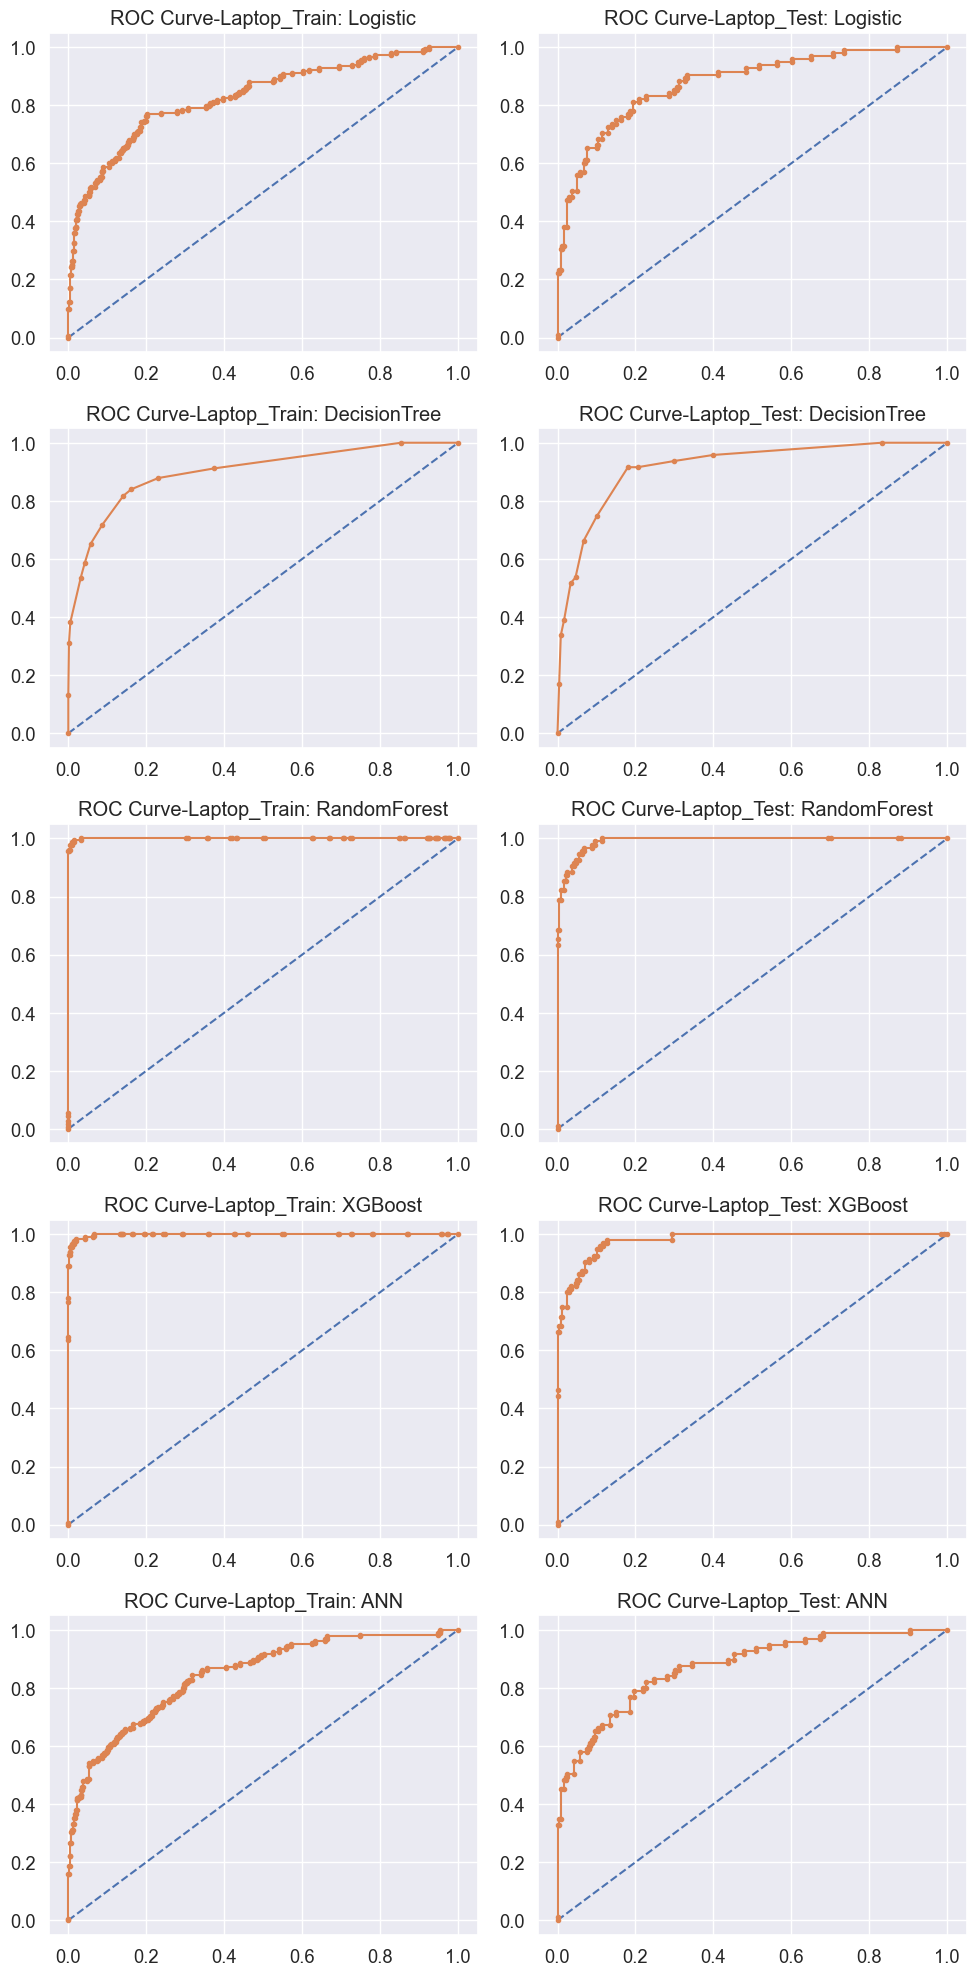

In [376]:
#ROC curve for Laptop Train and Test data.

fig, axes = plt.subplots(5,2,figsize=(10,20))
l = [tuned_logi_lap,tuned_dt_lap,tuned_RF_lap,tuned_Xgb_lap,tuned_ANN_lap]
mod = ['Logistic', 'DecisionTree', 'RandomForest', 'XGBoost', 'ANN']
for i,j,k in zip(l,axes,mod):
    fpr_train,tpr_train, thershold_train = metrics.roc_curve(y_laptop_train,i.predict_proba(X_laptop_train_scaled)[:,1])
    j[0].plot([0,1],[0,1],linestyle="--")
    j[0].plot(fpr_train,tpr_train,marker=".")
    j[0].set_title('ROC Curve-Laptop_Train: '+k)
    
    fpr_test,tpr_test, thershold_test = metrics.roc_curve(y_laptop_test,i.predict_proba(X_laptop_test_scaled)[:,1])
    j[1].plot([0,1],[0,1],linestyle="--")
    j[1].plot(fpr_test,tpr_test,marker=".")
    j[1].set_title('ROC Curve-Laptop_Test: '+k)
    plt.tight_layout()
    

In [297]:
PP_test_model_XGB_laptop = tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
rec = []
for i in cut_off:
    pred = np.where(PP_test_model_XGB_laptop>i,1,0)
    acc.append(accuracy_score(y_laptop_test,pred))
    rec.append(recall_score(y_laptop_test,pred,zero_division = 0))
cut_off_analysis_laptop = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Recall':rec})    
cut_off_analysis_laptop

Cut_off  Accuracy    Recall
0      0.000  0.285285  1.000000
1      0.005  0.363363  1.000000
2      0.010  0.453453  1.000000
3      0.015  0.504505  1.000000
4      0.020  0.540541  1.000000
..       ...       ...       ...
195    0.975  0.732733  0.063158
196    0.980  0.732733  0.063158
197    0.985  0.732733  0.063158
198    0.990  0.720721  0.021053
199    0.995  0.714715  0.000000

[200 rows x 3 columns]

In [298]:
(pd.DataFrame(data=tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)).sort_values(by=1,ascending=False))

0         1
124  0.006194  0.993806
125  0.008932  0.991068
190  0.010117  0.989883
289  0.010314  0.989686
69   0.010430  0.989570
..        ...       ...
235  0.998557  0.001443
140  0.998637  0.001363
271  0.998637  0.001363
242  0.998814  0.001186
83   0.999137  0.000863

[333 rows x 2 columns]

Text(0.5, 1.0, 'Cut-off Analysis - Laptop')

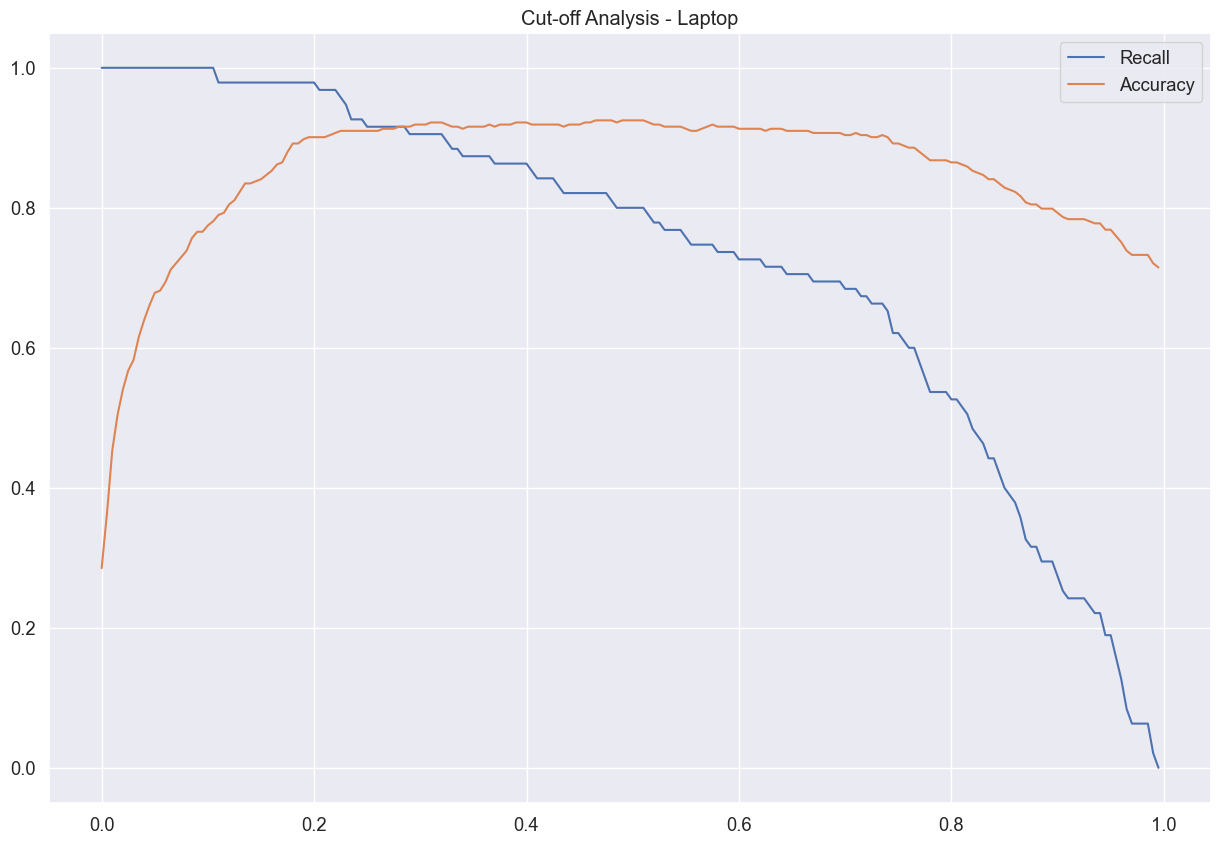

In [379]:
fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis_laptop['Recall'],label='Recall')
plt.plot(cut_off,cut_off_analysis_laptop['Accuracy'],label='Accuracy')
plt.legend()
plt.title('Cut-off Analysis - Laptop')

In [300]:
cut_off_analysis_laptop.sort_values(by=['Accuracy','Recall'],ascending=False).head()

Cut_off  Accuracy    Recall
93    0.465  0.924925  0.821053
94    0.470  0.924925  0.821053
95    0.475  0.924925  0.821053
96    0.480  0.924925  0.810526
98    0.490  0.924925  0.800000

### Mobile Data

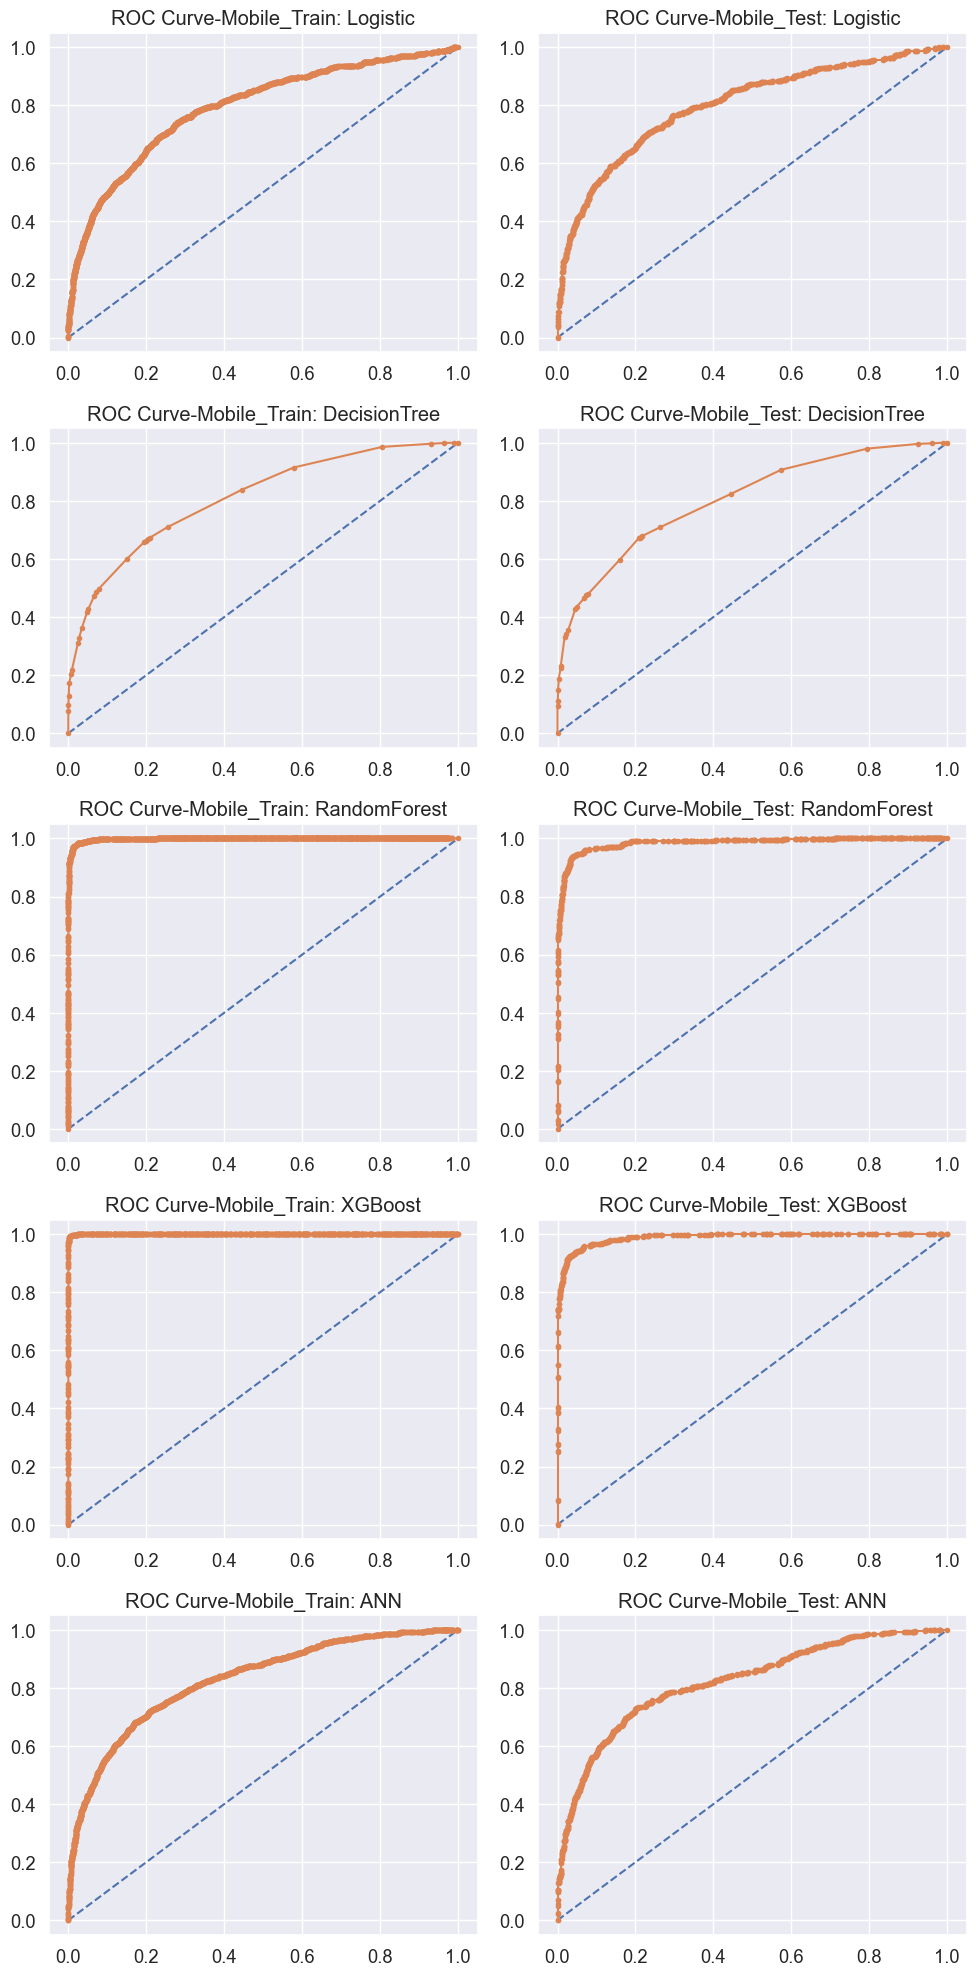

In [377]:
fig, axes = plt.subplots(5,2,figsize=(10,20))
m = [tuned_logi_mob,tuned_dt_mob,tuned_RF_mob,tuned_Xgb_mob,tuned_ANN_mob]
mod = ['Logistic', 'DecisionTree', 'RandomForest', 'XGBoost', 'ANN']
for i,j,k in zip(m,axes,mod):
    fpr_train,tpr_train, thershold_train = metrics.roc_curve(y_mobile_train,i.predict_proba(X_mobile_train_scaled)[:,1])
    j[0].plot([0,1],[0,1],linestyle="--")
    j[0].plot(fpr_train,tpr_train,marker=".")
    j[0].set_title('ROC Curve-Mobile_Train: '+k)
    
    fpr_test,tpr_test, thershold_test = metrics.roc_curve(y_mobile_test,i.predict_proba(X_mobile_test_scaled)[:,1])
    j[1].plot([0,1],[0,1],linestyle="--")
    j[1].plot(fpr_test,tpr_test,marker=".")
    j[1].set_title('ROC Curve-Mobile_Test: '+k)
    plt.tight_layout()

In [302]:
PP_test_model_XGB_mobile = tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)[:,1]
cut_off = list(np.arange(0,1,0.005))
acc = []
rec = []
for i in cut_off:
    pred = np.where(PP_test_model_XGB_mobile>i,1,0)
    acc.append(accuracy_score(y_mobile_test,pred))
    rec.append(recall_score(y_mobile_test,pred,zero_division = 0))
cut_off_analysis_mobile = pd.DataFrame({'Cut_off':cut_off,'Accuracy':acc,'Recall':rec})    
cut_off_analysis_mobile

Cut_off  Accuracy    Recall
0      0.000  0.154568  1.000000
1      0.005  0.423342  1.000000
2      0.010  0.544743  1.000000
3      0.015  0.621402  1.000000
4      0.020  0.673655  0.997976
..       ...       ...       ...
195    0.975  0.864518  0.123482
196    0.980  0.861702  0.105263
197    0.985  0.857322  0.076923
198    0.990  0.854506  0.058704
199    0.995  0.848874  0.022267

[200 rows x 3 columns]

In [303]:
(pd.DataFrame(data=tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)).sort_values(by=1,ascending=False))

0         1
2423  0.001249  0.998751
1371  0.001392  0.998608
1254  0.001399  0.998601
1641  0.001475  0.998525
3107  0.001680  0.998320
...        ...       ...
2310  0.999907  0.000093
1036  0.999912  0.000088
2464  0.999922  0.000078
2090  0.999922  0.000078
1128  0.999940  0.000060

[3196 rows x 2 columns]

Text(0.5, 1.0, 'Cut-off Analysis - Mobile Device')

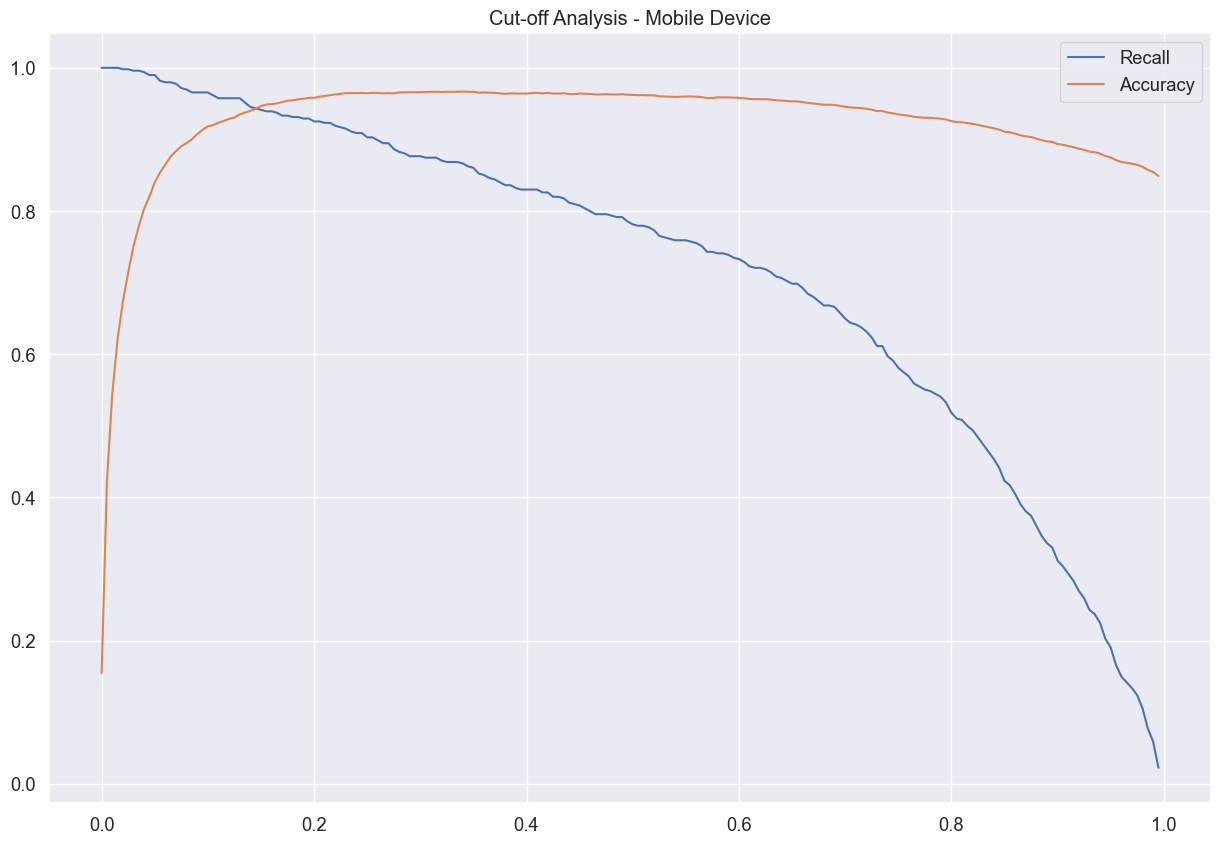

In [304]:
fig,axes = plt.subplots(figsize = (15,10))
plt.plot(cut_off,cut_off_analysis_mobile['Recall'],label='Recall')
plt.plot(cut_off,cut_off_analysis_mobile['Accuracy'],label='Accuracy')
plt.legend()
plt.title('Cut-off Analysis - Mobile Device')

In [378]:
cut_off_analysis_mobile.sort_values(by=['Accuracy','Recall'],ascending=False).head()

Cut_off  Accuracy    Recall
68    0.340  0.966834  0.866397
62    0.310  0.966521  0.874494
63    0.315  0.966521  0.874494
65    0.325  0.966521  0.868421
66    0.330  0.966521  0.868421

In [305]:
cut_off_analysis_mobile.sort_values(by=['Accuracy','Recall'],ascending=False).head().to_clipboard()

In [306]:
#Predicted probability for Mobile and Laptop dataset
pred_prob_laptop_model_XGB = tuned_Xgb_lap.predict_proba(X_laptop_test_scaled)[:,1]
pred_prob_mobile_model_XGB = tuned_Xgb_mob.predict_proba(X_mobile_test_scaled)[:,1]

In [311]:
#Laptop data

Taken_product_lap = []

for i in range(0,len(pred_prob_laptop_model_XGB)):
    if np.array(pred_prob_laptop_model_XGB)[i]> 0.46:
        a=1
    else:
        a=0
    Taken_product_lap.append(a)

In [312]:
predicted_laptop = X_laptop_test
predicted_laptop['Taken_product'] = Taken_product_lap

In [314]:
#Laptop data prediction
predicted_laptop[predicted_laptop['Taken_product']==1]

Yearly_avg_view_on_travel_page  \
9135                            335.0   
6408                            381.0   
10582                           246.0   
6446                            365.0   
11665                           254.0   
...                               ...   
11297                           226.0   
9772                            242.0   
10837                           320.0   
10904                           205.0   
9973                            148.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
9135                                    6532.0                 4   
6408                                   19676.0                 2   
10582                                  15578.0                 3   
6446                                   25177.0                 2   
11665                                   8376.0                 2   
...                                        ...               ...   
11297                                  11849.0                 1   
9772                                   37138.0                 3   
10837                                  32696.0                 3   
10904                                  31092.0                 2   
9973                                   19091.0                 2   

       Yearly_avg_comment_on_travel_page  \
9135                                57.0   
6408                                56.0   
10582                              103.0   
6446                                82.0   
11665                               68.0   
...                                  ...   
11297                               98.0   
9772                                67.0   
10837                               70.0   
10904                              106.0   
9973                                85.0   

       total_likes_on_outofstation_checkin_received  \
9135                                         2514.0   
6408                                         6801.0   
10582                                        2857.0   
6446                                         6402.0   
11665                                        2492.0   
...                                             ...   
11297                                        7607.0   
9772                                         2349.0   
10837                                        2814.0   
10904                                        2431.0   
9973                                         1628.0   

       week_since_last_outstation_checkin  following_company_page  \
9135                                    1                       0   
6408                                    3                       1   
10582                                   1                       0   
6446                                    4                       1   
11665                                   5                       1   
...                                   ...                     ...   
11297                                   1                       1   
9772                                    2                       1   
10837                                   8                       1   
10904                                   2                       1   
9973                                    3                       1   

       montly_avg_comment_on_company_page  working_flag  \
9135                                 29.0             0   
6408                                 17.0             0   
10582                                27.0             0   
6446                                 23.0             0   
11665                                26.0             0   
...                                   ...           ...   
11297                                21.0             0   
9772                                 25.0             0   
10837                                20.0             0   
10904                                32.0             0   
9973                         

### Feature importance in laptop data

In [317]:
feature_imp_lap = pd.DataFrame(model_XGB_lap.feature_importances_,columns=['Imp'],index=X_laptop.columns).sort_values(by='Imp',ascending=False)
feature_imp_lap[:15]

Imp
travelling_network_rating                0.123971
preferred_location_type_Other            0.112562
working_flag                             0.098513
Yearly_avg_comment_on_travel_page        0.074867
Yearly_avg_view_on_travel_page           0.068917
Daily_Avg_mins_spend_on_traveling_page   0.066865
preferred_location_type_Historical site  0.065634
total_likes_on_outstation_checkin_given  0.060111
Adult_flag                               0.055571
preferred_location_type_Big Cities       0.047443
montly_avg_comment_on_company_page       0.046921
Traveller                                0.046785
member_in_family                         0.038589
following_company_page                   0.038488
preferred_location_type_Trekking         0.023602

Text(0.5, 1.0, 'Feature Importance for Laptop Model')

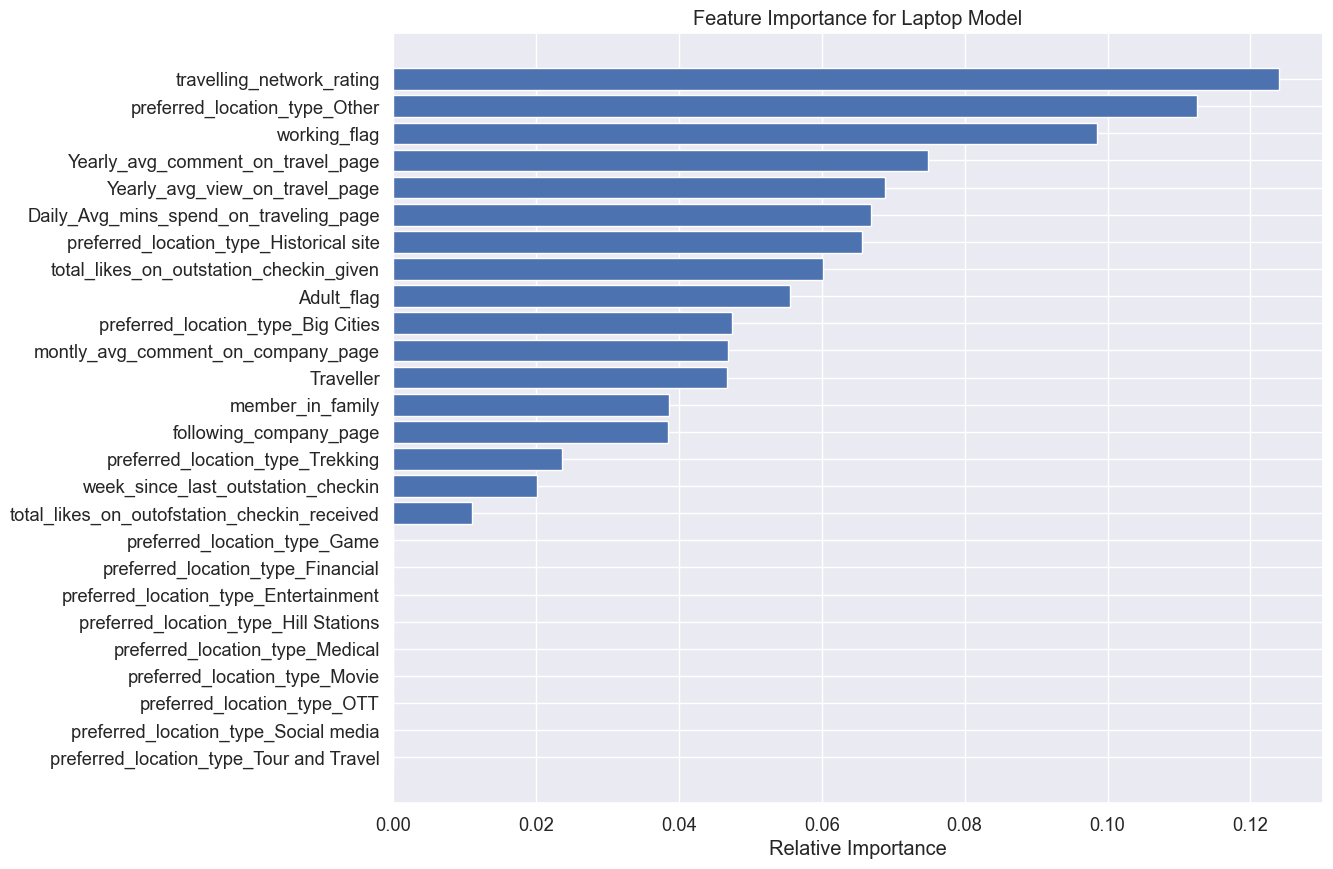

In [318]:
#visual representation of importance

importance = model_XGB_lap.feature_importances_
indices = np.argsort(importance)
feature_names = X_laptop.columns

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)),importance[indices],align='center')
plt.yticks(range(len(indices)),[feature_names[i]for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Laptop Model')

In [307]:
#mobile data

Taken_product_mob = []

for i in range(0,len(pred_prob_mobile_model_XGB)):
    if np.array(pred_prob_mobile_model_XGB)[i]> 0.35:
        a=1
    else:
        a=0
    Taken_product_mob.append(a)

In [308]:
predicted_mobile = X_mobile_test
predicted_mobile['Taken_product'] = Taken_product_mob

In [310]:
#predicted mobile data

predicted_mobile[predicted_mobile['Taken_product']==1]

Yearly_avg_view_on_travel_page  \
575                             405.0   
6525                            229.0   
1806                            217.0   
1326                            240.0   
2942                            271.0   
...                               ...   
6144                            213.0   
5390                            234.0   
10216                           403.0   
3067                            143.0   
2656                            262.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
575                                    28076.0                 4   
6525                                   11941.0                 3   
1806                                   11130.0                 4   
1326                                   14490.0                 4   
2942                                   48099.0                 2   
...                                        ...               ...   
6144                                   18521.0                 4   
5390                                   24643.0                 3   
10216                                  40929.0                 4   
3067                                   18525.0                 1   
2656                                   30800.0                 4   

       Yearly_avg_comment_on_travel_page  \
575                                 95.0   
6525                                55.0   
1806                                77.0   
1326                                82.0   
2942                               105.0   
...                                  ...   
6144                                91.0   
5390                               103.0   
10216                               85.0   
3067                                64.0   
2656                                36.0   

       total_likes_on_outofstation_checkin_received  \
575                                          5485.0   
6525                                         2812.0   
1806                                         2119.0   
1326                                         9907.0   
2942                                         2138.0   
...                                             ...   
6144                                         3489.0   
5390                                         2830.0   
10216                                       10494.0   
3067                                         1718.0   
2656                                         4581.0   

       week_since_last_outstation_checkin  following_company_page  \
575                                     9                       1   
6525                                    6                       1   
1806                                    1                       1   
1326                                    7                       1   
2942                                    6                       1   
...                                   ...                     ...   
6144                                    2                       0   
5390                                    9                       0   
10216                                   7                       1   
3067                                    3                       1   
2656                                    3                       1   

       montly_avg_comment_on_company_page  working_flag  \
575                                  11.0             0   
6525                                 29.0             0   
1806                                 11.0             0   
1326                                 12.0             0   
2942                                 20.0             0   
...                                   ...           ...   
6144                                 20.0             0   
5390                                 19.0             0   
10216                                29.0             0   
3067                                 22.0             0   
2656                         

### Feature importance in mobile data

In [319]:
feature_imp_mob = pd.DataFrame(model_XGB_mobile.feature_importances_,columns=['Imp'],index=X_mobile.columns).sort_values(by='Imp',ascending=False)
feature_imp_mob[:15]

Imp
working_flag                             0.131171
Daily_Avg_mins_spend_on_traveling_page   0.097767
preferred_location_type_Big Cities       0.058864
travelling_network_rating                0.057238
preferred_location_type_Entertainment    0.051786
Yearly_avg_comment_on_travel_page        0.051736
preferred_location_type_Other            0.051505
montly_avg_comment_on_company_page       0.050966
Traveller                                0.049244
Adult_flag                               0.047713
total_likes_on_outstation_checkin_given  0.046211
following_company_page                   0.044395
Yearly_avg_view_on_travel_page           0.042546
preferred_location_type_Social media     0.039650
week_since_last_outstation_checkin       0.032207

Text(0.5, 1.0, 'Feature Importance for Mobile XGB Model')

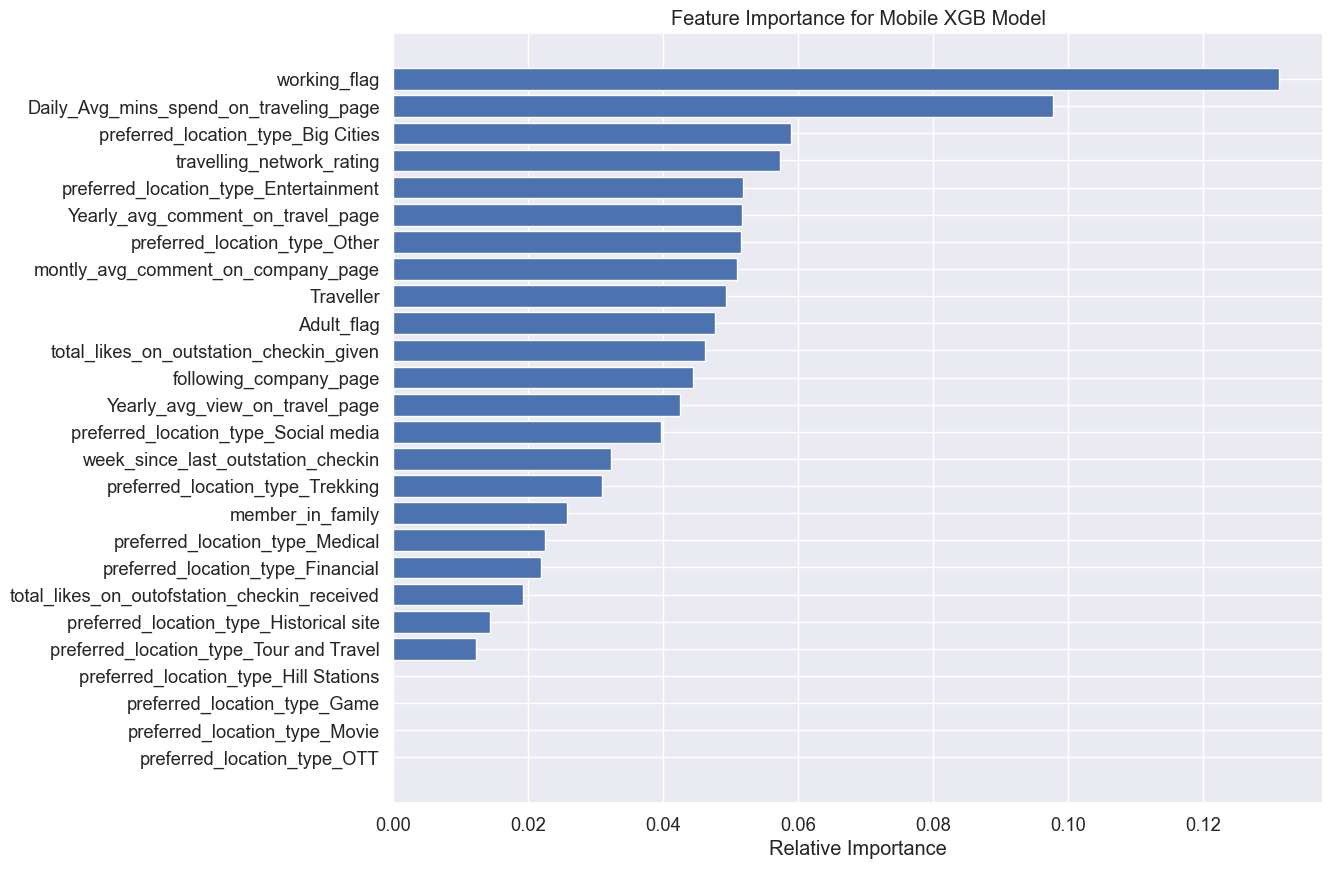

In [320]:
#Visual representation of feature importance in mobile data

importance = model_XGB_mobile.feature_importances_
indices = np.argsort(importance)
feature_names = X_mobile.columns

plt.figure(figsize=(12,10))
plt.barh(range(len(indices)),importance[indices],align='center')
plt.yticks(range(len(indices)),[feature_names[i]for i in indices])
plt.xlabel('Relative Importance')
plt.title('Feature Importance for Mobile XGB Model')

### Significance on Target variable – Laptop

#### Numerical Variables

In [324]:
feature_imp_lap.sort_values('Imp',ascending=False)[:10].index

Index(['travelling_network_rating', 'preferred_location_type_Other',
       'working_flag', 'Yearly_avg_comment_on_travel_page',
       'Yearly_avg_view_on_travel_page',
       'Daily_Avg_mins_spend_on_traveling_page',
       'preferred_location_type_Historical site',
       'total_likes_on_outstation_checkin_given', 'Adult_flag',
       'preferred_location_type_Big Cities'],
      dtype='object')

In [328]:
data_laptop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 5881 to 11758
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 1108 non-null   int32  
 1   Yearly_avg_view_on_travel_page                1108 non-null   float64
 2   total_likes_on_outstation_checkin_given       1108 non-null   float64
 3   member_in_family                              1108 non-null   int64  
 4   Yearly_avg_comment_on_travel_page             1108 non-null   float64
 5   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 6   week_since_last_outstation_checkin            1108 non-null   int64  
 7   following_company_page                        1108 non-null   int32  
 8   montly_avg_comment_on_company_page            1108 non-null   float64
 9   working_flag                                  1108 non-null

In [329]:
lap_num_cols = ['Yearly_avg_comment_on_travel_page','Yearly_avg_view_on_travel_page',
                        'Daily_Avg_mins_spend_on_traveling_page','total_likes_on_outstation_checkin_given']


lap_cat_cols = [ 'travelling_network_rating',
       'preferred_location_type_Other','working_flag',
       'preferred_location_type_Historical site','Adult_flag','preferred_location_type_Big Cities']


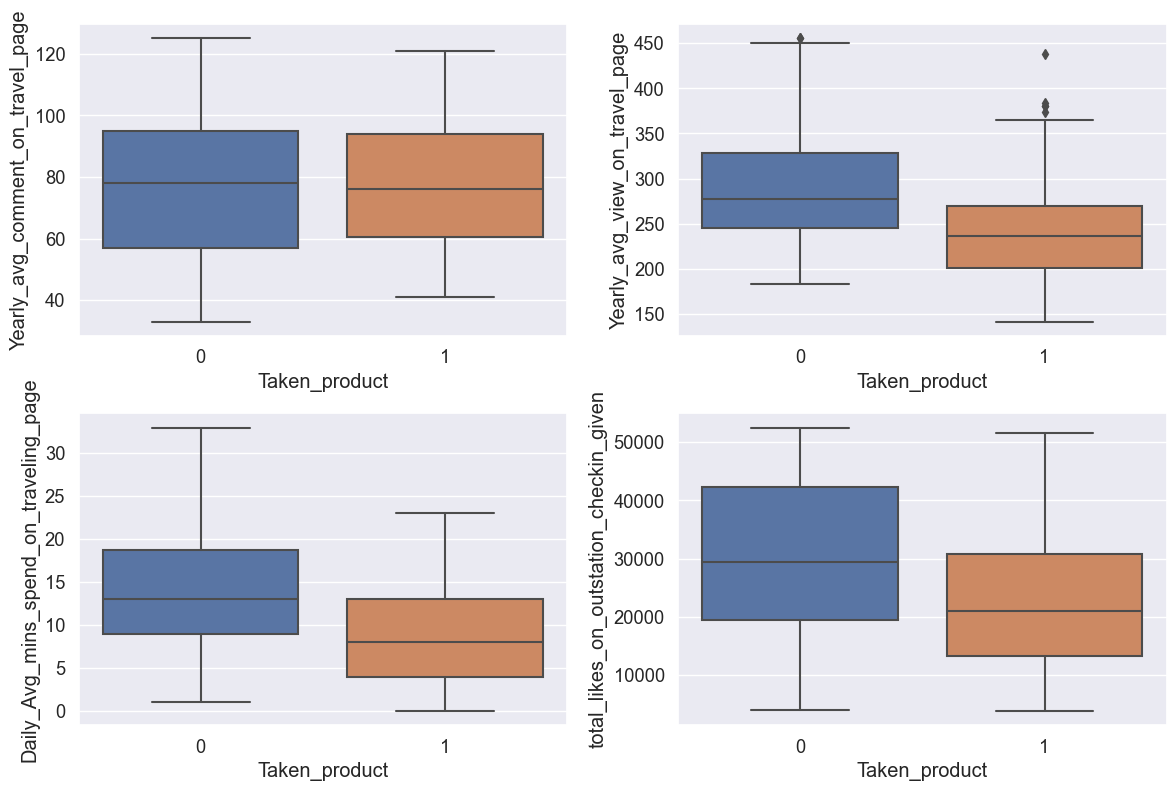

In [332]:
#Significance on Target variable -Numerical
fig,axes = plt.subplots(2,2,figsize=(12,8))
for c,a in zip(lap_num_cols,axes.flatten()):
    sns.boxplot(x='Taken_product',y=c,data=predicted_laptop,ax=a)
    plt.tight_layout()

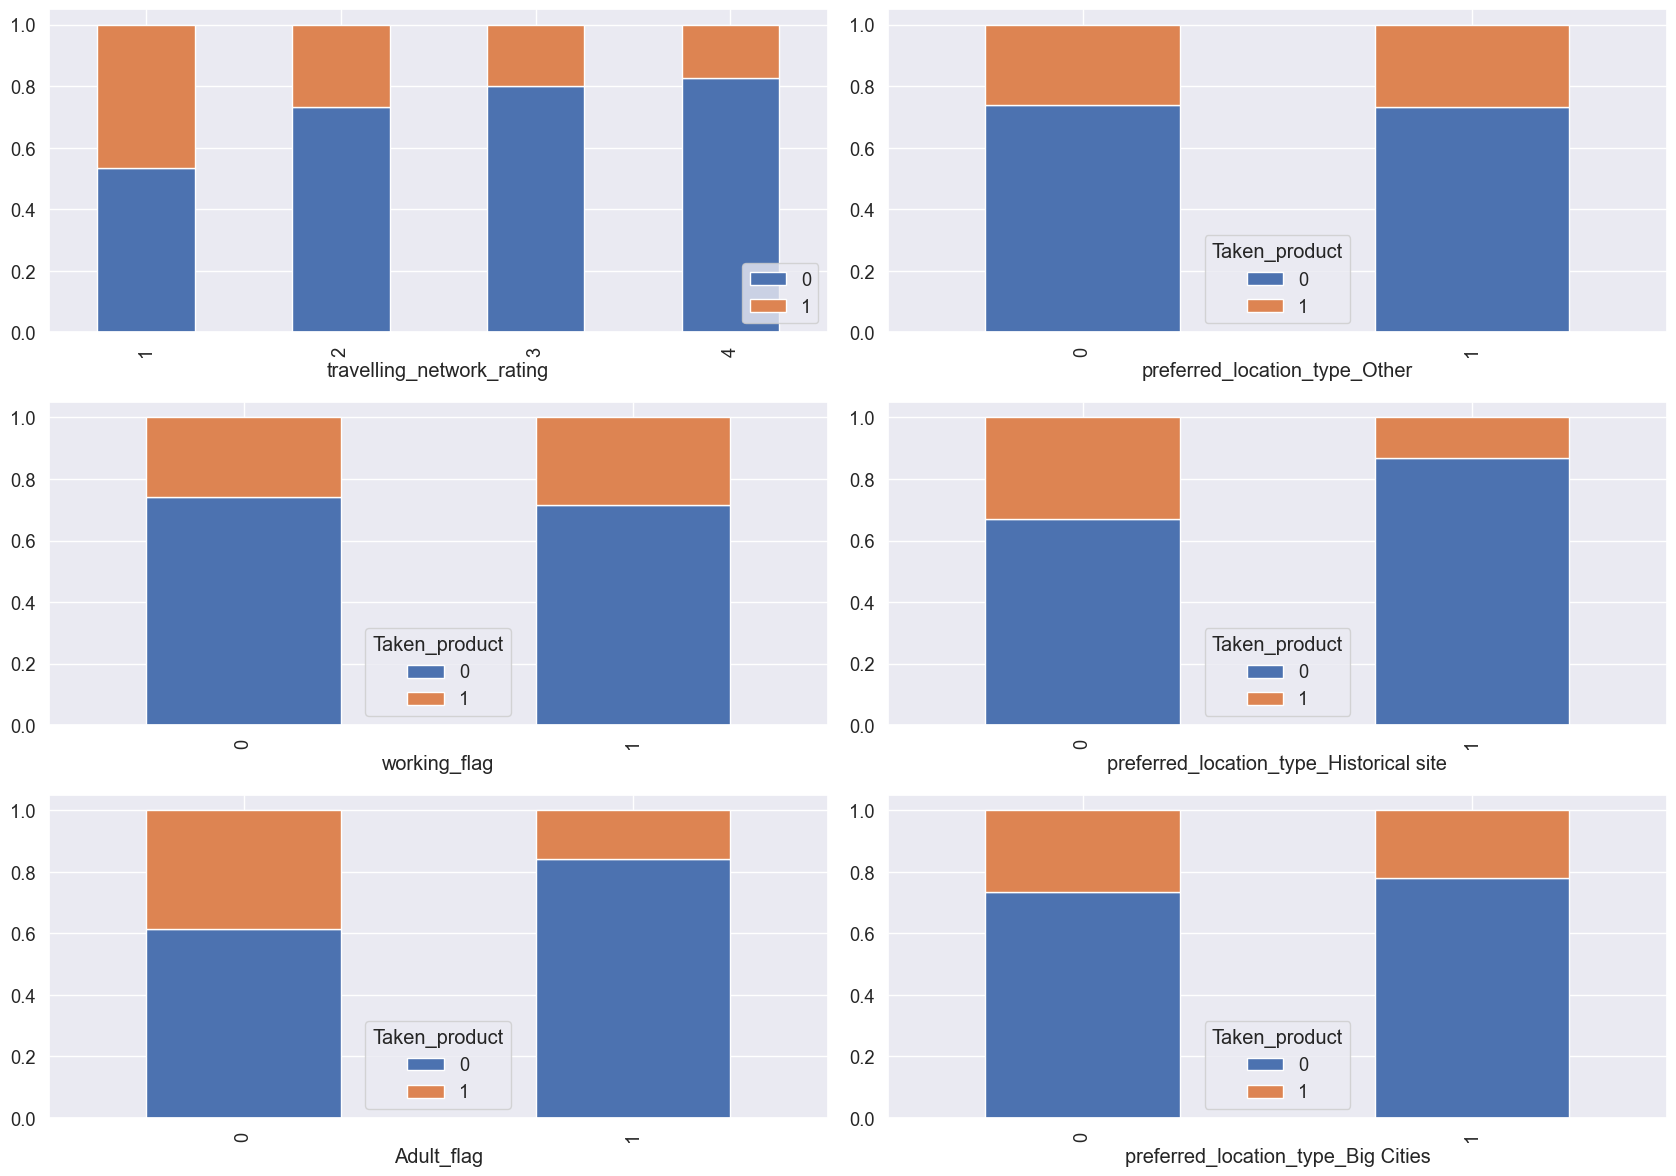

In [349]:
#Significance on Target variable -Categorical
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,figsize=(17,12))
axes = [ax1,ax2,ax3,ax4,ax5,ax6]
for c,a in zip(lap_cat_cols,axes):
    predicted_laptop.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    ax1.legend(loc='lower right')
    plt.tight_layout()

#### Insights for Laptop as Preferred Device:
- Travelling network rating has the highest percentage of converting to prefer the company’s product. Out of the four class of Travel rating user who with the least Travel network rating (rating 1) has high ~50% chance of buying the product than other ratings. but overall taking the product is more than 12%.
- User who are working has ~10% more chance of buying the company’s product.
- The chances of buying of product on the avg comments on the travel page is upto 7.5%.
- If the customer is not Adult, then the chances of purchasing the product is more.

### Significance on Target variable – Mobile

In [334]:
feature_imp_mob.sort_values('Imp',ascending=False)[:10].index

Index(['working_flag', 'Daily_Avg_mins_spend_on_traveling_page',
       'preferred_location_type_Big Cities', 'travelling_network_rating',
       'preferred_location_type_Entertainment',
       'Yearly_avg_comment_on_travel_page', 'preferred_location_type_Other',
       'montly_avg_comment_on_company_page', 'Traveller', 'Adult_flag'],
      dtype='object')

In [359]:
mob_num_cols = ['Daily_Avg_mins_spend_on_traveling_page',
               'Yearly_avg_comment_on_travel_page','montly_avg_comment_on_company_page'
               ]

mob_cat_cols = ['working_flag','preferred_location_type_Big Cities', 
                'travelling_network_rating','preferred_location_type_Entertainment',
               'preferred_location_type_Other','Traveller', 'Adult_flag'
               ]

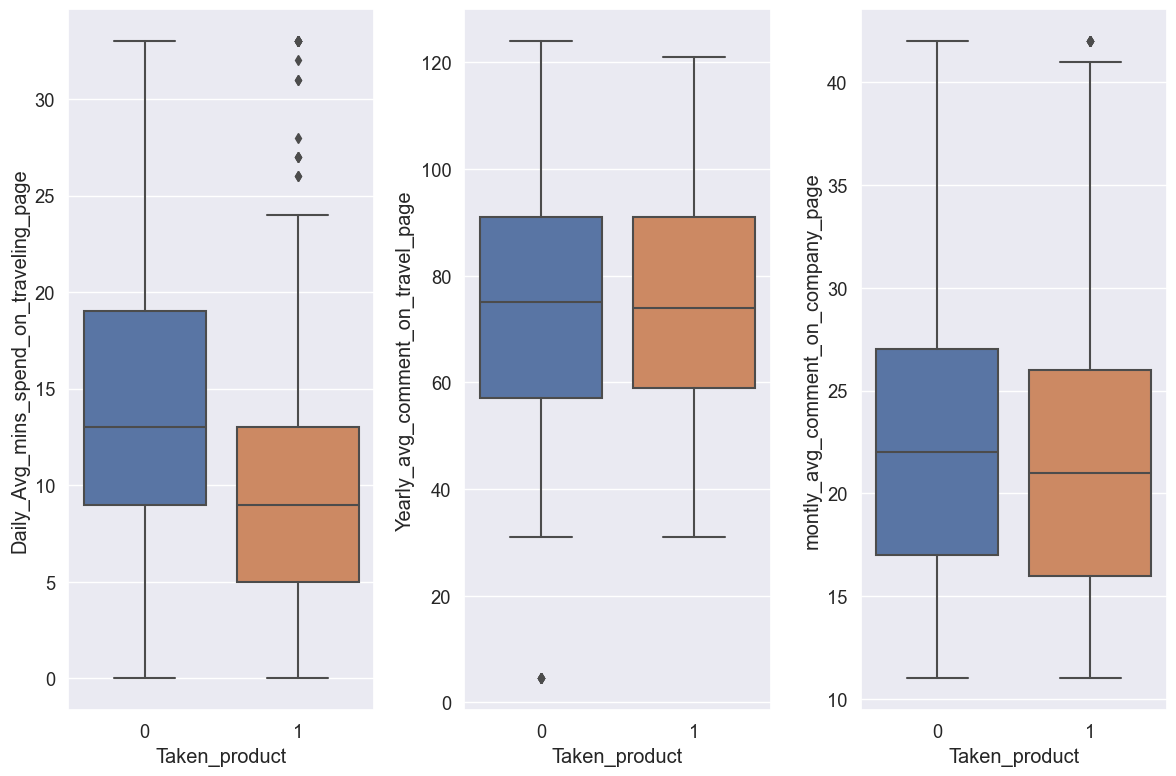

In [336]:
#Significance on Target variable -Numerical

fig,axes = plt.subplots(1,3,figsize=(12,8))
for c,a in zip(mob_num_cols,axes.flatten()):
    sns.boxplot(x='Taken_product',y=c,data=predicted_mobile,ax=a)
    plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

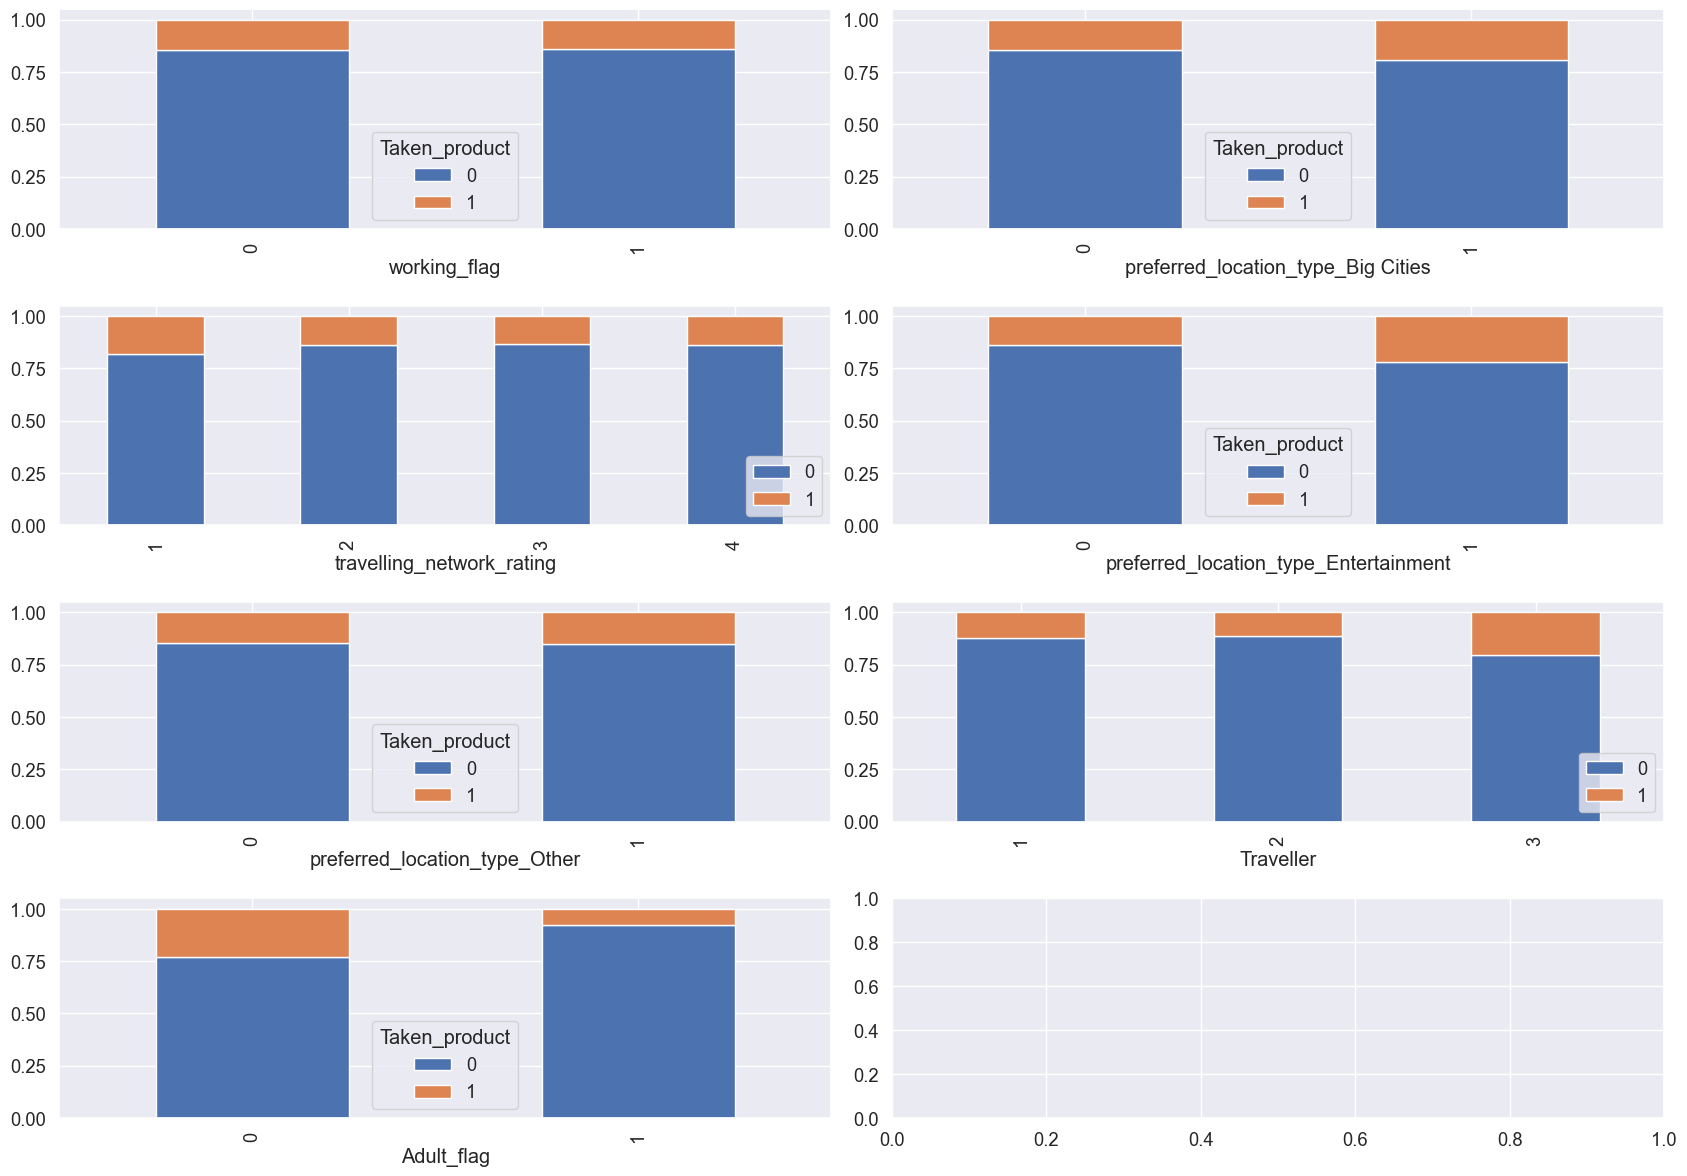

In [360]:
#Significance on Target variable -Categorical
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize=(17,12))
axes = [ax1,ax2,ax3,ax4,ax5,ax6,ax7]
for c,a in zip(mob_cat_cols,axes):
    predicted_mobile.groupby(c)['Taken_product'].value_counts(normalize=True).unstack('Taken_product').plot(ax=a,kind='bar',stacked=True)
    ax3.legend(loc='lower right')
    ax6.legend(loc='lower right')
    plt.tight_layout()

#### Insights for Mobile as Preferred Device:
- It does not matter if the customer is working or not, the percentage of taking the product lies between 15-20%. The overall percentage is 13%.
- Users who are not Adult has ~20% more chance of buying the product.
- User who has Entertainment as their preferred location has a ~20% more chance in converting.
- irrespective of Travller network rating, the chances of taking the product lies between 10-15%.
- Frequent traveller is having upto 20% chances of taking product.

In [357]:
data_laptop[feature_imp_lap[:10].index]

travelling_network_rating  preferred_location_type_Other  working_flag  \
5881                           4                              0             1   
5883                           3                              0             0   
5885                           3                              0             0   
5888                           2                              0             1   
5906                           2                              0             1   
...                          ...                            ...           ...   
11730                          2                              0             0   
11742                          4                              0             0   
11746                          4                              0             0   
11755                          3                              0             0   
11758                          4                              0             0   

       Yearly_avg_comment_on_travel_page  Yearly_avg_view_on_travel_page  \
5881                                64.0                           379.0   
5883                                59.0                           255.0   
5885                                84.0                           250.0   
5888                                48.0                           295.0   
5906                                80.0                           250.0   
...                                  ...                             ...   
11730                              115.0                           278.0   
11742                              109.0                           388.0   
11746                               98.0                           268.0   
11755                               58.0                           279.0   
11758                               83.0                           382.0   

       Daily_Avg_mins_spend_on_traveling_page  \
5881                                     10.0   
5883                                      8.0   
5885                                      8.0   
5888                                     10.0   
5906                                     10.0   
...                                       ...   
11730                                    23.0   
11742                                    14.0   
11746                                    17.0   
11755                                    23.0   
11758                                    20.0   

       preferred_location_type_Historical site  \
5881                                         0   
5883                                         0   
5885                                         0   
5888                                         0   
5906                                         0   
...                                        ...   
11730                                        0   
11742                                        0   
11746                                        0   
11755                                        1   
11758                                        1   

       total_likes_on_outstation_checkin_given  Adult_flag  \
5881                                    9776.0           1   
5883                                   48725.0           0   
5885                                   35184.0           0   
5888                                    7572.0           0   
5906                                   39379.0           0   
...                                        ...         ...   
11730                                  24127.0           1   
11742                                  30775.0           1   
11746                                  42010.0           1   
11755                                  30987.0           1   
11758                                  35851.0           0   

       preferred_location_type_Big Cities  
5881                                    0  
5883                                    0  
5885                                    0  
5888      

### User Profiling for Targeted Digital Marketing:

After finding the significant variables we shall now cluster the users based on their behaviour on these particularly importance variables, which then help us to target the user group who as better metrics in the importance features we have selected.


By doing K-means Clustering with the optimal cluster of 4 we shall group the users into 4 clusters for both Laptop and Mobile device.

In [361]:
sc = StandardScaler()
data_laptop_scaled = sc.fit_transform(data_laptop[['travelling_network_rating',
       'preferred_location_type_Other','working_flag',
       'preferred_location_type_Historical site','Adult_flag','preferred_location_type_Big Cities']])


data_mobile_scaled = sc.fit_transform(data_mobile[['working_flag','preferred_location_type_Big Cities', 
                'travelling_network_rating','preferred_location_type_Entertainment',
               'preferred_location_type_Other','Traveller', 'Adult_flag']])

#### Profiling for Laptop and Mobile Users:

In [362]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

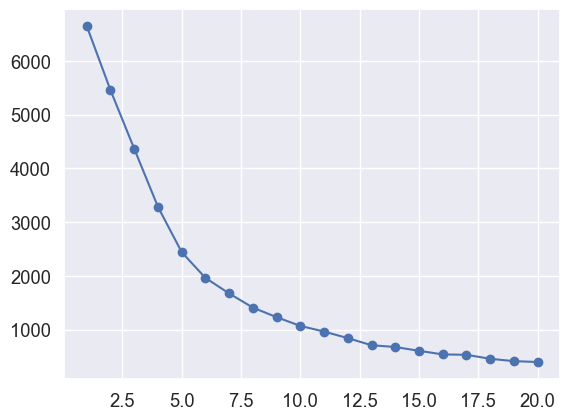

In [363]:
wss = []
for i in range (1,21):
    k_means_lap = KMeans(n_clusters=i,random_state=123)
    k_means_lap.fit(data_laptop_scaled)
    clust = k_means_lap.labels_
    wss.append(k_means_lap.inertia_)
wss_lap = pd.DataFrame(wss,columns=['WSS'])
wss_lap['Number_of_cluster'] = range(1,21)
wss_lap = wss_lap[['Number_of_cluster','WSS']]
plt.plot(wss_lap['Number_of_cluster'],wss_lap['WSS'],marker='o')

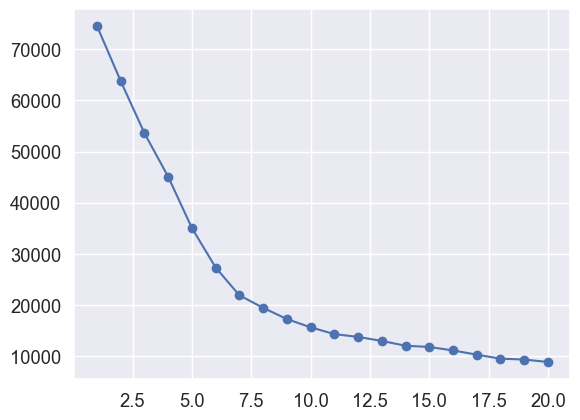

In [380]:
wss = []
shiloutte_score = []
for i in range (1,21):
    k_means_mob = KMeans(n_clusters=i,random_state=123)
    k_means_mob.fit(data_mobile_scaled)
    wss.append(k_means_mob.inertia_)
wss_mob = pd.DataFrame(wss,columns=['WSS'])
wss_mob['Number_of_cluster'] = range(1,21)
wss_mob = wss_mob[['Number_of_cluster','WSS']]
plt.plot(wss_mob['Number_of_cluster'],wss_mob['WSS'],marker='o')

In [364]:
#laptop
k_means_lap = KMeans(n_clusters=4,random_state=123)
k_means_lap.fit(data_laptop_scaled)
labels_lap = k_means_lap.fit_predict(data_laptop_scaled)

#mobile
k_means_mob = KMeans(n_clusters=4,random_state=123)
k_means_mob.fit(data_mobile_scaled)
labels_mob = k_means_mob.fit_predict(data_mobile_scaled)

In [365]:
data_laptop_copy = data_laptop.copy()
data_laptop_copy['cluster'] = labels_lap
data_laptop_copy['cluster'] = data_laptop_copy['cluster'].map({0: 'Cluster-1',
                                                              1 : 'Cluster-2',
                                                              2 : 'Cluster-3',
                                                              3 : 'Cluster-4'
                                                            })
data_laptop_copy

Taken_product  Yearly_avg_view_on_travel_page  \
5881               0                           379.0   
5883               0                           255.0   
5885               0                           250.0   
5888               0                           295.0   
5906               1                           250.0   
...              ...                             ...   
11730              0                           278.0   
11742              1                           388.0   
11746              0                           268.0   
11755              0                           279.0   
11758              0                           382.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
5881                                    9776.0                 1   
5883                                   48725.0                 4   
5885                                   35184.0                 2   
5888                                    7572.0                 3   
5906                                   39379.0                 1   
...                                        ...               ...   
11730                                  24127.0                 2   
11742                                  30775.0                 4   
11746                                  42010.0                 4   
11755                                  30987.0                 2   
11758                                  35851.0                 3   

       Yearly_avg_comment_on_travel_page  \
5881                                64.0   
5883                                59.0   
5885                                84.0   
5888                                48.0   
5906                                80.0   
...                                  ...   
11730                              115.0   
11742                              109.0   
11746                               98.0   
11755                               58.0   
11758                               83.0   

       total_likes_on_outofstation_checkin_received  \
5881                                         5142.0   
5883                                         2913.0   
5885                                         3074.0   
5888                                         9532.0   
5906                                         3926.0   
...                                             ...   
11730                                        5184.0   
11742                                        6787.0   
11746                                        5753.0   
11755                                        2616.0   
11758                                        5444.0   

       week_since_last_outstation_checkin  following_company_page  \
5881                                    1                       0   
5883                                    1                       1   
5885                                    0                       0   
5888                                    0                       0   
5906                                    1                       1   
...                                   ...                     ...   
11730                                   7                       0   
11742                                   8                       0   
11746                                   2                       1   
11755                                   4                       0   
11758                                   3                       0   

       montly_avg_comment_on_company_page  working_flag  \
5881                                 33.0             1   
5883                                 19.0             0   
5885                                 23.0             0   
5888                                 33.0             1   
5906                                 33.0             1   
...                                   ...           ...   
11730                                35.0             0   
11742                     

In [366]:
data_laptop_copy['cluster'].value_counts()

Cluster-2    600
Cluster-4    344
Cluster-1    108
Cluster-3     56
Name: cluster, dtype: int64

In [367]:
cluster_lap = data_laptop_copy[['travelling_network_rating',
       'preferred_location_type_Other','working_flag',
       'preferred_location_type_Historical site','Adult_flag','preferred_location_type_Big Cities',
                           'Taken_product','cluster']]

In [368]:
cluster_lap.groupby('cluster')['Taken_product'].value_counts(normalize=True)

cluster    Taken_product
Cluster-1  0                0.703704
           1                0.296296
Cluster-2  0                0.700000
           1                0.300000
Cluster-3  0                0.785714
           1                0.214286
Cluster-4  0                0.848837
           1                0.151163
Name: Taken_product, dtype: float64

In [369]:
pd.pivot_table(data=cluster_lap,index='cluster',sort=True)

Adult_flag  Taken_product  preferred_location_type_Big Cities  \
cluster                                                                    
Cluster-1    0.518519       0.296296                                   1   
Cluster-2    0.560000       0.300000                                   0   
Cluster-3    0.642857       0.214286                                   0   
Cluster-4    0.569767       0.151163                                   0   

           preferred_location_type_Historical site  \
cluster                                              
Cluster-1                                        0   
Cluster-2                                        0   
Cluster-3                                        0   
Cluster-4                                        1   

           preferred_location_type_Other  travelling_network_rating  \
cluster                                                               
Cluster-1                              0                   3.074074   
Cluster-2                              0                   2.786667   
Cluster-3                              1                   2.285714   
Cluster-4                              0                   2.744186   

           working_flag  
cluster                  
Cluster-1      0.037037  
Cluster-2      0.193333  
Cluster-3      0.142857  
Cluster-4      0.162791

#### Profiling for Mobile Users:

In [370]:
data_mobile_copy = data_mobile.copy()
data_mobile_copy['cluster'] = labels_mob
data_mobile_copy['cluster'] = data_mobile_copy['cluster'].map({0: 'Cluster-1',
                                                              1 : 'Cluster-2',
                                                              2 : 'Cluster-3',
                                                              3 : 'Cluster-4'})
data_mobile_copy

Taken_product  Yearly_avg_view_on_travel_page  \
0                  1                           307.0   
1                  0                           367.0   
2                  1                           277.0   
3                  0                           247.0   
4                  0                           202.0   
...              ...                             ...   
11753              0                           247.0   
11754              0                           210.0   
11756              0                           305.0   
11757              0                           214.0   
11759              0                           270.0   

       total_likes_on_outstation_checkin_given  member_in_family  \
0                                      38570.0                 2   
1                                       9765.0                 1   
2                                      48055.0                 2   
3                                      48720.0                 4   
4                                      20685.0                 1   
...                                        ...               ...   
11753                                  11418.0                 3   
11754                                  40886.0                 3   
11756                                  21510.0                 1   
11757                                   5478.0                 3   
11759                                  22025.0                 3   

       Yearly_avg_comment_on_travel_page  \
0                                   94.0   
1                                   61.0   
2                                   92.0   
3                                   56.0   
4                                   40.0   
...                                  ...   
11753                               99.0   
11754                               53.0   
11756                               55.0   
11757                              103.0   
11759                              104.0   

       total_likes_on_outofstation_checkin_received  \
0                                            5993.0   
1                                            5130.0   
2                                            2090.0   
3                                            2909.0   
4                                            3468.0   
...                                             ...   
11753                                        9983.0   
11754                                        3024.0   
11756                                       10041.0   
11757                                        6203.0   
11759                                        4470.0   

       week_since_last_outstation_checkin  following_company_page  \
0                                       8                       1   
1                                       1                       0   
2                                       6                       1   
3                                       1                       1   
4                                       9                       0   
...                                   ...                     ...   
11753                                   1                       0   
11754                                   2                       0   
11756                                   4                       0   
11757                                   3                       1   
11759                                   2                       0   

       montly_avg_comment_on_company_page  working_flag  \
0                                    11.0             0   
1                                    23.0             1   
2                                    15.0             0   
3                                    11.0             0   
4                                    12.0             0   
...                                   ...           ...   
11753                                28.0             0   
11754                     

In [371]:
data_mobile_copy['cluster'].value_counts()

Cluster-2    5414
Cluster-1    4135
Cluster-3     587
Cluster-4     516
Name: cluster, dtype: int64

In [372]:
cluster_mob = data_mobile_copy[['working_flag','preferred_location_type_Big Cities', 
                'travelling_network_rating','preferred_location_type_Entertainment',
               'preferred_location_type_Other','Traveller', 'Adult_flag',
                           'Taken_product','cluster']]

In [373]:
cluster_mob.groupby('cluster')['Taken_product'].value_counts(normalize=True)

cluster    Taken_product
Cluster-1  0                0.841112
           1                0.158888
Cluster-2  0                0.858700
           1                0.141300
Cluster-3  0                0.872232
           1                0.127768
Cluster-4  0                0.761628
           1                0.238372
Name: Taken_product, dtype: float64

In [374]:
pd.pivot_table(data=cluster_mob,index='cluster',sort=True)

Adult_flag  Taken_product  Traveller  \
cluster                                           
Cluster-1    0.729141       0.158888   2.632890   
Cluster-2    0.459180       0.141300   1.188216   
Cluster-3    0.499148       0.127768   1.853492   
Cluster-4    0.569767       0.238372   1.622093   

           preferred_location_type_Big Cities  \
cluster                                         
Cluster-1                            0.115115   
Cluster-2                            0.009605   
Cluster-3                            0.000000   
Cluster-4                            0.000000   

           preferred_location_type_Entertainment  \
cluster                                            
Cluster-1                                      0   
Cluster-2                                      0   
Cluster-3                                      0   
Cluster-4                                      1   

           preferred_location_type_Other  travelling_network_rating  \
cluster                                                               
Cluster-1                              0                   2.701330   
Cluster-2                              0                   2.716291   
Cluster-3                              1                   2.659284   
Cluster-4                              0                   2.680233   

           working_flag  
cluster                  
Cluster-1      0.153567  
Cluster-2      0.151274  
Cluster-3      0.175468  
Cluster-4      0.129845

### Business Insights